# Data Analysis of energy consumption for a single household  
Data can be downloaded from here: http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

In this dataset there is a total of 9 features and 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months). The attributes for the features are as follows:

1. Date: Date in format dd/mm/yyyy
2. Time: time in format hh:mm:ss
3. Global_active_power: household global minute-averaged active power (in kilowatt)
4. Global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. Voltage: minute-averaged voltage (in volt)
6. Global_intensity: household global minute-averaged current intensity (in ampere)
7. Sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. Sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. Sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

some additional info:

1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.
## Exploratory data analysis
In this part we will perform EDA which includes:
1. Data cleaning and preprocessing.
2. Data visualization and descriptive statistics
3. Feature engineering, Correlation among features

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# we notice in the txt file that missing values are registered with '?' 
df_energy_comp = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?')


In [3]:
df_energy_comp.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [4]:
df_energy_comp.head()

Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0

In [5]:
df_energy_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [6]:
df_energy_comp.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [7]:
# this is too slow 
df_energy_comp['DateTime'] = pd.to_datetime(df_energy_comp['Date']+ ' ' + df_energy_comp['Time'], dayfirst=False)

In [8]:
df_energy_comp.head()


Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2              23.0             0.0             2.0            17.0   
3              23.0             0.0             1.0            17.0   
4              15.8             0.0             1.0            17.0   

             DateTime  
0 2006-12-16 17:24:00  
1 2006-12-16 17:25:00  
2 2006-12-16 17:26:00  
3 2006-12-16 17:27:00  
4 2006-12-16 17:28:00

In [9]:
df_energy_comp.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
DateTime                 datetime64[ns]
dtype: object

In [10]:
df_energy_comp = df_energy_comp.drop(['Date', 'Time'], axis=1)
df_energy_comp = df_energy_comp.set_index('DateTime')
df_energy_comp

Global_active_power  Global_reactive_power  Voltage  \
DateTime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2010-11-26 20:58:00                0.946                  0.000   240.43   
2010-11-26 20:59:00                0.944                  0.000   240.00   
2010-11-26 21:00:00                0.938                  0.000   239.82   
2010-11-26 21:01:00                0.934                  0.000   239.70   
2010-11-26 21:02:00                0.932                  0.000   239.55   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
DateTime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   
...                               ...             ...             ...   
2010-11-26 20:58:00               4.0             0.0             0.0   
2010-11-26 20:59:00               4.0             0.0             0.0   
2010-11-26 21:00:00               3.8             0.0             0.0   
2010-11-26 21:01:00               3.8             0.0             0.0   
2010-11-26 21:02:00               3.8             0.0             0.0   

                     Sub_metering_3  
DateTime                             
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0  
...                             ...  
2010-11-26 20:58:00             0.0  
2010-11-26 20:59:00             0.0  
2010-11-26 21:00:00             0.0  
2010-11-26 21:01:00             0.0  
2010-11-26 21:02:00             0.0  

[2075259 rows x 7 columns]

In [11]:
df_energy_comp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


Well ... This datetime manipulation could had been done much easier and faster :
1. Loading the data
2. handling missing data that was registered with '?' in the raw data, now becomes NaN values 
3. merging the date and time columns and indexing data by new date_time column (time-series).

In [4]:
energy_comp_df = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?', parse_dates=[['Date', 'Time']],
                              infer_datetime_format=True, index_col=0)

In [13]:
energy_comp_df

Global_active_power  Global_reactive_power  Voltage  \
Date_Time                                                                  
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2010-11-26 20:58:00                0.946                  0.000   240.43   
2010-11-26 20:59:00                0.944                  0.000   240.00   
2010-11-26 21:00:00                0.938                  0.000   239.82   
2010-11-26 21:01:00                0.934                  0.000   239.70   
2010-11-26 21:02:00                0.932                  0.000   239.55   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Date_Time                                                               
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   
...                               ...             ...             ...   
2010-11-26 20:58:00               4.0             0.0             0.0   
2010-11-26 20:59:00               4.0             0.0             0.0   
2010-11-26 21:00:00               3.8             0.0             0.0   
2010-11-26 21:01:00               3.8             0.0             0.0   
2010-11-26 21:02:00               3.8             0.0             0.0   

                     Sub_metering_3  
Date_Time                            
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0  
...                             ...  
2010-11-26 20:58:00             0.0  
2010-11-26 20:59:00             0.0  
2010-11-26 21:00:00             0.0  
2010-11-26 21:01:00             0.0  
2010-11-26 21:02:00             0.0  

[2075259 rows x 7 columns]

In [14]:
energy_comp_df.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [15]:
energy_comp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [16]:
energy_comp_df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [17]:
energy_comp_df[190495: 190505]

Global_active_power  Global_reactive_power  Voltage  \
Date_Time                                                                  
2007-04-28 00:19:00                0.490                  0.202   235.02   
2007-04-28 00:20:00                0.492                  0.208   236.24   
2007-04-28 00:21:00                  NaN                    NaN      NaN   
2007-04-28 00:22:00                  NaN                    NaN      NaN   
2007-04-28 00:23:00                  NaN                    NaN      NaN   
2007-04-28 00:24:00                  NaN                    NaN      NaN   
2007-04-28 00:25:00                  NaN                    NaN      NaN   
2007-04-28 00:26:00                  NaN                    NaN      NaN   
2007-04-28 00:27:00                  NaN                    NaN      NaN   
2007-04-28 00:28:00                  NaN                    NaN      NaN   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Date_Time                                                               
2007-04-28 00:19:00               2.2             0.0             0.0   
2007-04-28 00:20:00               2.2             0.0             0.0   
2007-04-28 00:21:00               NaN             NaN             NaN   
2007-04-28 00:22:00               NaN             NaN             NaN   
2007-04-28 00:23:00               NaN             NaN             NaN   
2007-04-28 00:24:00               NaN             NaN             NaN   
2007-04-28 00:25:00               NaN             NaN             NaN   
2007-04-28 00:26:00               NaN             NaN             NaN   
2007-04-28 00:27:00               NaN             NaN             NaN   
2007-04-28 00:28:00               NaN             NaN             NaN   

                     Sub_metering_3  
Date_Time                            
2007-04-28 00:19:00             0.0  
2007-04-28 00:20:00             0.0  
2007-04-28 00:21:00             NaN  
2007-04-28 00:22:00             NaN  
2007-04-28 00:23:00             NaN  
2007-04-28 00:24:00             NaN  
2007-04-28 00:25:00             NaN  
2007-04-28 00:26:00             NaN  
2007-04-28 00:27:00             NaN  
2007-04-28 00:28:00             NaN

### Handling missing data
There are 3 types of missing data:  Missing completely at random (MCAR), Missing at random (MAR), and Missing not at random (MNAR).
When dealing with missing data there are in general 2 ways to approach it
1. To delete the rows or columns containing missing data.
2. To impute the missing data

We will first check whether it is appropriate to delete the missing data or not, and then we will briefly discuss some methods to impute the missing data.

In [18]:
energy_comp_df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [19]:
print('total amount if missing data in percent:', 25979/2075259 * 100)

total amount if missing data in percent: 1.2518437457686005


I want to check if the missing values only occur as whole rows or not

In [20]:
# .isnull().any(axis=1) returns a boolean array indicating whether each row contains at least one missing value 
# (True if missing, False otherwise)
energy_comp_df.isnull().any(axis=1).sum()

25979

As we observe, there are a total of 25979 rows with missing values and each feature has exactly 25979 missing values.
So there is not a bias towards a particular feature. 

Since all features have the same amount of missing values and they occur on the same rows, it suggests that the missing data is systematic and not missing at random. In other words, there may be a reason why those rows have missing values, such as a technical issue during data collection, and it is not a random occurrence. Furthermore, since all the features have missing values at exactly the same rows, then checking the correlation between features will not provide any additional information regarding the nature of the missing data or its potential impact on bias.

Under other circumstances we would probably check if the missing data affects important variables, and calculate the correlation between the missing values and other variables, to see if the missing values are highly correlated with important variables or not, which may suggest that the missing data is not missing completely at random and could have an impact on the analysis. 

NOTE: lack of correlation does not necessarily mean that the missing values are completely random, but rather that there is no obvious systematic relationship between the variables with missing values and other variables in the dataset.

In [21]:
import missingno as msno

<Axes: >

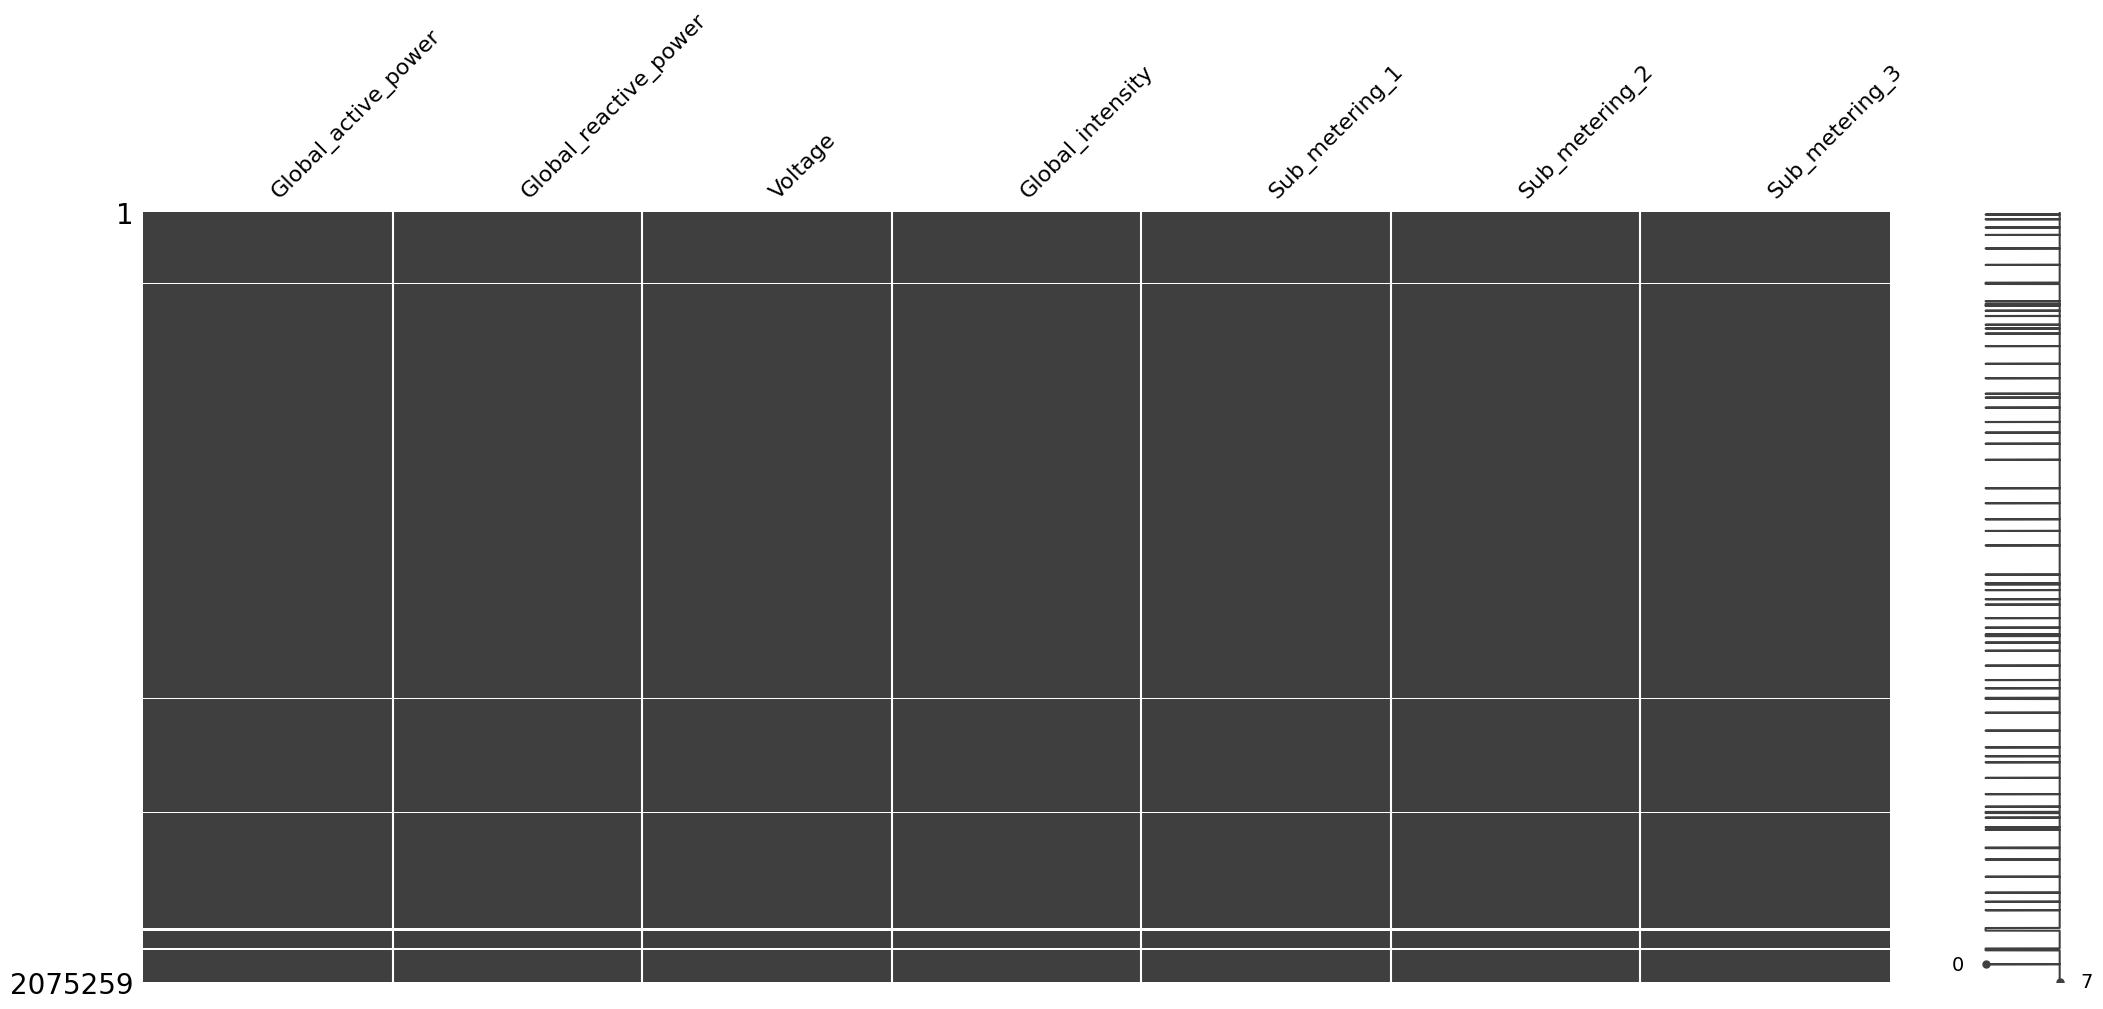

In [22]:
msno.matrix(energy_comp_df)

The bar plot on the left side shows the distribution of missing values across the columns of the DataFrame, where a white cell indicates that the data is missing, while a black cell indicates the data is present. We see that the missing values occur at the same rows for all features, but is only shows 5 instances of missing values, which is incorrect.

The right side is a sparkline plot, it shows the completeness of each row of the data, where the length of the sparkline represents the number of non-missing values in that row. So we see that there are alot more lines/steps here which depicts the missing data more accurately. It is hard to tell if there is any systematic reasons for the missing values when we look at the pattern of the missing data. 

If all the features have missing values at exactly the same rows,  then it is reasonable to conclude that the missing data is not MCAR and thus, it is not appropriate to delete the missing data without further analysis. It is important to consider why there is missing data and whether there are potential biases in the analysis that may arise from it. One approach in dealing with missing data in this scenario is to use imputation techniques, to name a few we have:
1. Forward filling or backward filling: In this method, the missing values are filled with the previous (forward filling) or next (backward filling) available value in the time series.
2. Mean/median imputation: Can be used for numerical data with MCAR or MAR missing data, but can be biased if data is not MCAR.
3. Interpolation: using the values of the surrounding data points to estimate the value of the missing data point. This method is used when the missing data point lies within the range of the available data points. There are several methods for interpolation, such as linear interpolation, spline interpolation, time interpolation,and polynomial interpolation.
4. Extrapolation: using the values of the available data points to estimate the value of the missing data point, even if it lies outside the range of the available data points. This method is used when the missing data point is outside the range of the available data points. However, it should be used with caution as it assumes that the data follows a certain pattern, and this assumption may not always hold true.
5. Model-based imputation: using statistical models such as ARIMA or Prophet to estimate the missing values based on the available data.
6. Statistical techniques: different types of moving averages can be used to impute missing values by aggregating the previous non-missing values. Other statistical techniques are Multiple imputation, MLE, EM-algorithm, mm.
7. Time based imputation: we impute the missing values using data from the same time period in previous years or months. For example, if we have missing values in april 2008, we can impute those missing values using the values from april 2007 or marts 2008.

Missing data can occur for different reasons, such as measurement errors, data entry errors, or missing by design. For our case, it is unclear why there are missing values, so it would be best to investigate furter, before deciding on a imputation method. If it is not possible to identify the reason for missing data or if it is suspected that the missing values are not missing at random, it might be better to remove the rows with missing values. 

To get a better view of where the missing data occurs in the whole dataset, we plot a barplot of the data for 'Global_active_power' and plot the missing data ontop of it.

In [23]:
energy_comp_df.index[energy_comp_df.isnull().any(axis=1)]

DatetimeIndex(['2006-12-21 11:23:00', '2006-12-21 11:24:00',
               '2006-12-30 10:08:00', '2006-12-30 10:09:00',
               '2007-01-14 18:36:00', '2007-01-28 17:13:00',
               '2007-02-22 22:58:00', '2007-02-22 22:59:00',
               '2007-03-25 17:52:00', '2007-04-28 00:21:00',
               ...
               '2010-09-28 19:04:00', '2010-09-28 19:05:00',
               '2010-09-28 19:06:00', '2010-09-28 19:07:00',
               '2010-09-28 19:08:00', '2010-09-28 19:09:00',
               '2010-09-28 19:10:00', '2010-09-28 19:11:00',
               '2010-09-28 19:12:00', '2010-10-24 15:35:00'],
              dtype='datetime64[ns]', name='Date_Time', length=25979, freq=None)

In [24]:
energy_comp_df[energy_comp_df.isna().any(axis=1)]['Global_active_power']

Date_Time
2006-12-21 11:23:00   NaN
2006-12-21 11:24:00   NaN
2006-12-30 10:08:00   NaN
2006-12-30 10:09:00   NaN
2007-01-14 18:36:00   NaN
                       ..
2010-09-28 19:09:00   NaN
2010-09-28 19:10:00   NaN
2010-09-28 19:11:00   NaN
2010-09-28 19:12:00   NaN
2010-10-24 15:35:00   NaN
Name: Global_active_power, Length: 25979, dtype: float64

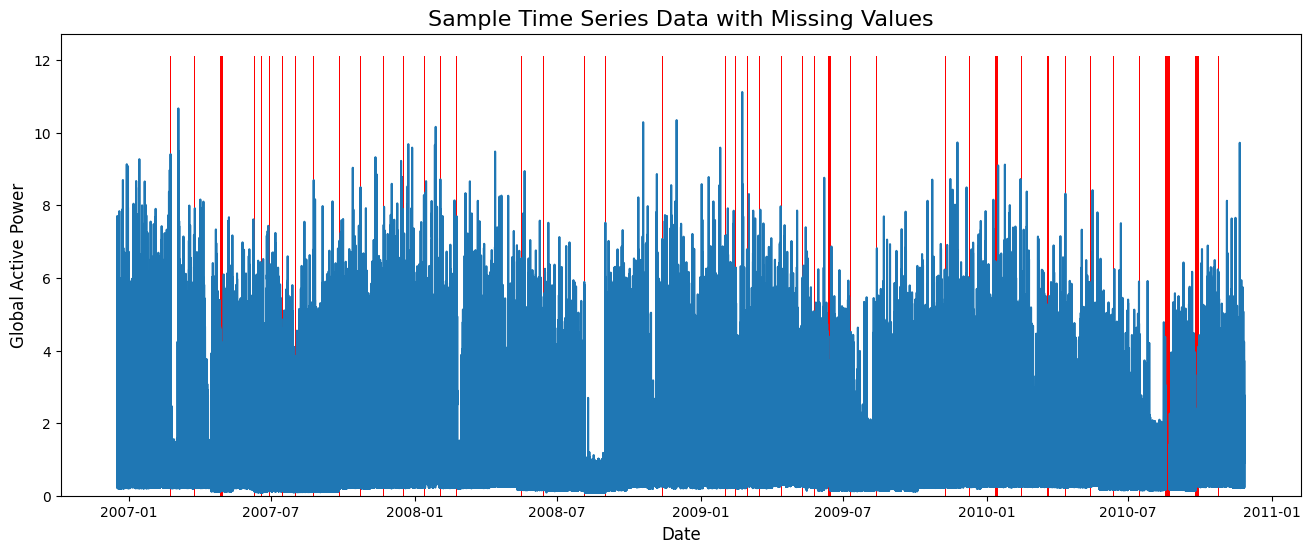

In [25]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(energy_comp_df.index, energy_comp_df['Global_active_power'])

# Plot the missing values on top of the time series plot
max_val_GAP = energy_comp_df['Global_active_power'].max(axis=0)
missing_dates = energy_comp_df[energy_comp_df.isna().any(axis=1)]['Global_active_power'].index
missing_values = energy_comp_df[energy_comp_df.isna().any(axis=1)]['Global_active_power'].fillna(max_val_GAP+1)
ax.bar(missing_dates, missing_values, color='red')

# Set plot title and axis labels
ax.set_title('Sample Time Series Data with Missing Values', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Global Active Power', fontsize=12)

plt.show()

From the plot I cannot see any obvious systematic structure for the missing data. To further check for missing data patterns we can calculate  the percentage of missing values for each month, each season of each year, and each year to see if there are any patterns or trends in the missing data. 


In [26]:
energy_comp_df.index.year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='Date_Time', length=2075259)

In [27]:
years = energy_comp_df.groupby(energy_comp_df.index.year)
years.count()

Global_active_power  Global_reactive_power  Voltage  \
Date_Time                                                        
2006                     21992                  21992    21992   
2007                    521669                 521669   521669   
2008                    526905                 526905   526905   
2009                    521320                 521320   521320   
2010                    457394                 457394   457394   

           Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
Date_Time                                                                    
2006                  21992           21992           21992           21992  
2007                 521669          521669          521669          521669  
2008                 526905          526905          526905          526905  
2009                 521320          521320          521320          521320  
2010                 457394          457394          457394          457394

In [28]:
for year, year_df in years:
    missing_val = year_df.isnull().sum().sum()
    total_val = year_df.shape[0] * year_df.shape[1]
    pct_missing = (missing_val / total_val) * 100
    print(f"Year {year}: {pct_missing:.2f}% missing values")

Year 2006: 0.02% missing values
Year 2007: 0.75% missing values
Year 2008: 0.03% missing values
Year 2009: 0.81% missing values
Year 2010: 3.71% missing values


Found out that there is a 'resample' function

In [29]:
yearly_missing = energy_comp_df.resample('Y').apply(lambda x: x.isna().sum() / len(x))*100
yearly_missing

Global_active_power  Global_reactive_power   Voltage  \
Date_Time                                                          
2006-12-31             0.018185               0.018185  0.018185   
2007-12-31             0.747907               0.747907  0.747907   
2008-12-31             0.025615               0.025615  0.025615   
2009-12-31             0.814307               0.814307  0.814307   
2010-12-31             3.711189               3.711189  3.711189   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
Date_Time                                                                     
2006-12-31          0.018185        0.018185        0.018185        0.018185  
2007-12-31          0.747907        0.747907        0.747907        0.747907  
2008-12-31          0.025615        0.025615        0.025615        0.025615  
2009-12-31          0.814307        0.814307        0.814307        0.814307  
2010-12-31          3.711189        3.711189        3.711189        3.711189

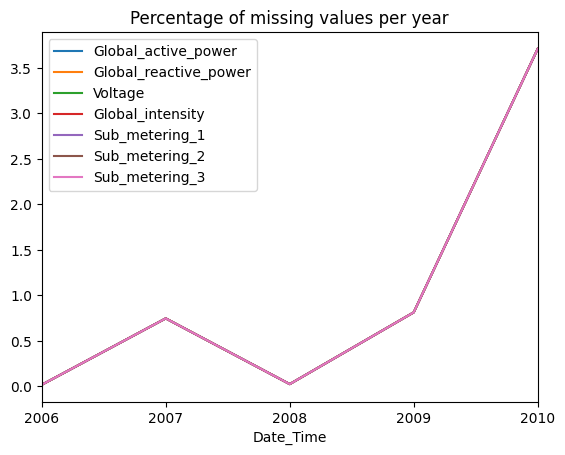

In [30]:
yearly_missing.plot()
plt.title('Percentage of missing values per year')
plt.show()

In [31]:
Quarter_missing = energy_comp_df['Global_active_power'].resample('Q').apply(lambda x: x.isna().sum() / len(x)) *100

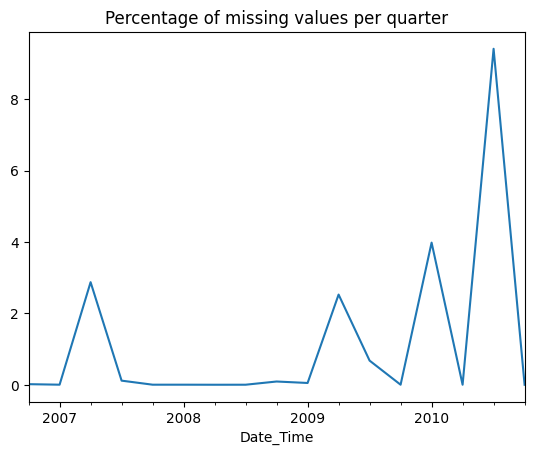

In [32]:
Quarter_missing.plot()
plt.title('Percentage of missing values per quarter')
plt.show()

In [33]:
Monthly_missing = energy_comp_df['Global_active_power'].resample('M').apply(lambda x: x.isna().sum() / len(x)) *100

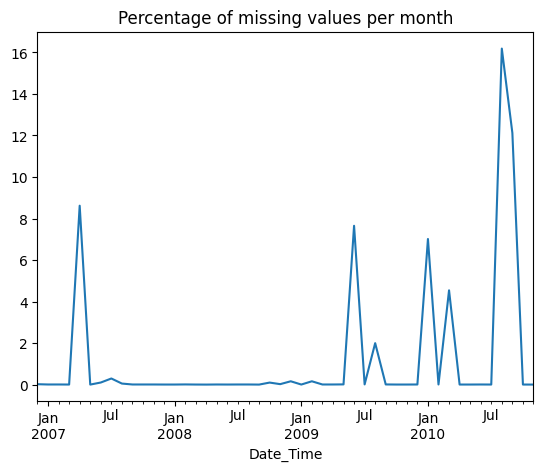

In [34]:
Monthly_missing.plot()
plt.title('Percentage of missing values per month')
plt.show()

In [35]:
dayly_missing = energy_comp_df['Global_active_power'].resample('D').apply(lambda x: x.isna().sum() / len(x)) *100

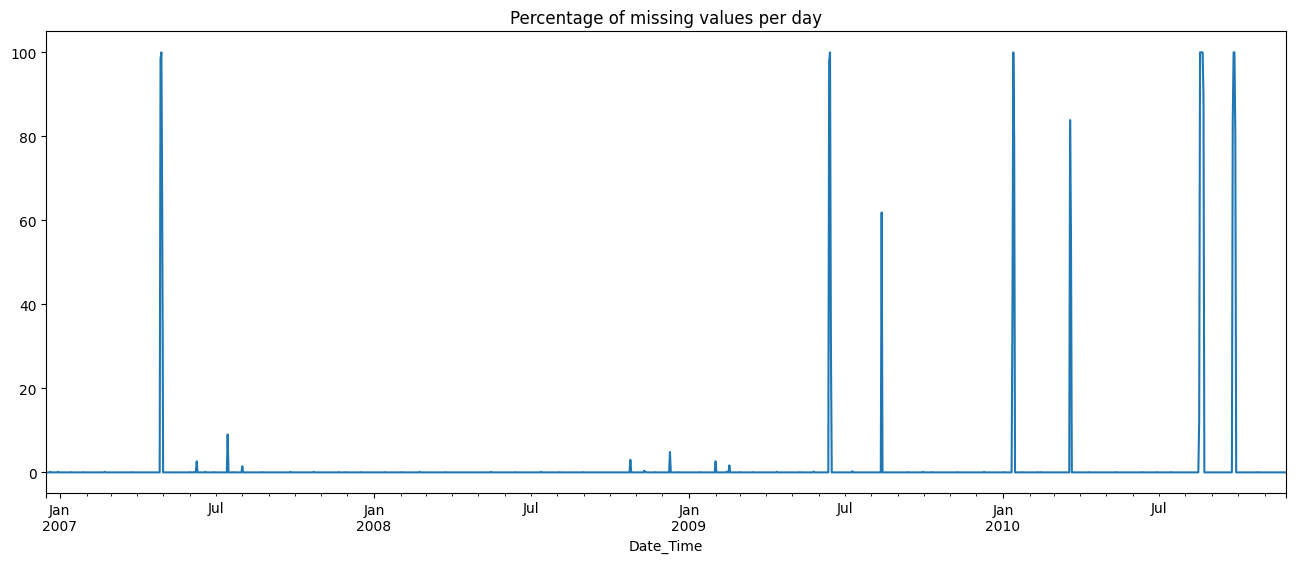

In [36]:
dayly_missing.plot(figsize=(16, 6))
plt.title('Percentage of missing values per day')
plt.show()

This is further evidence for there is no obvious systematic structure. So it is reasonable to assume that the data are missing is systematically related to the observed but not the unobserved data. In other words, the fact that the missing data occurs as full rows for all features is systematic, but the affects is not caused by underlying factors/elements which isn't recorded. Thus making the assumption that the data is MAR reasonable.
Now, we need to handle MAR data. From what we discussed earlier, 
1. forward and backward filling are sensitive to the order of the missing data, making it not suitable for this data set
2. mean/median filling, very simple and computationally cheap, works well when the data has a relative stable distribution and the missing data are random, otherwise it could introduce bias. It works best with MCAR data, but also works with MAR data. We can, for example, check bias by compairing the distribution of the original and imputed data.
3. Interpolation: Over all it is a more precise method of filling in the missing data. Computation wise, linear and cubic is cheaper than spline and time-series
    1. Linear: computing the slope between two points and then using that slope to fill in missing values. It is simple and fast and preserves the overall trend, but if data is higly irregular it can result in unrealistic values, and it assumes linear relationship between the selected data points.
    2. cubic: fitting a third-degree polynomial between adjacent data points, then finds the coefficients of the cubic polynomial, by solving a system of equations using the four adjacent data points. More accurate and smooth than linear interpolation, and better at preversing overall trend. But false fluctuations/swings can occur if data is highly irregular. 
    3. Spline: fitting a series of cubic polynomials between adjacent data points, such that the resulting function is continuous and smooth. Then is chooses the function that minimizes the curvature, given that it passes through the data points. It is very smooth and accurate, and preserves the overall trend very well. But computationally expensive for large dataset.
    4. Time series: fitting a model to the time series data and using the model to estimate the missing values. Common models used for time-series interpolation include autoregressive models and moving average models. Can be more accurate since it takes into account the seasonality and trends. But it is usually more complex and more computationally expensive compared to other methods. **The package tsintermittent does not work anymore, it only works for R it seems.**
4. Extrapolation: it involves making predictions outside of our observed max-min values, so not a recommended method for our data.
5. Statistical techniques: regression imputation, MLE, EM-algorithm, and multiple imputation are computationally expensive. Unless the data is MNAR or smaller, these methods are not that suited for this dataset.
6. Time-based imputation: Assumes MAR data and that the pattern observed in previous months or years will be similar in the present. It is sensitive to changes or trends that would make the data from previous years less relevant. This is suited for data where the patterns and trends repeat over time. For example, if our data repeats the energy comsumption patterns every year. In our case, we can see that there are smaller periods where the energy consumption is very low, this can be explained by that no one is home most of the day, and this happens randomly across the data, combined with the fact that the amount of missing data is low, and that over the 4 years there is only one large period where the energy consumption is extremely low, which makes me believe that this method is not best practice.
Next step would be to check if mean imputation introduces bias and compare it with linear and cubic interpolation.

In [37]:
# Replace missing values with mean
mean_df = energy_comp_df.fillna(energy_comp_df.mean())

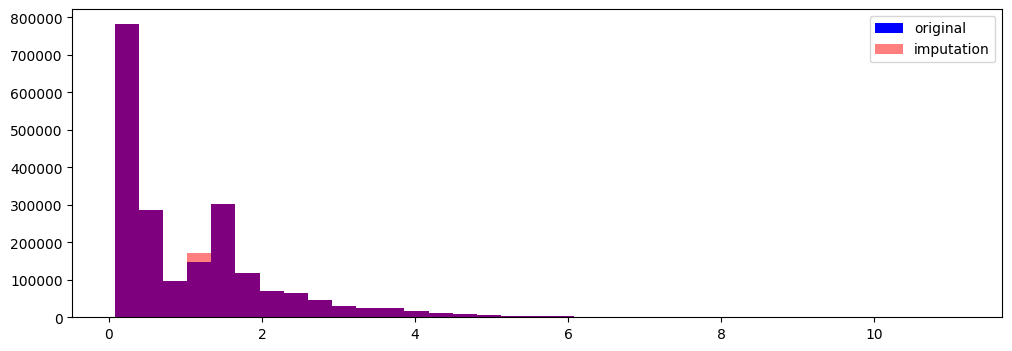

In [38]:
fig, axs = plt.subplots(figsize = (12,4))
energy_comp_df['Global_active_power'].hist(ax = axs, label = 'original', color='blue', alpha = 1, bins = 35, grid=False)
mean_df['Global_active_power'].hist(ax=axs, label= 'imputation', color = 'red', alpha = 0.5, bins=35, grid = False)
axs.legend(loc='upper right')
plt.show()

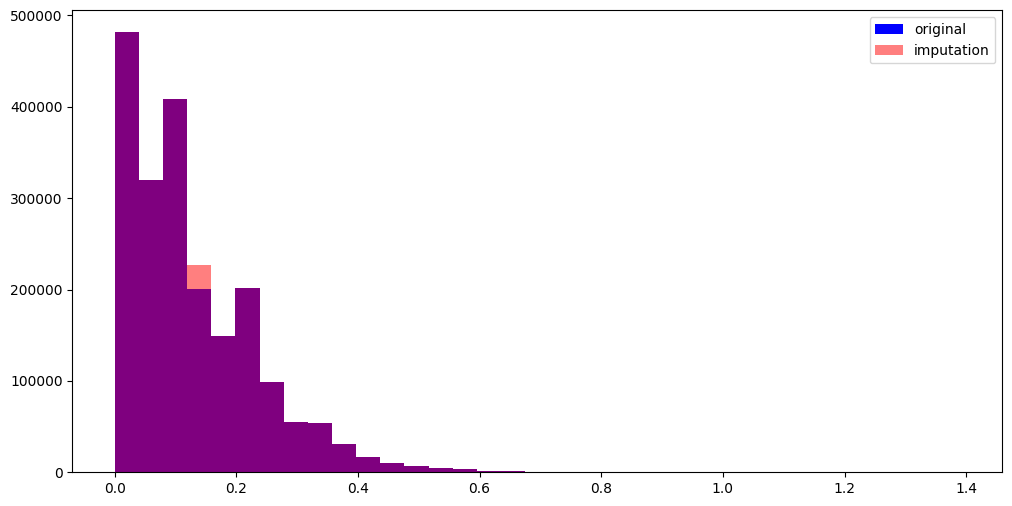

In [39]:
fig, axs = plt.subplots(figsize = (12,6))
energy_comp_df['Global_reactive_power'].hist(ax = axs, label = 'original', color='blue', alpha = 1, bins = 35, grid=False)
mean_df['Global_reactive_power'].hist(ax=axs, label= 'imputation', color = 'red', alpha = 0.5, bins=35, grid = False)
axs.legend(loc='upper right')
plt.show()

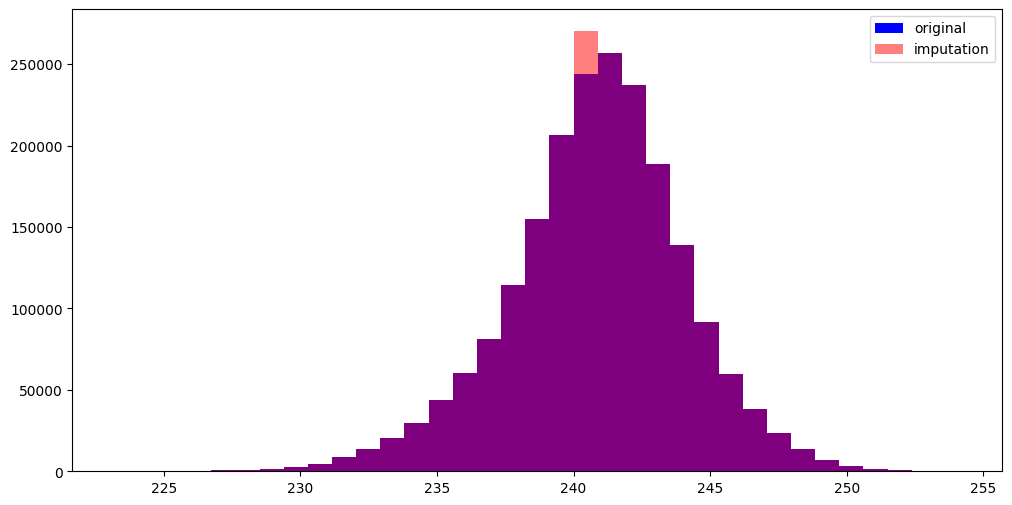

In [40]:
fig, axs = plt.subplots(figsize = (12,6))
energy_comp_df['Voltage'].hist(ax = axs, label = 'original', color='blue', alpha = 1, bins = 35, grid=False)
mean_df['Voltage'].hist(ax=axs, label= 'imputation', color = 'red', alpha = 0.5, bins=35, grid = False)
axs.legend(loc='upper right')
plt.show()

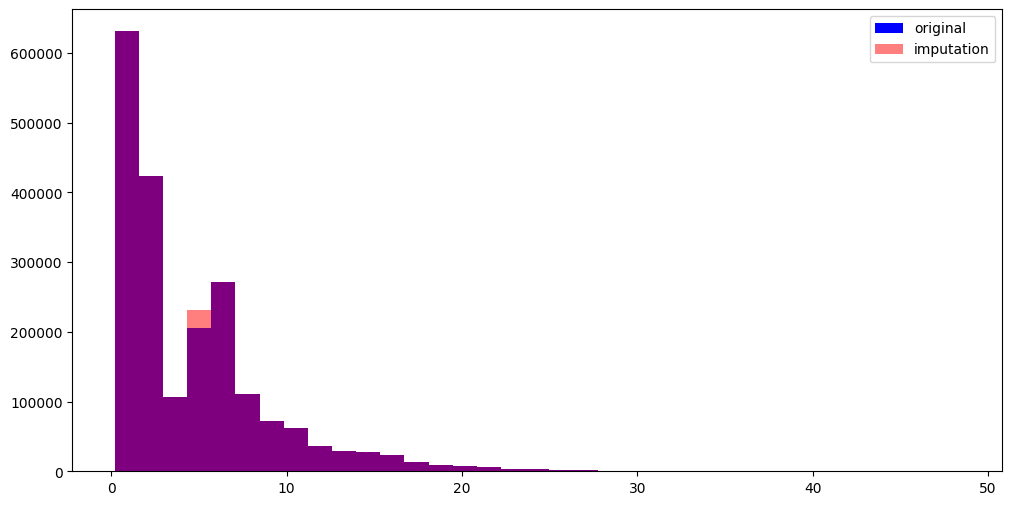

In [41]:
fig, axs = plt.subplots(figsize = (12,6))
energy_comp_df['Global_intensity'].hist(ax = axs, label = 'original', color='blue', alpha = 1, bins = 35, grid=False)
mean_df['Global_intensity'].hist(ax=axs, label= 'imputation', color = 'red', alpha = 0.5, bins=35, grid = False)
axs.legend(loc='upper right')
plt.show()

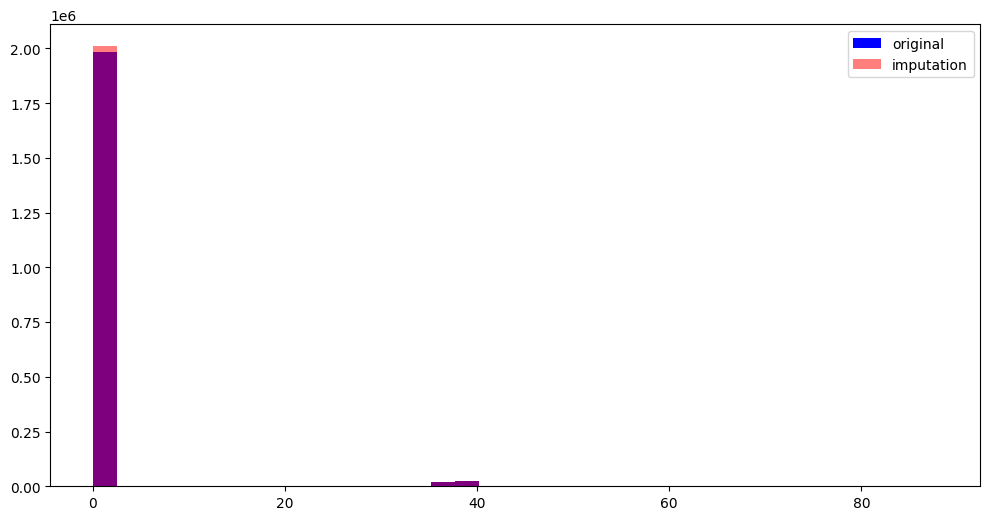

In [42]:
fig, axs = plt.subplots(figsize = (12,6))
energy_comp_df['Sub_metering_1'].hist(ax = axs, label = 'original', color='blue', alpha = 1, bins = 35, grid=False)
mean_df['Sub_metering_1'].hist(ax=axs, label= 'imputation', color = 'red', alpha = 0.5, bins=35, grid = False)
axs.legend(loc='upper right')
plt.show()

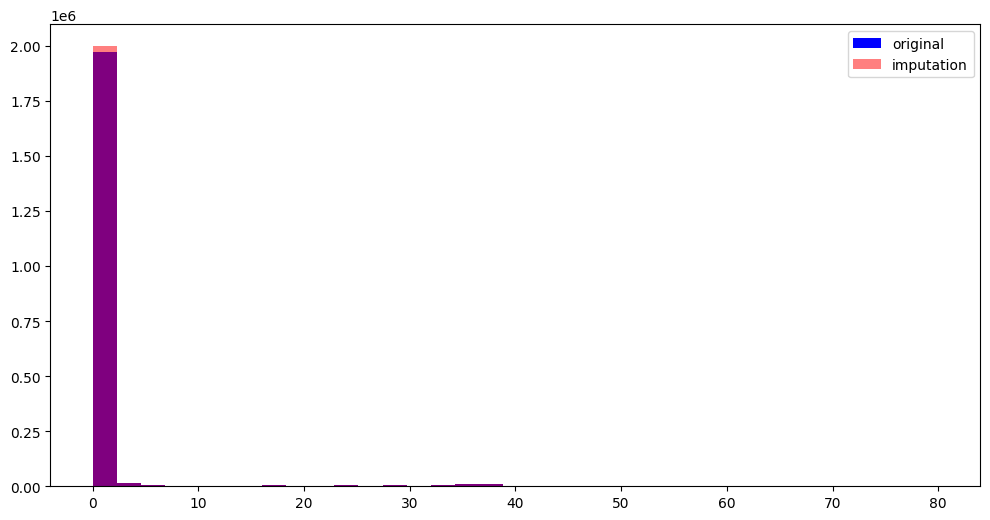

In [43]:
fig, axs = plt.subplots(figsize = (12,6))
energy_comp_df['Sub_metering_2'].hist(ax = axs, label = 'original', color='blue', alpha = 1, bins = 35, grid=False)
mean_df['Sub_metering_2'].hist(ax=axs, label= 'imputation', color = 'red', alpha = 0.5, bins=35, grid = False)
axs.legend(loc='upper right')
plt.show()

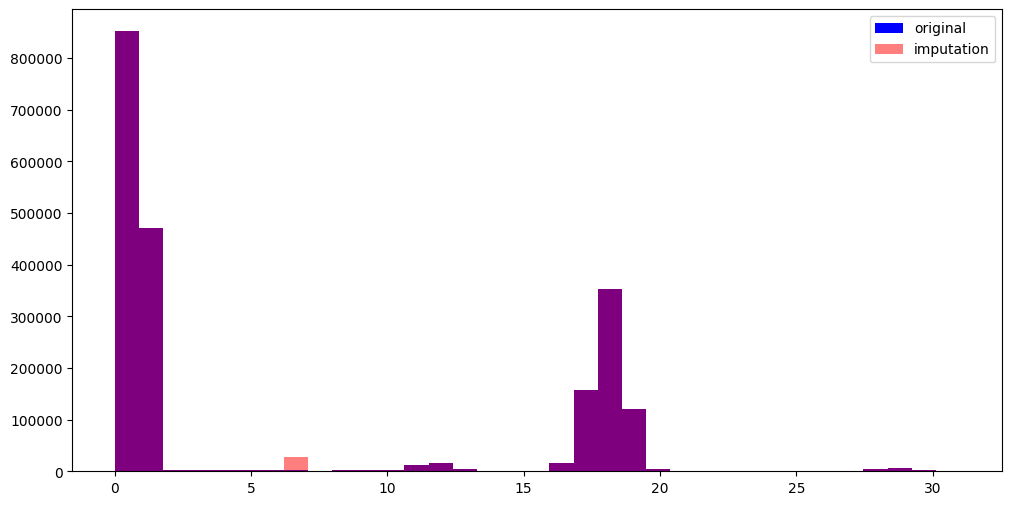

In [44]:
fig, axs = plt.subplots(figsize = (12,6))
energy_comp_df['Sub_metering_3'].hist(ax = axs, label = 'original', color='blue', alpha = 1, bins = 35, grid=False)
mean_df['Sub_metering_3'].hist(ax=axs, label= 'imputation', color = 'red', alpha = 0.5, bins=35, grid = False)
axs.legend(loc='upper right')
plt.show()

In [45]:
energy_comp_df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [46]:
# making sure there is no missing data
mean_df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

The histograms shows the distribution of each variable, the blue is the distribution of the original data with missing data, the red show the distribution of the mean imputation method for missing data, and the purple is where the 2 distributions overlaps.

Looking at the histograms we see that the structure of the distributions for all the features have similar shapes, similar means, and similar variance, so using the mean imputation for missing data does not introduce a significant bias for our data.

NOTE: To formally check bias with statistical tests then ANOVA or t-test could have an interest, however we chose not to do so, because our data is not MCAR.

Lets explore other easy to access imputation methods namely, Linear, cubic, and time methods in the pandas interpolate function.


In [5]:
lin_df = energy_comp_df.interpolate(method = 'linear')
cub_df = energy_comp_df.interpolate(method = 'cubic')
time_df = energy_comp_df.interpolate(method='time')

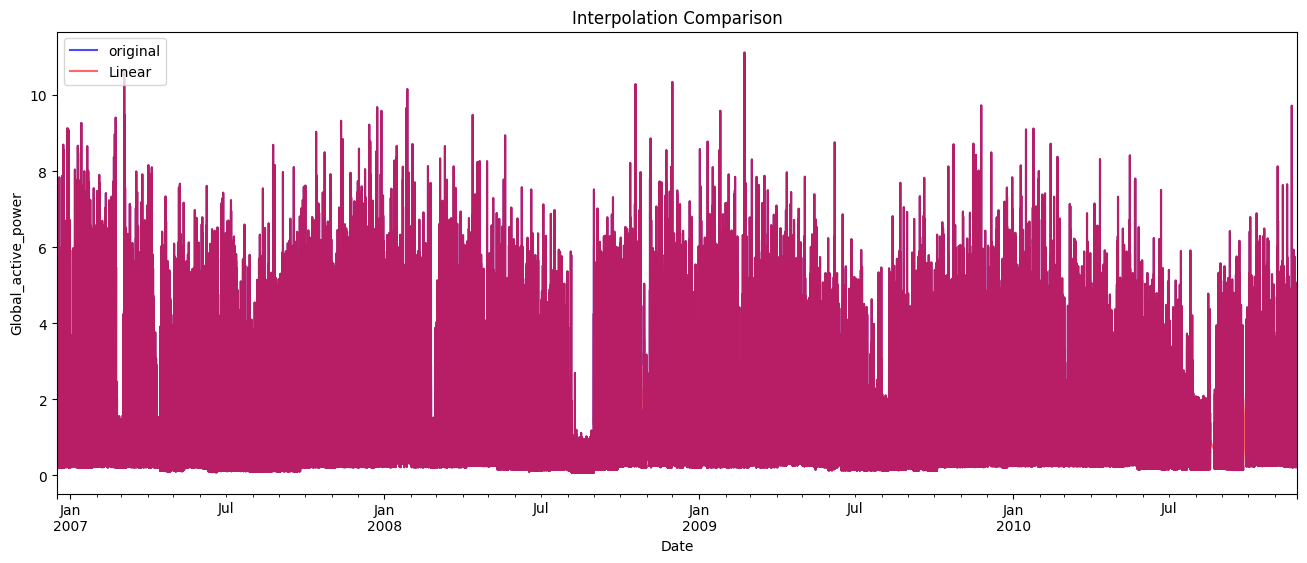

In [48]:
fig, axs = plt.subplots(figsize = (16,6))
energy_comp_df['Global_active_power'].plot(ax = axs, label = 'original', color='blue', alpha = 0.7)
lin_df['Global_active_power'].plot(ax=axs, label= 'Linear', color = 'red', alpha = 0.6)
axs.legend(loc='upper left')
axs.set_xlabel('Date')
axs.set_ylabel('Global_active_power')
axs.set_title( 'Interpolation Comparison')
plt.show()

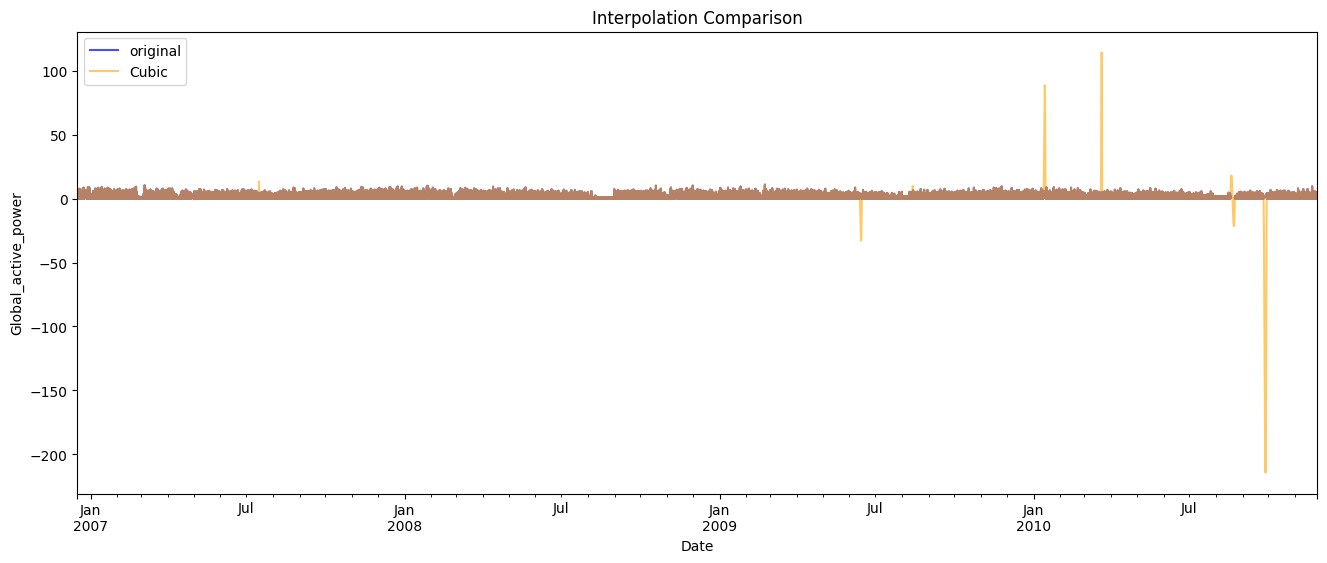

In [49]:
fig, axs = plt.subplots(figsize = (16,6))
energy_comp_df['Global_active_power'].plot(ax = axs, label = 'original', color='blue', alpha = 0.7)
cub_df['Global_active_power'].plot(ax=axs, label= 'Cubic', color = 'orange', alpha = 0.6)
axs.legend(loc='upper left')
axs.set_xlabel('Date')
axs.set_ylabel('Global_active_power')
axs.set_title( 'Interpolation Comparison')
plt.show()

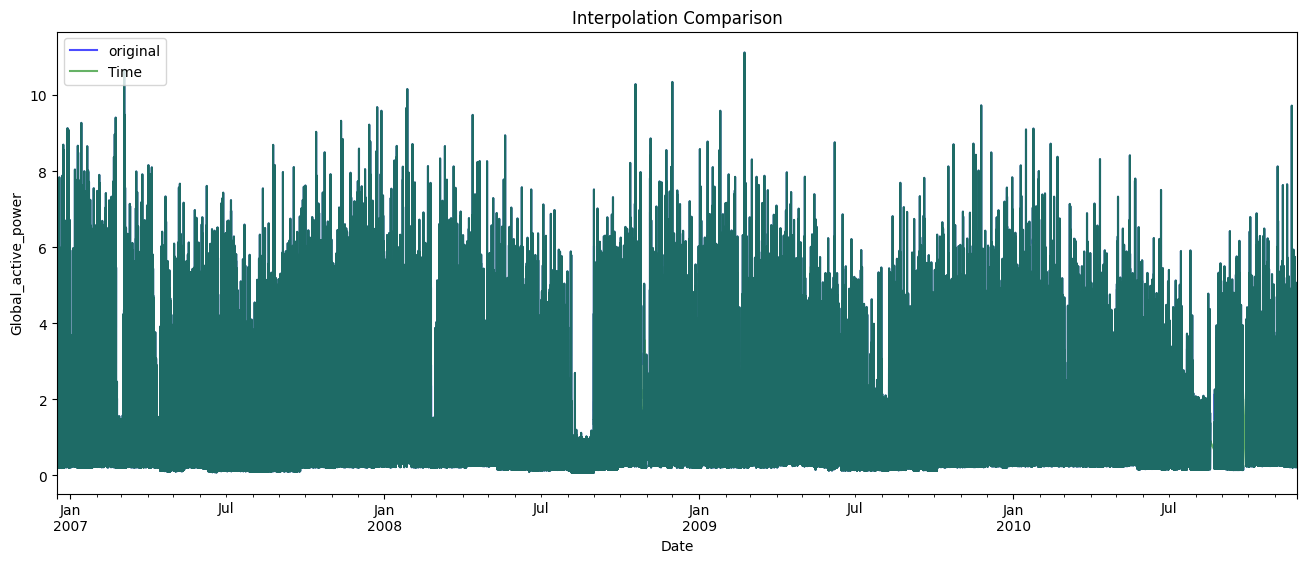

In [50]:
fig, axs = plt.subplots(figsize = (16,6))
energy_comp_df['Global_active_power'].plot(ax = axs, label = 'original', color='blue', alpha = 0.7)
time_df['Global_active_power'].plot(ax=axs, label= 'Time', color = 'green', alpha = 0.6)
axs.legend(loc='upper left')
axs.set_xlabel('Date')
axs.set_ylabel('Global_active_power')
axs.set_title( 'Interpolation Comparison')
plt.show()

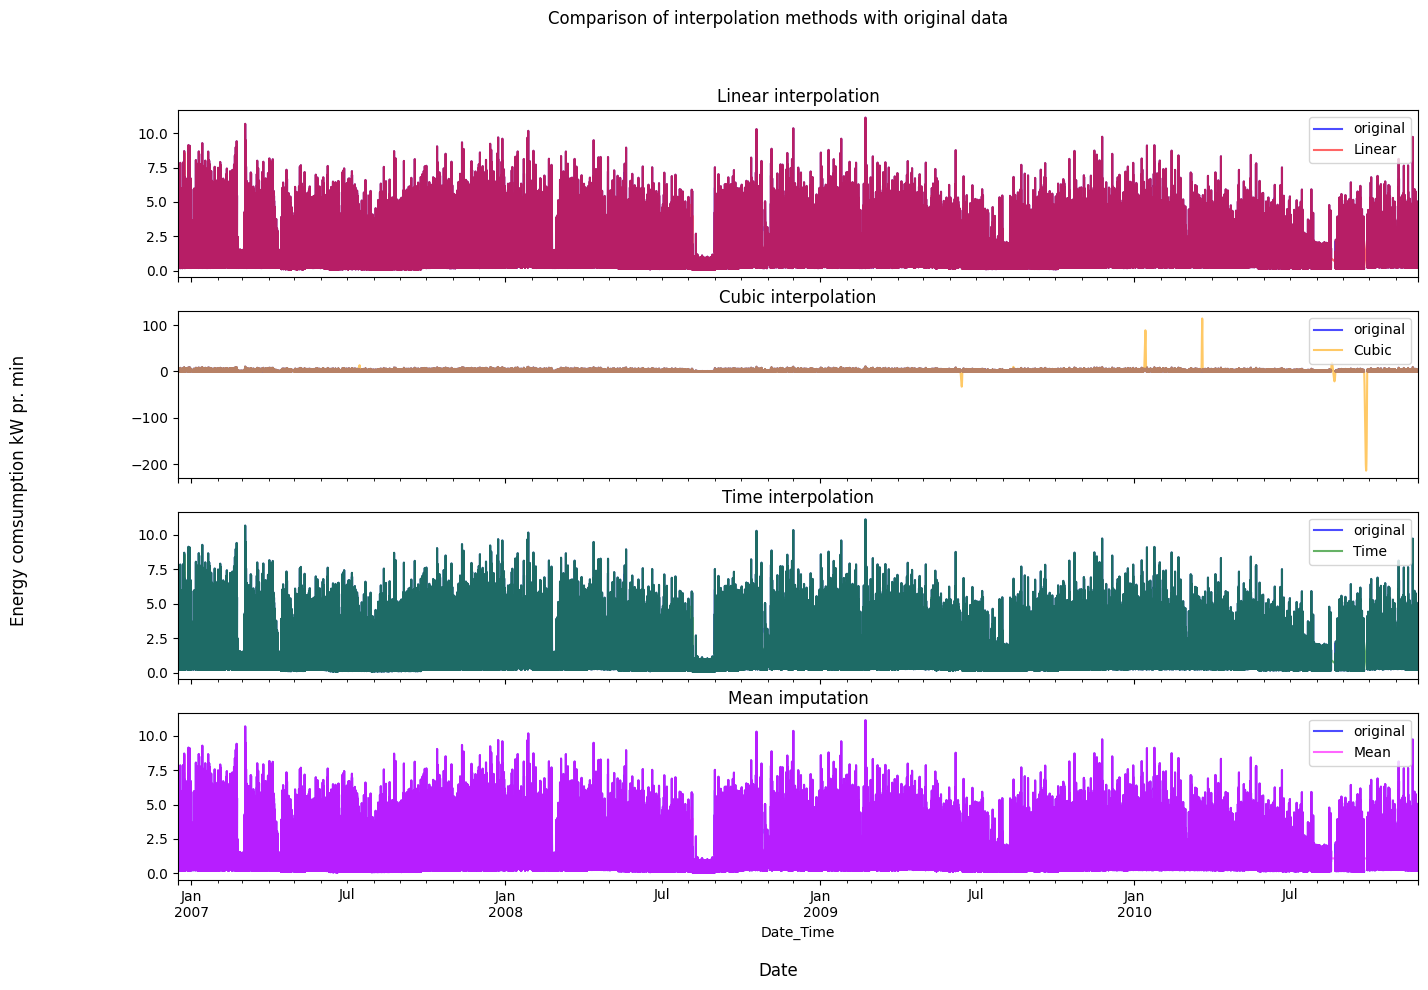

In [51]:
fig, axs = plt.subplots(4, figsize=(16,10), sharex = True) 
energy_comp_df['Global_active_power'].plot(ax = axs[0], label = 'original', color='blue', alpha = 0.7)
lin_df['Global_active_power'].plot(ax=axs[0], label= 'Linear', color = 'red', alpha = 0.6)
energy_comp_df['Global_active_power'].plot(ax = axs[1], label = 'original', color='blue', alpha = 0.7)
cub_df['Global_active_power'].plot(ax=axs[1], label= 'Cubic', color = 'orange', alpha = 0.6)
energy_comp_df['Global_active_power'].plot(ax = axs[2], label = 'original', color='blue', alpha = 0.7)
time_df['Global_active_power'].plot(ax=axs[2], label= 'Time', color = 'green', alpha = 0.6)
energy_comp_df['Global_active_power'].plot(ax = axs[3], label = 'original', color='blue', alpha = 0.7)
mean_df['Global_active_power'].plot(ax=axs[3], label= 'Mean', color = 'magenta', alpha = 0.6)
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
axs[2].legend(loc='upper right')
axs[3].legend(loc='upper right')
axs[0].set_title('Linear interpolation')
axs[1].set_title('Cubic interpolation')
axs[2].set_title('Time interpolation')
axs[3].set_title('Mean imputation')
fig.suptitle('Comparison of interpolation methods with original data')
fig.supxlabel('Date')
fig.supylabel('Energy comsumption kW pr. min')
plt.show()

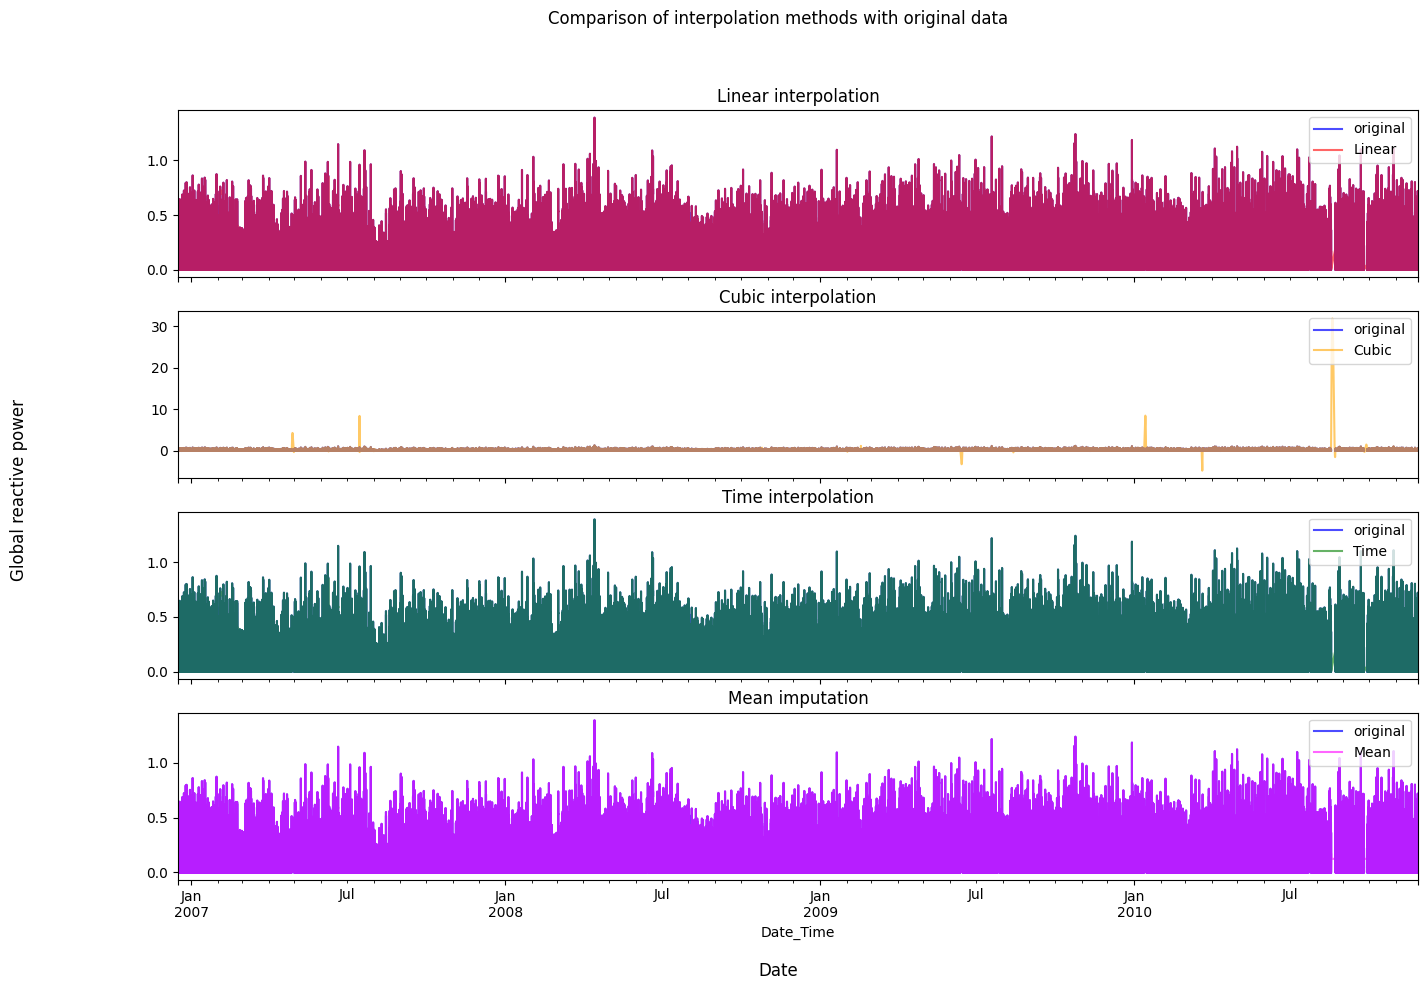

In [52]:
fig, axs = plt.subplots(4, figsize=(16,10), sharex = True) 
energy_comp_df['Global_reactive_power'].plot(ax = axs[0], label = 'original', color='blue', alpha = 0.7)
lin_df['Global_reactive_power'].plot(ax=axs[0], label= 'Linear', color = 'red', alpha = 0.6)
energy_comp_df['Global_reactive_power'].plot(ax = axs[1], label = 'original', color='blue', alpha = 0.7)
cub_df['Global_reactive_power'].plot(ax=axs[1], label= 'Cubic', color = 'orange', alpha = 0.6)
energy_comp_df['Global_reactive_power'].plot(ax = axs[2], label = 'original', color='blue', alpha = 0.7)
time_df['Global_reactive_power'].plot(ax=axs[2], label= 'Time', color = 'green', alpha = 0.6)
energy_comp_df['Global_reactive_power'].plot(ax = axs[3], label = 'original', color='blue', alpha = 0.7)
mean_df['Global_reactive_power'].plot(ax=axs[3], label= 'Mean', color = 'magenta', alpha = 0.6)
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
axs[2].legend(loc='upper right')
axs[3].legend(loc='upper right')
axs[0].set_title('Linear interpolation')
axs[1].set_title('Cubic interpolation')
axs[2].set_title('Time interpolation')
axs[3].set_title('Mean imputation')
fig.suptitle('Comparison of interpolation methods with original data')
fig.supxlabel('Date')
fig.supylabel('Global reactive power')
plt.show()

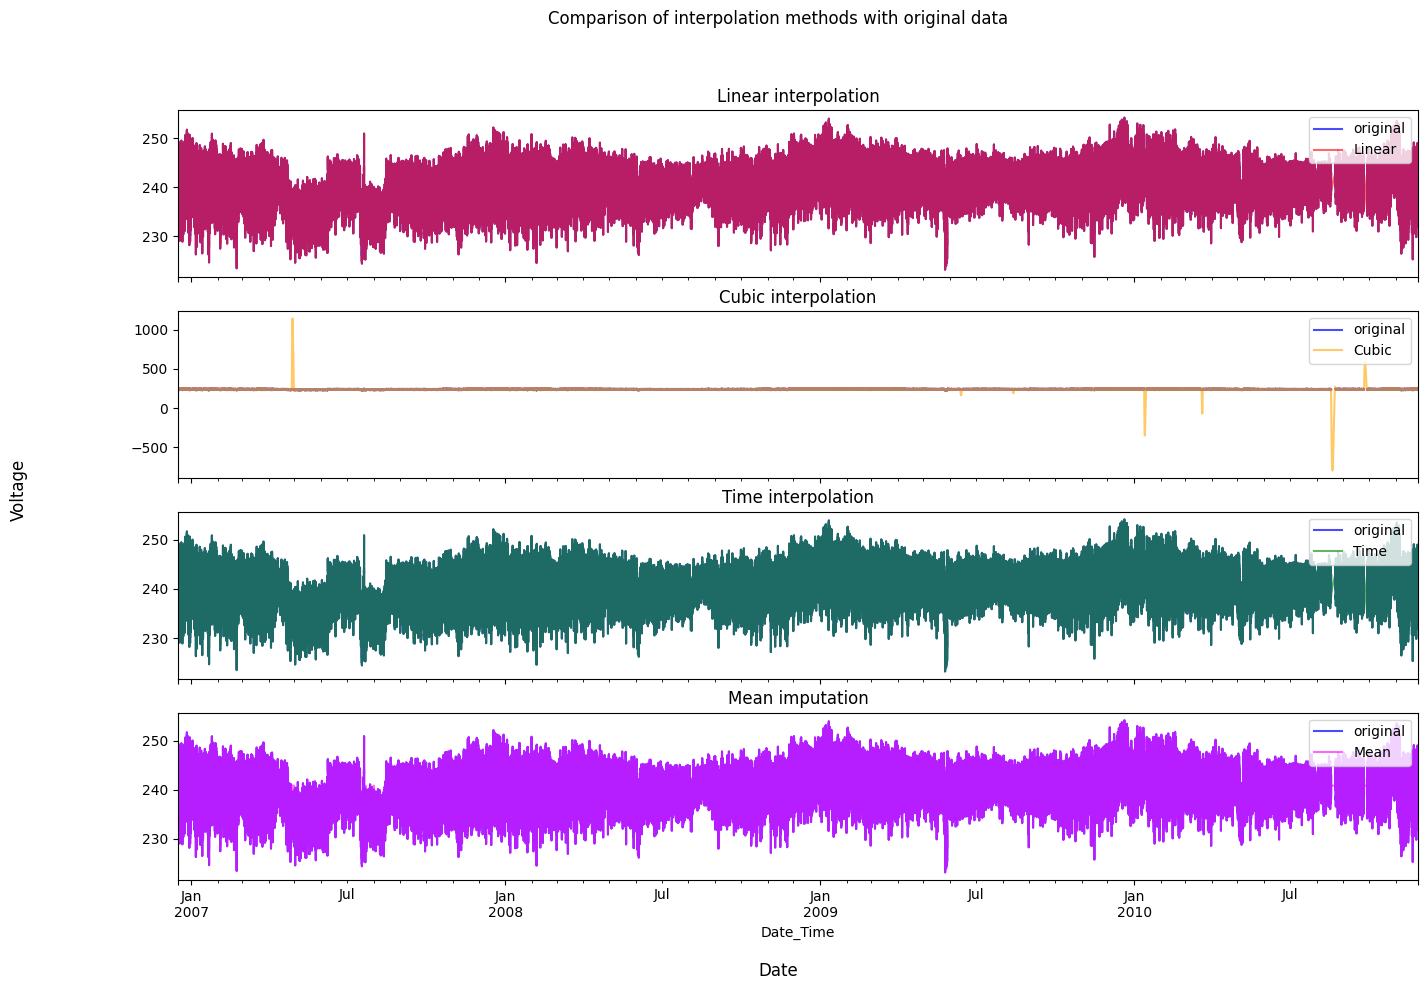

In [53]:
fig, axs = plt.subplots(4, figsize=(16,10), sharex = True) 
energy_comp_df['Voltage'].plot(ax = axs[0], label = 'original', color='blue', alpha = 0.7)
lin_df['Voltage'].plot(ax=axs[0], label= 'Linear', color = 'red', alpha = 0.6)
energy_comp_df['Voltage'].plot(ax = axs[1], label = 'original', color='blue', alpha = 0.7)
cub_df['Voltage'].plot(ax=axs[1], label= 'Cubic', color = 'orange', alpha = 0.6)
energy_comp_df['Voltage'].plot(ax = axs[2], label = 'original', color='blue', alpha = 0.7)
time_df['Voltage'].plot(ax=axs[2], label= 'Time', color = 'green', alpha = 0.6)
energy_comp_df['Voltage'].plot(ax = axs[3], label = 'original', color='blue', alpha = 0.7)
mean_df['Voltage'].plot(ax=axs[3], label= 'Mean', color = 'magenta', alpha = 0.6)
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
axs[2].legend(loc='upper right')
axs[3].legend(loc='upper right')
axs[0].set_title('Linear interpolation')
axs[1].set_title('Cubic interpolation')
axs[2].set_title('Time interpolation')
axs[3].set_title('Mean imputation')
fig.suptitle('Comparison of interpolation methods with original data')
fig.supxlabel('Date')
fig.supylabel('Voltage')
plt.show()

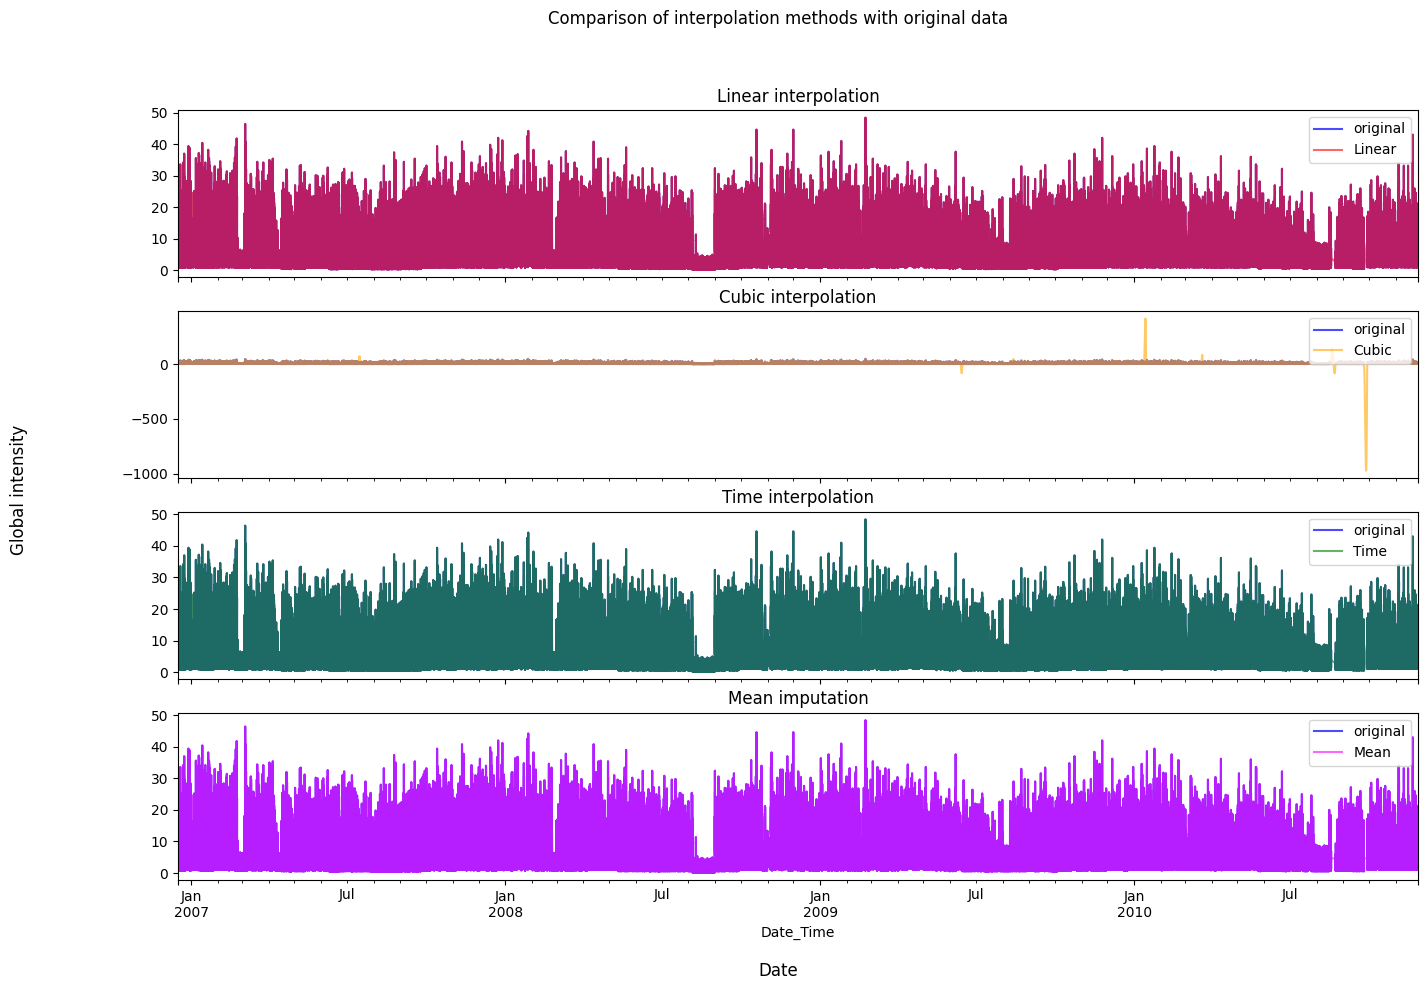

In [54]:
fig, axs = plt.subplots(4, figsize=(16,10), sharex = True) 
energy_comp_df['Global_intensity'].plot(ax = axs[0], label = 'original', color='blue', alpha = 0.7)
lin_df['Global_intensity'].plot(ax=axs[0], label= 'Linear', color = 'red', alpha = 0.6)
energy_comp_df['Global_intensity'].plot(ax = axs[1], label = 'original', color='blue', alpha = 0.7)
cub_df['Global_intensity'].plot(ax=axs[1], label= 'Cubic', color = 'orange', alpha = 0.6)
energy_comp_df['Global_intensity'].plot(ax = axs[2], label = 'original', color='blue', alpha = 0.7)
time_df['Global_intensity'].plot(ax=axs[2], label= 'Time', color = 'green', alpha = 0.6)
energy_comp_df['Global_intensity'].plot(ax = axs[3], label = 'original', color='blue', alpha = 0.7)
mean_df['Global_intensity'].plot(ax=axs[3], label= 'Mean', color = 'magenta', alpha = 0.6)
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
axs[2].legend(loc='upper right')
axs[3].legend(loc='upper right')
axs[0].set_title('Linear interpolation')
axs[1].set_title('Cubic interpolation')
axs[2].set_title('Time interpolation')
axs[3].set_title('Mean imputation')
fig.suptitle('Comparison of interpolation methods with original data')
fig.supxlabel('Date')
fig.supylabel('Global intensity')
plt.show()

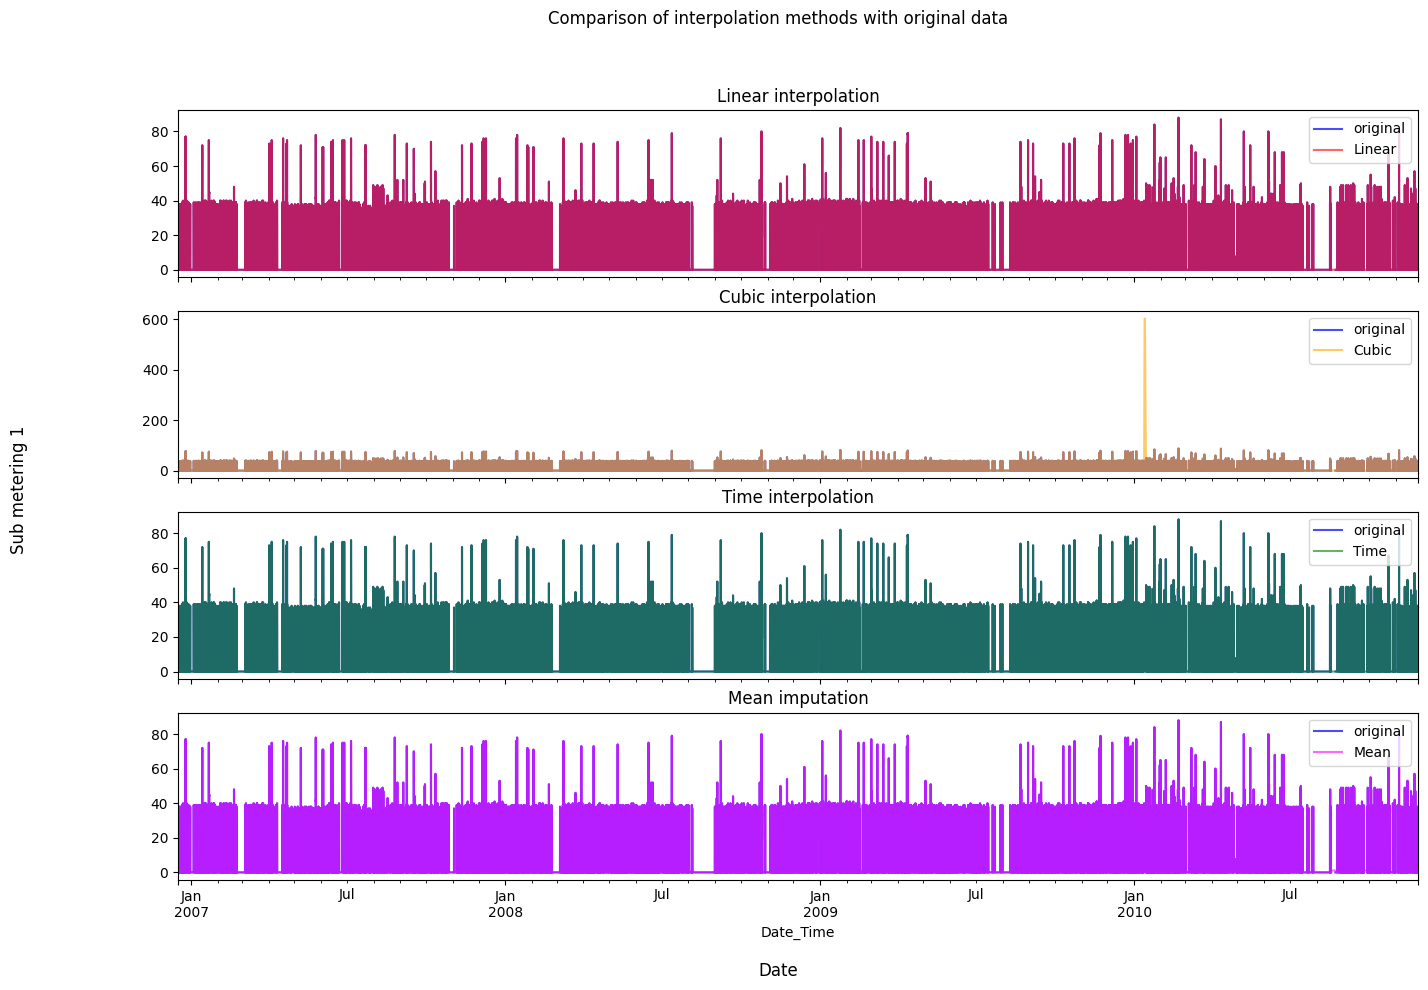

In [55]:
fig, axs = plt.subplots(4, figsize=(16,10), sharex = True) 
energy_comp_df['Sub_metering_1'].plot(ax = axs[0], label = 'original', color='blue', alpha = 0.7)
lin_df['Sub_metering_1'].plot(ax=axs[0], label= 'Linear', color = 'red', alpha = 0.6)
energy_comp_df['Sub_metering_1'].plot(ax = axs[1], label = 'original', color='blue', alpha = 0.7)
cub_df['Sub_metering_1'].plot(ax=axs[1], label= 'Cubic', color = 'orange', alpha = 0.6)
energy_comp_df['Sub_metering_1'].plot(ax = axs[2], label = 'original', color='blue', alpha = 0.7)
time_df['Sub_metering_1'].plot(ax=axs[2], label= 'Time', color = 'green', alpha = 0.6)
energy_comp_df['Sub_metering_1'].plot(ax = axs[3], label = 'original', color='blue', alpha = 0.7)
mean_df['Sub_metering_1'].plot(ax=axs[3], label= 'Mean', color = 'magenta', alpha = 0.6)
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
axs[2].legend(loc='upper right')
axs[3].legend(loc='upper right')
axs[0].set_title('Linear interpolation')
axs[1].set_title('Cubic interpolation')
axs[2].set_title('Time interpolation')
axs[3].set_title('Mean imputation')
fig.suptitle('Comparison of interpolation methods with original data')
fig.supxlabel('Date')
fig.supylabel('Sub metering 1')
plt.show()

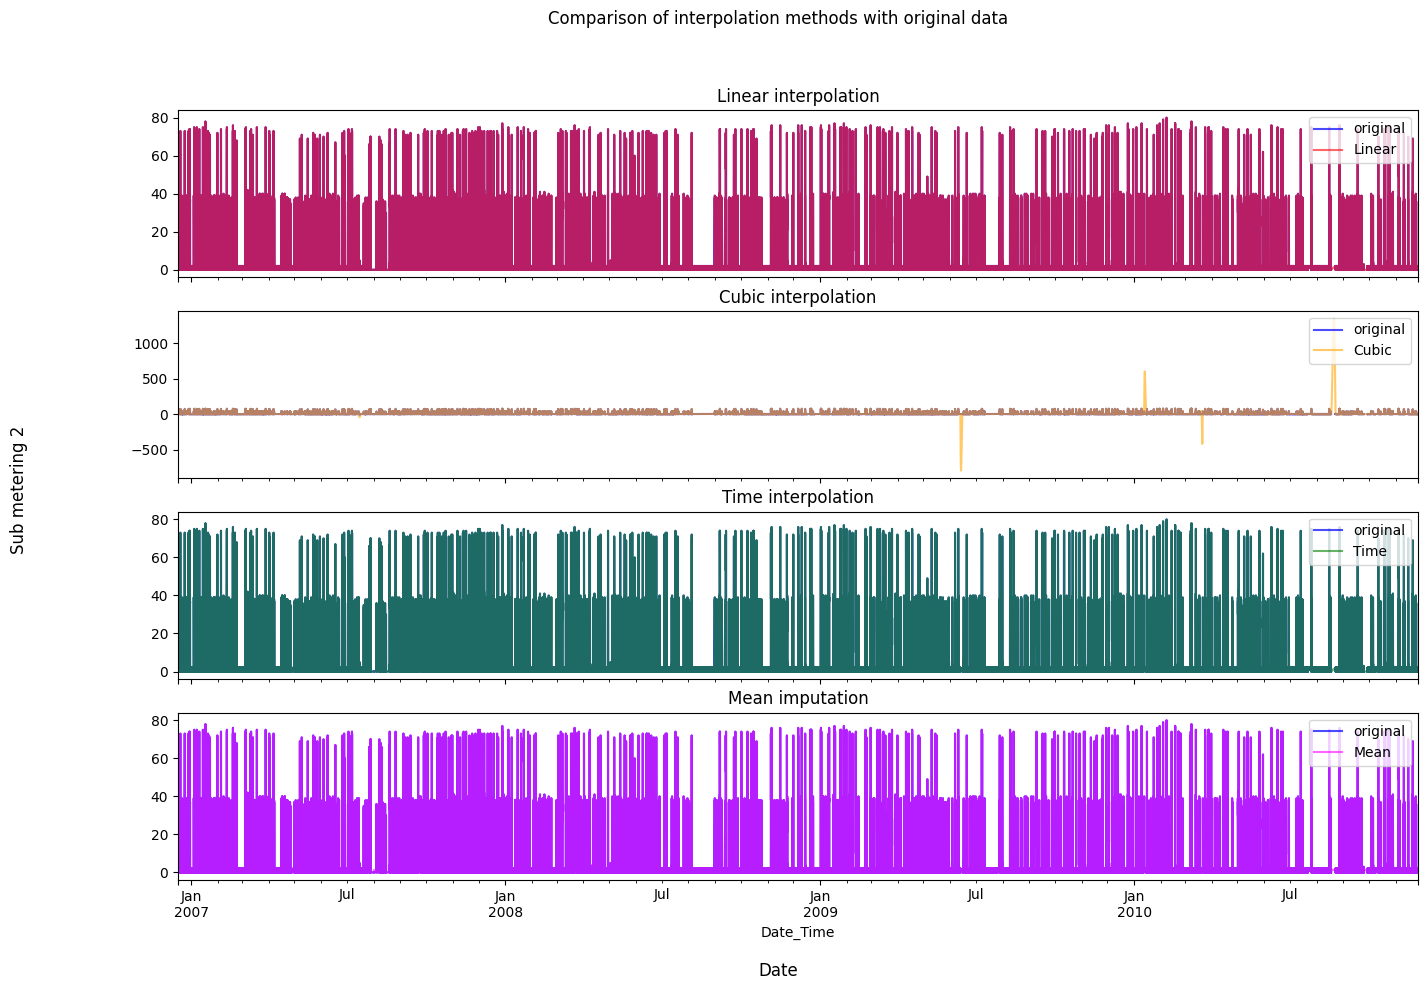

In [56]:
fig, axs = plt.subplots(4, figsize=(16,10), sharex = True) 
energy_comp_df['Sub_metering_2'].plot(ax = axs[0], label = 'original', color='blue', alpha = 0.7)
lin_df['Sub_metering_2'].plot(ax=axs[0], label= 'Linear', color = 'red', alpha = 0.6)
energy_comp_df['Sub_metering_2'].plot(ax = axs[1], label = 'original', color='blue', alpha = 0.7)
cub_df['Sub_metering_2'].plot(ax=axs[1], label= 'Cubic', color = 'orange', alpha = 0.6)
energy_comp_df['Sub_metering_2'].plot(ax = axs[2], label = 'original', color='blue', alpha = 0.7)
time_df['Sub_metering_2'].plot(ax=axs[2], label= 'Time', color = 'green', alpha = 0.6)
energy_comp_df['Sub_metering_2'].plot(ax = axs[3], label = 'original', color='blue', alpha = 0.7)
mean_df['Sub_metering_2'].plot(ax=axs[3], label= 'Mean', color = 'magenta', alpha = 0.6)
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
axs[2].legend(loc='upper right')
axs[3].legend(loc='upper right')
axs[0].set_title('Linear interpolation')
axs[1].set_title('Cubic interpolation')
axs[2].set_title('Time interpolation')
axs[3].set_title('Mean imputation')
fig.suptitle('Comparison of interpolation methods with original data')
fig.supxlabel('Date')
fig.supylabel('Sub metering 2')
plt.show()

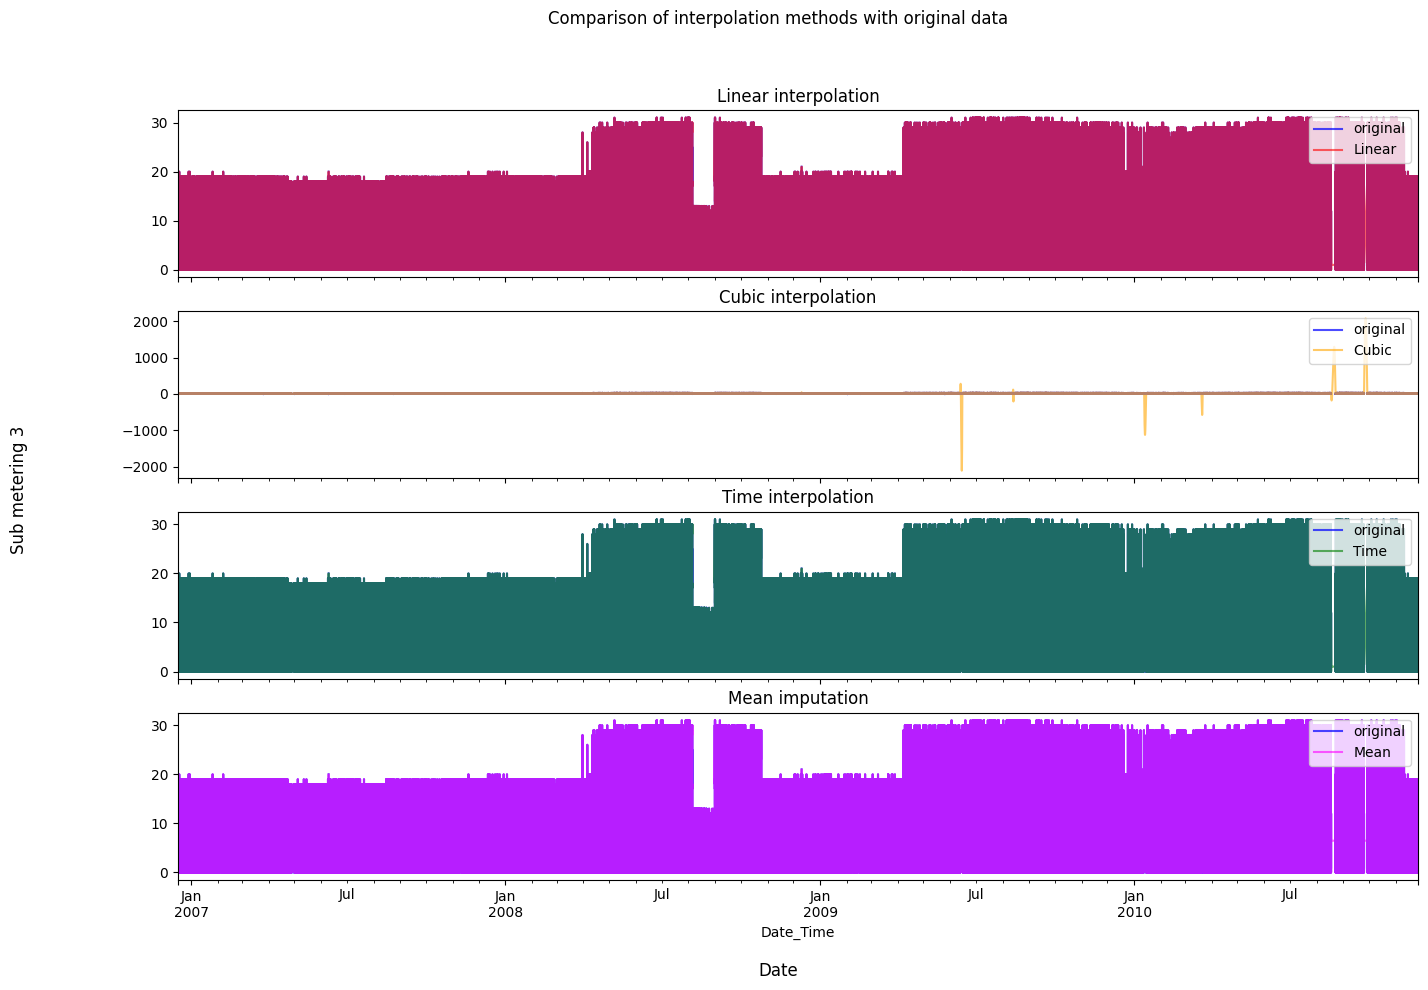

In [57]:
fig, axs = plt.subplots(4, figsize=(16,10), sharex = True) 
energy_comp_df['Sub_metering_3'].plot(ax = axs[0], label = 'original', color='blue', alpha = 0.7)
lin_df['Sub_metering_3'].plot(ax=axs[0], label= 'Linear', color = 'red', alpha = 0.6)
energy_comp_df['Sub_metering_3'].plot(ax = axs[1], label = 'original', color='blue', alpha = 0.7)
cub_df['Sub_metering_3'].plot(ax=axs[1], label= 'Cubic', color = 'orange', alpha = 0.6)
energy_comp_df['Sub_metering_3'].plot(ax = axs[2], label = 'original', color='blue', alpha = 0.7)
time_df['Sub_metering_3'].plot(ax=axs[2], label= 'Time', color = 'green', alpha = 0.6)
energy_comp_df['Sub_metering_3'].plot(ax = axs[3], label = 'original', color='blue', alpha = 0.7)
mean_df['Sub_metering_3'].plot(ax=axs[3], label= 'Mean', color = 'magenta', alpha = 0.6)
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
axs[2].legend(loc='upper right')
axs[3].legend(loc='upper right')
axs[0].set_title('Linear interpolation')
axs[1].set_title('Cubic interpolation')
axs[2].set_title('Time interpolation')
axs[3].set_title('Mean imputation')
fig.suptitle('Comparison of interpolation methods with original data')
fig.supxlabel('Date')
fig.supylabel('Sub metering 3')
plt.show()

The blue is the original data, the red is original with pandas linear interpolation, orange/yellow is from pandas cubic interpolation, the green is from pandas time interpolation, and the magenta is the mean imputation method. The darkred area is where the original and linear overlaps, the light brown area is where the original and cubic method overlaps, the dark green area is where the original and time-method overlaps, and lastly the purple area is where the original overlaps with the mean imputation.

From these plots we can see that the original data structure is well preserved from the linear, time, and mean methods. These imputation methods follows the same patterns beautifully and does not introduce unrealistic fluctuations. The cubic method on the other hand, has big fluctuations and deviate significantly from the original data structure, making it not suited to handle our data.

NOTE: 
The time method in pandas interpolate function works by linearly interpolating between the missing values based on the time index of the data. This method takes into account the time between observations and uses it to estimate missing values, and is useful when working with irregular time series data, where the time between observations may vary. While the linear method in pandas uses a linear interpolation to estimate missing values based on the values of neighboring data points. This method assumes that the data is linearly varying between the observed data points, which may not always be the case for time series data. So both methods uses linearity, but one uses the time index and the other does not.
We are choosing the pandas times interpolation to further our analysis. If data set was bigger we might have chosen mean imputation if computationspeed is affected.

### Data explorations

We explore some basic descriptive statistics for the time interpolated data and will resample the data to represent it in hours, days, and months. 

In [58]:
time_df.mean()

Global_active_power        1.090280
Global_reactive_power      0.123649
Voltage                  240.832785
Global_intensity           4.621481
Sub_metering_1             1.109485
Sub_metering_2             1.289229
Sub_metering_3             6.442386
dtype: float64

In [59]:
energy_comp_df.mean() - time_df.mean()

Global_active_power      0.001336
Global_reactive_power    0.000065
Voltage                  0.007073
Global_intensity         0.006278
Sub_metering_1           0.012438
Sub_metering_2           0.009291
Sub_metering_3           0.016062
dtype: float64

In [60]:
time_df.describe().apply(lambda x: x.apply(lambda y: '{:.2f}'.format(y)))

Global_active_power Global_reactive_power     Voltage Global_intensity  \
count          2075259.00            2075259.00  2075259.00       2075259.00   
mean                 1.09                  0.12      240.83             4.62   
std                  1.05                  0.11        3.24             4.42   
min                  0.08                  0.00      223.20             0.20   
25%                  0.31                  0.05      238.99             1.40   
50%                  0.61                  0.10      241.00             2.75   
75%                  1.53                  0.19      242.87             6.40   
max                 11.12                  1.39      254.15            48.40   

      Sub_metering_1 Sub_metering_2 Sub_metering_3  
count     2075259.00     2075259.00     2075259.00  
mean            1.11           1.29           6.44  
std             6.12           5.79           8.42  
min             0.00           0.00           0.00  
25%             0.00           0.00           0.00  
50%             0.00           0.00           1.00  
75%             0.00           1.00          17.00  
max            88.00          80.00          31.00

In [61]:
energy_comp_df.describe().apply(lambda x: x.apply(lambda y: '{:.2f}'.format(y)))

Global_active_power Global_reactive_power     Voltage Global_intensity  \
count          2049280.00            2049280.00  2049280.00       2049280.00   
mean                 1.09                  0.12      240.84             4.63   
std                  1.06                  0.11        3.24             4.44   
min                  0.08                  0.00      223.20             0.20   
25%                  0.31                  0.05      238.99             1.40   
50%                  0.60                  0.10      241.01             2.60   
75%                  1.53                  0.19      242.89             6.40   
max                 11.12                  1.39      254.15            48.40   

      Sub_metering_1 Sub_metering_2 Sub_metering_3  
count     2049280.00     2049280.00     2049280.00  
mean            1.12           1.30           6.46  
std             6.15           5.82           8.44  
min             0.00           0.00           0.00  
25%             0.00           0.00           0.00  
50%             0.00           0.00           1.00  
75%             0.00           1.00          17.00  
max            88.00          80.00          31.00

In [6]:
hourly_df = time_df.resample('H').mean()

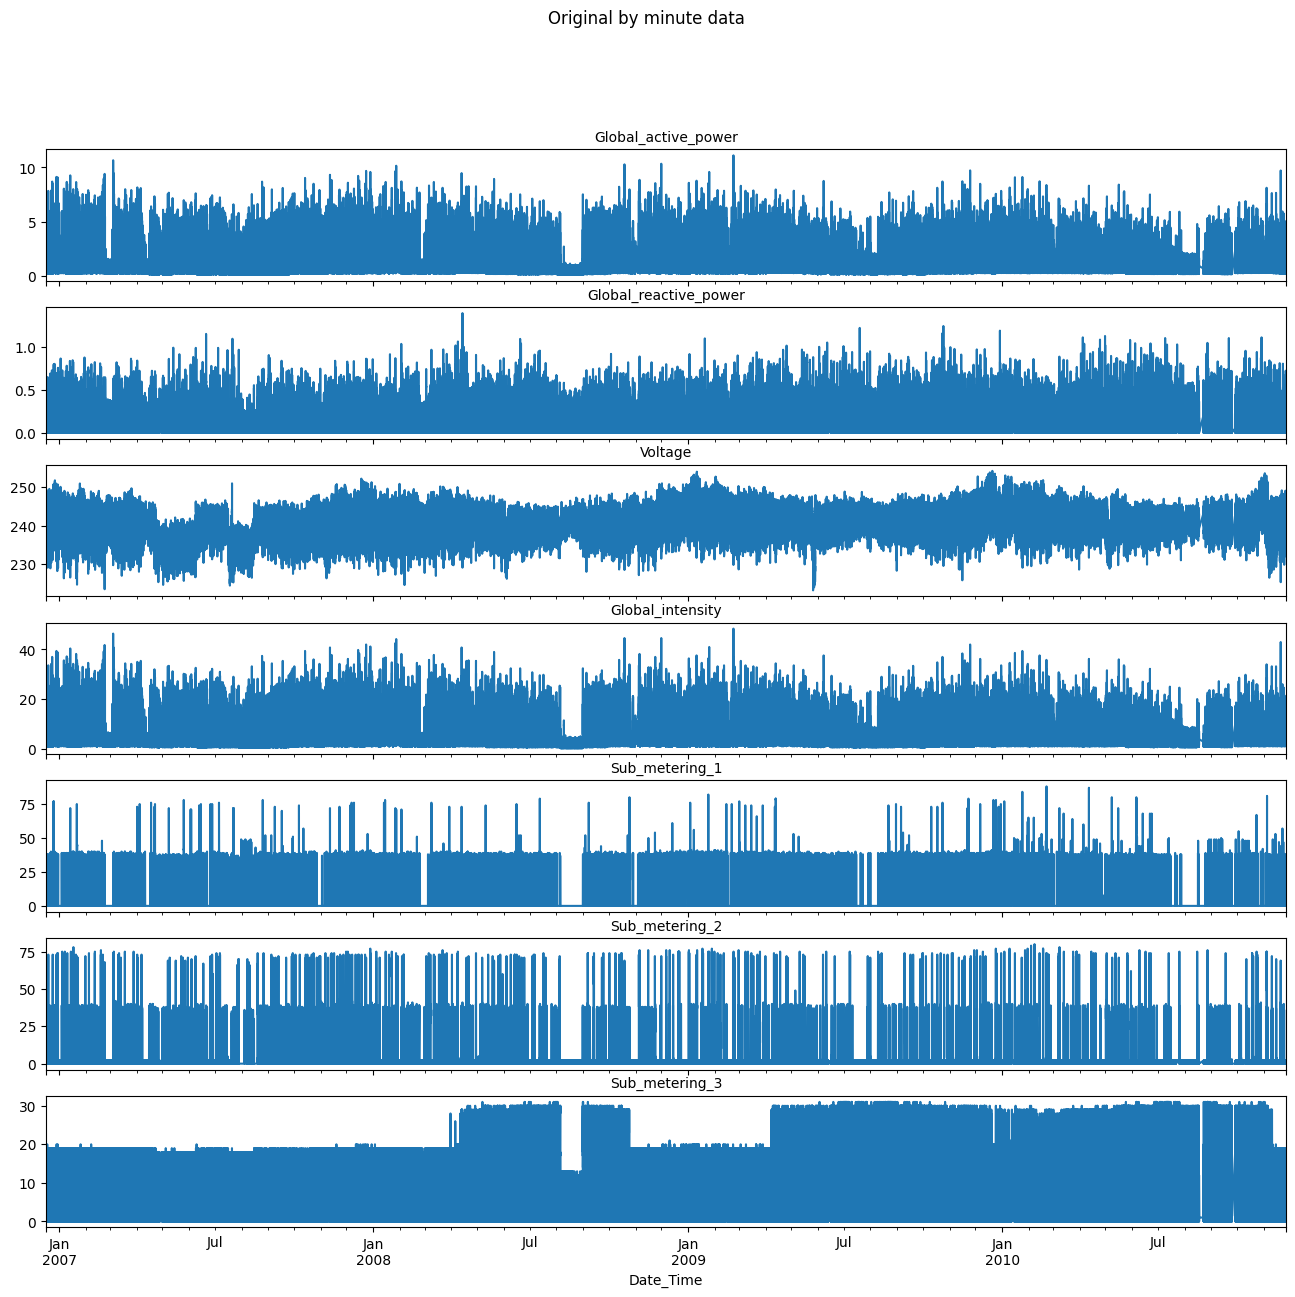

In [63]:
fig , axs = plt.subplots(nrows = len(time_df.columns), figsize = (16, 14), sharex = True)
for i, feat in enumerate(time_df.columns):
    time_df[feat].plot(ax = axs[i])
    axs[i].set_title(feat, fontsize = 10)
fig.suptitle('Original by minute data')
plt.show()

In [64]:
len(hourly_df)

34589

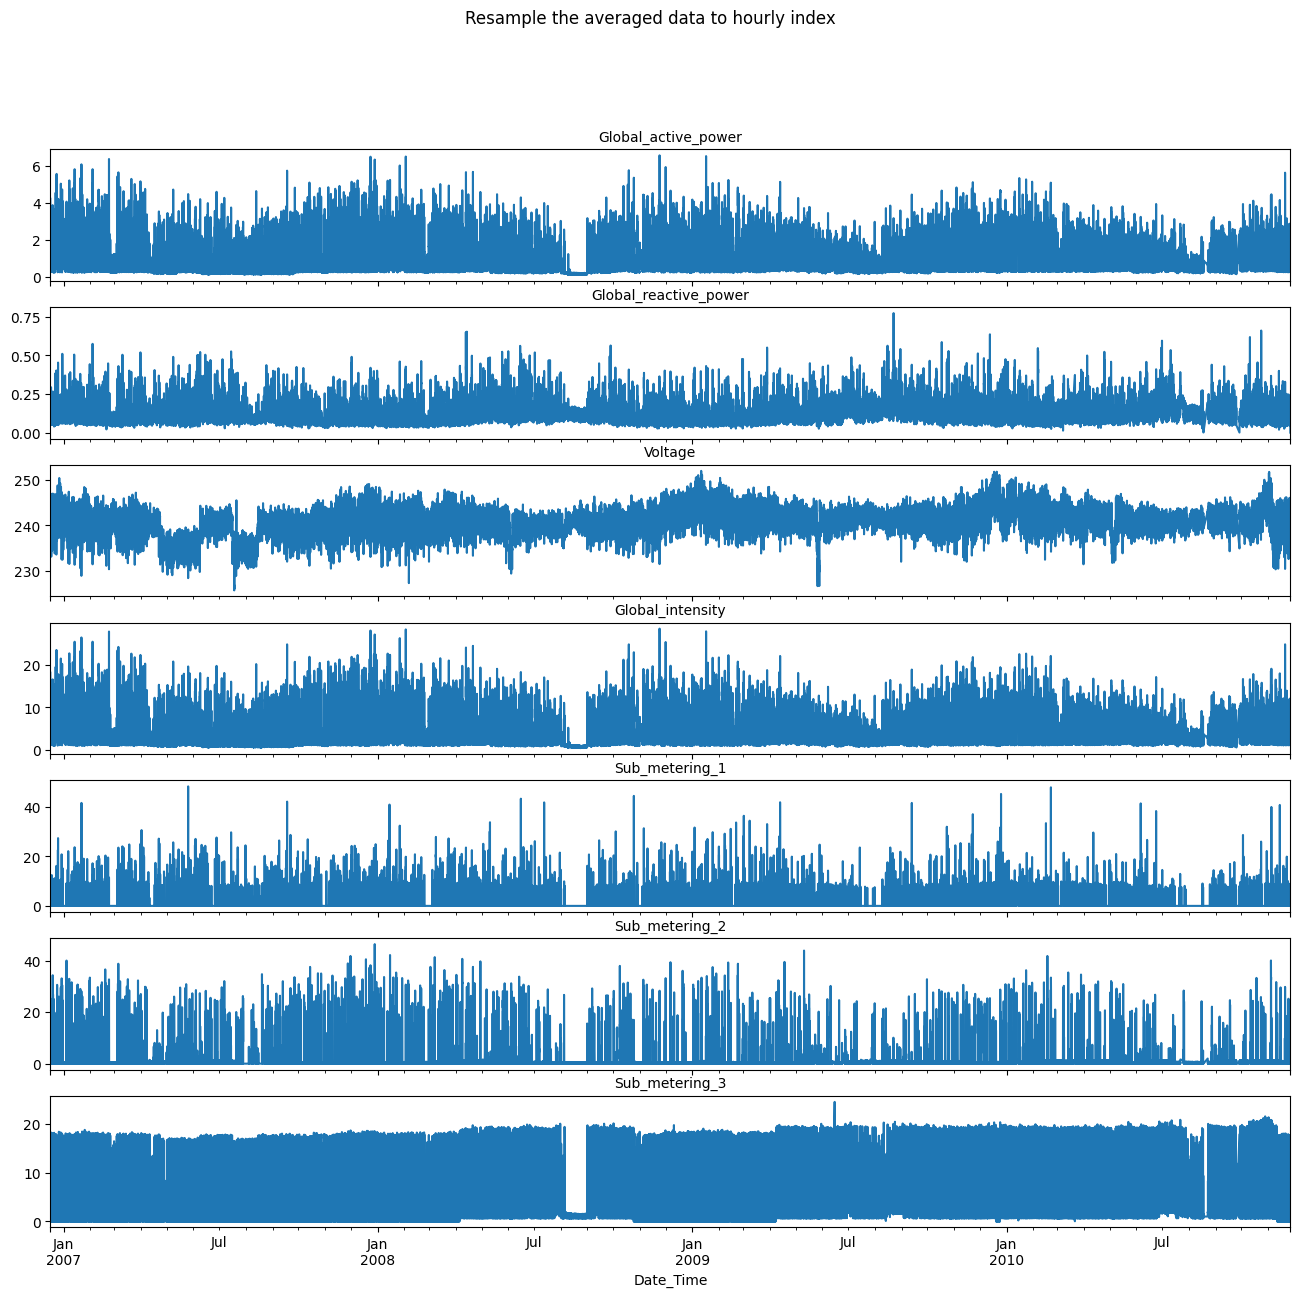

In [65]:
fig , axs = plt.subplots(nrows = len(hourly_df.columns), figsize = (16, 14), sharex = True)
for i, feat in enumerate(hourly_df.columns):
    hourly_df[feat].plot(ax = axs[i])
    axs[i].set_title(feat, fontsize = 10)
fig.suptitle('Resample the averaged data to hourly index')
plt.show()

In [66]:
daily_df = time_df.resample('D').mean()

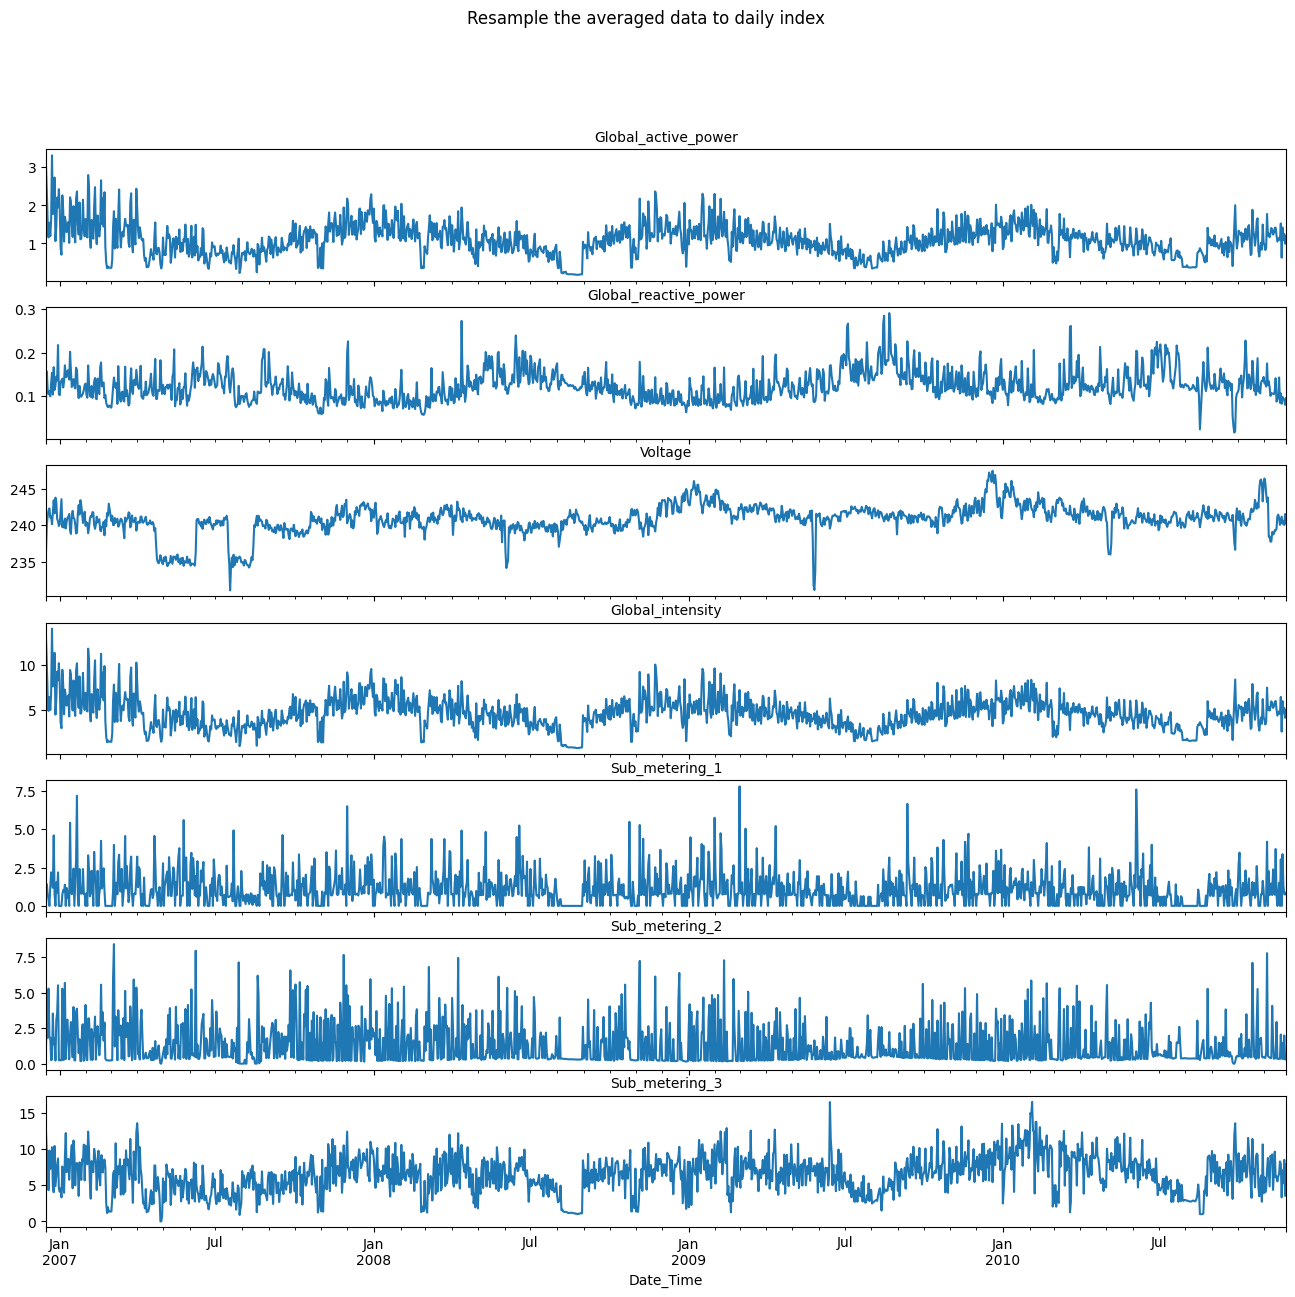

In [67]:
fig , axs = plt.subplots(nrows = len(daily_df.columns), figsize = (16, 14), sharex = True)
for i, feat in enumerate(daily_df.columns):
    daily_df[feat].plot(ax = axs[i])
    axs[i].set_title(feat, fontsize = 10)
fig.suptitle('Resample the averaged data to daily index')
plt.show()

In [68]:
monthly_df = time_df.resample('M').mean()

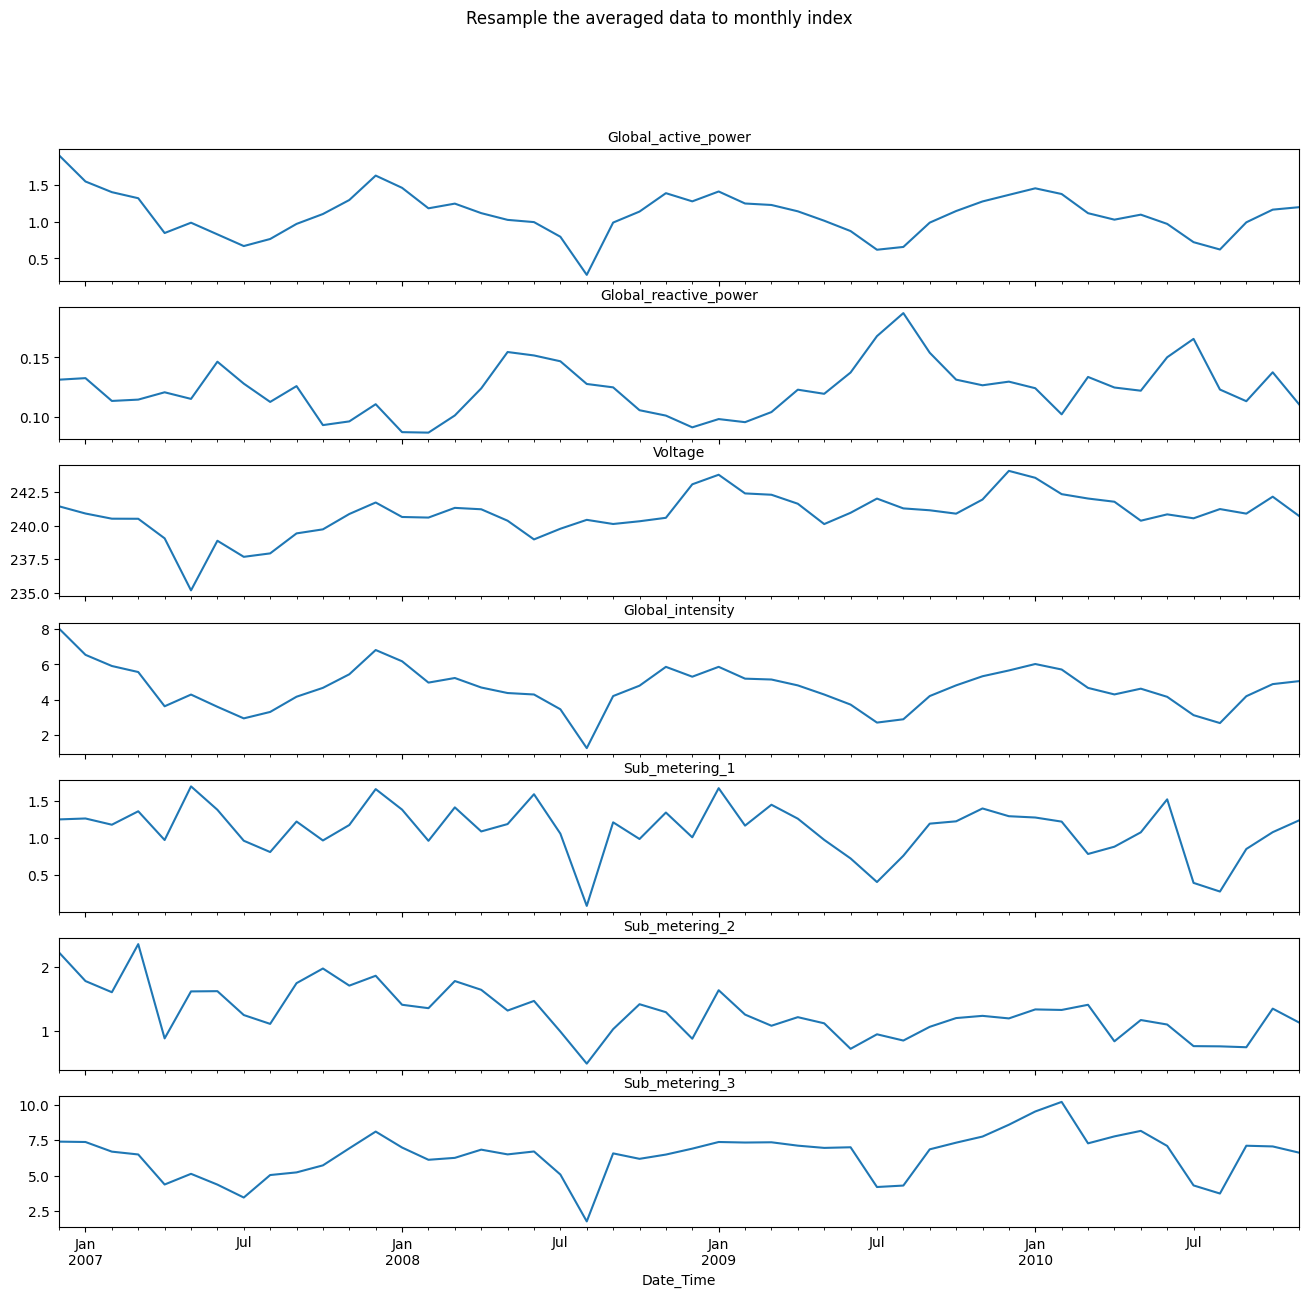

In [69]:
fig , axs = plt.subplots(nrows = len(monthly_df.columns), figsize = (16, 14), sharex = True)
for i, feat in enumerate(monthly_df.columns):
    monthly_df[feat].plot(ax = axs[i])
    axs[i].set_title(feat, fontsize = 10)
fig.suptitle('Resample the averaged data to monthly index')
plt.show()

From the above resampling plots we notice that changing the time interval from minutes to days, and months, will make changes in the structure of the data. It loses some of the finer-grained periodicity, in other words, the patterns is not as prominent in the higher timed intervals. Which will most likely affect the models predictivity.

The Resample the averaged data to hourly index plot shows that the periodicity of the data structure is well preserved, making it a reasonable choice to resample the data by hour to lower the cost of computations/runtime/epochs. 

Lets dig deeper by checking some of the statistical properties. 

In [70]:
time_df.resample('H').sum().describe().apply(lambda x: x.apply(lambda y: '{:.2f}'.format(y)))

Global_active_power Global_reactive_power   Voltage Global_intensity  \
count            34589.00              34589.00  34589.00         34589.00   
mean                65.41                  7.42  14449.40           277.28   
std                 53.65                  4.02    197.29           224.59   
min                  2.80                  0.00    719.07            11.40   
25%                 20.57                  4.68  14350.67            91.00   
50%                 48.19                  6.43  14458.48           205.40   
75%                 94.72                  8.97  14561.34           396.20   
max                393.63                 46.46  15114.12          1703.00   

      Sub_metering_1 Sub_metering_2 Sub_metering_3  
count       34589.00       34589.00       34589.00  
mean           66.57          77.35         386.53  
std           211.10         250.10         440.44  
min             0.00           0.00           0.00  
25%             0.00           0.00          39.00  
50%             0.00          20.00          99.00  
75%             0.00          39.00         845.00  
max          2902.00        2786.00        1471.47

In [71]:
time_df.describe().apply(lambda x: x.apply(lambda y: '{:.2f}'.format(y)))

Global_active_power Global_reactive_power     Voltage Global_intensity  \
count          2075259.00            2075259.00  2075259.00       2075259.00   
mean                 1.09                  0.12      240.83             4.62   
std                  1.05                  0.11        3.24             4.42   
min                  0.08                  0.00      223.20             0.20   
25%                  0.31                  0.05      238.99             1.40   
50%                  0.61                  0.10      241.00             2.75   
75%                  1.53                  0.19      242.87             6.40   
max                 11.12                  1.39      254.15            48.40   

      Sub_metering_1 Sub_metering_2 Sub_metering_3  
count     2075259.00     2075259.00     2075259.00  
mean            1.11           1.29           6.44  
std             6.12           5.79           8.42  
min             0.00           0.00           0.00  
25%             0.00           0.00           0.00  
50%             0.00           0.00           1.00  
75%             0.00           1.00          17.00  
max            88.00          80.00          31.00

In [72]:
hourly_df.describe().apply(lambda x: x.apply(lambda y: '{:.2f}'.format(y)))

Global_active_power Global_reactive_power   Voltage Global_intensity  \
count            34589.00              34589.00  34589.00         34589.00   
mean                 1.09                  0.12    240.83             4.62   
std                  0.89                  0.07      3.00             3.74   
min                  0.12                  0.00    225.83             0.50   
25%                  0.34                  0.08    239.18             1.52   
50%                  0.80                  0.11    240.97             3.42   
75%                  1.58                  0.15    242.69             6.60   
max                  6.56                  0.77    251.90            28.38   

      Sub_metering_1 Sub_metering_2 Sub_metering_3  
count       34589.00       34589.00       34589.00  
mean            1.11           1.29           6.44  
std             3.52           4.17           7.34  
min             0.00           0.00           0.00  
25%             0.00           0.00           0.65  
50%             0.00           0.33           1.65  
75%             0.00           0.65          14.08  
max            48.37          46.43          24.52

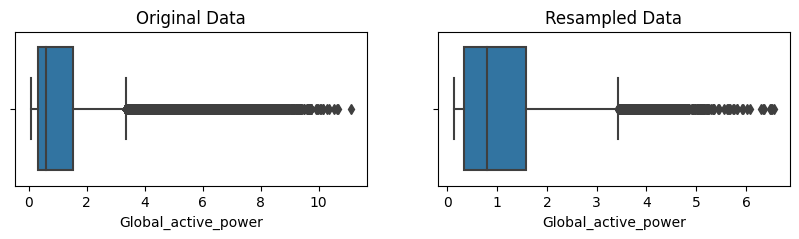

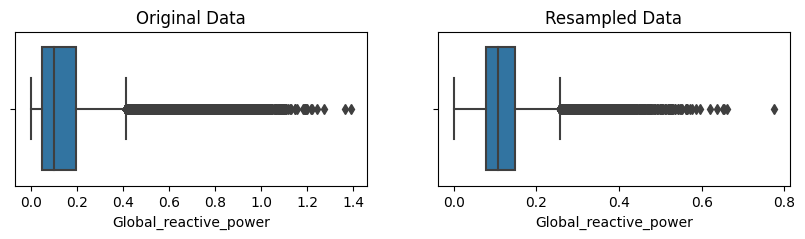

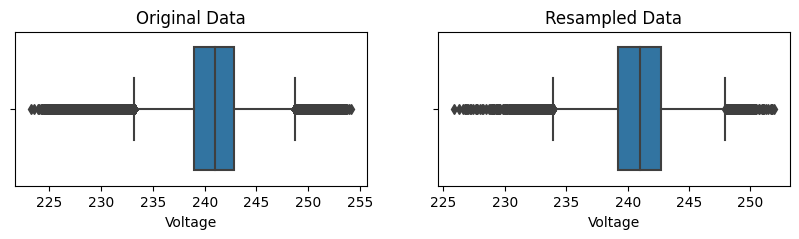

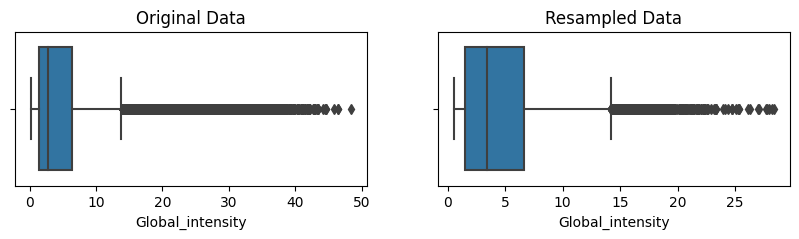

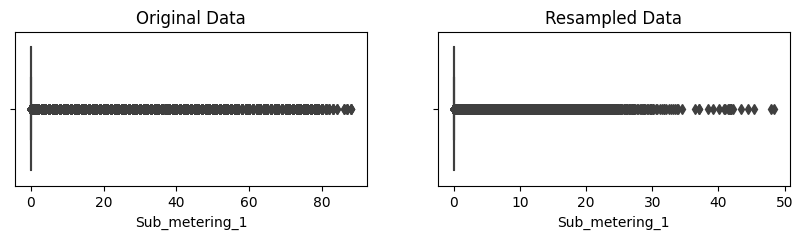

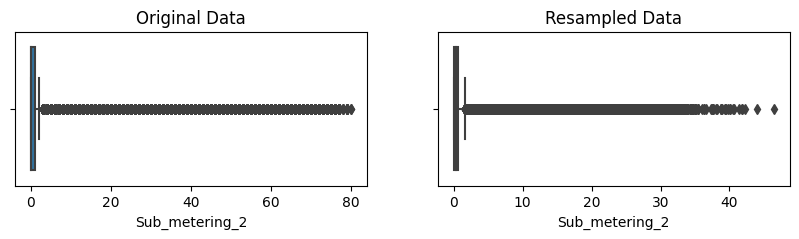

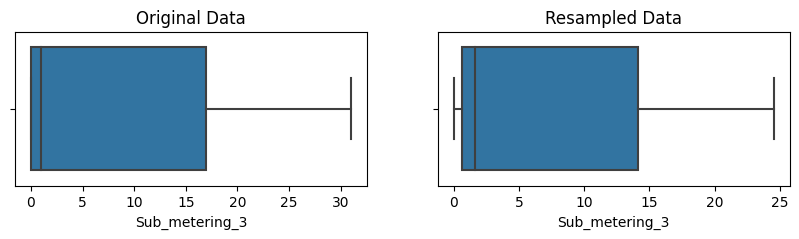

In [73]:
def plot_boxplot(feat):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,2))
    ax1.set_title('Original Data')
    ax2.set_title('Resampled Data')
    sns.boxplot(x=time_df[feat], ax=ax1)
    sns.boxplot(x=hourly_df[feat], ax=ax2)

# Call the function for each feature
for feat in time_df.columns:
    plot_boxplot(feat)

# Show the plot
plt.show()

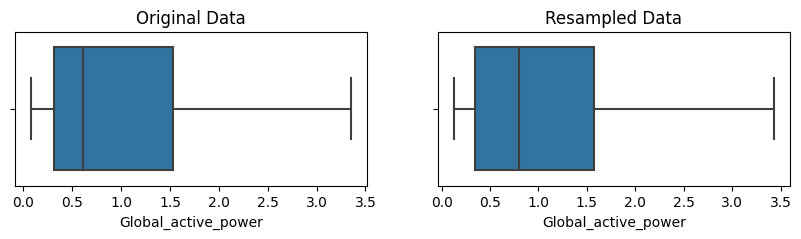

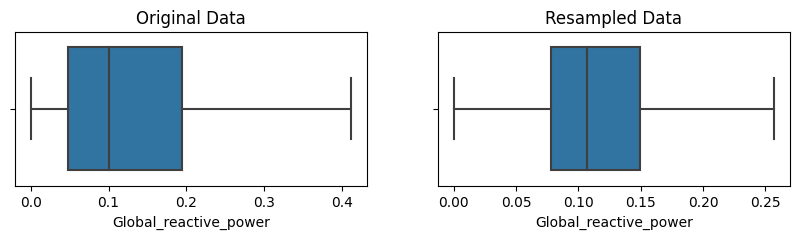

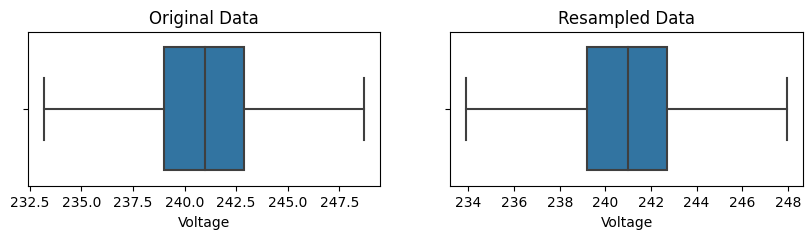

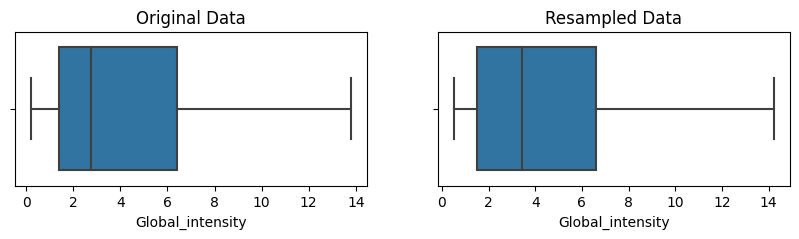

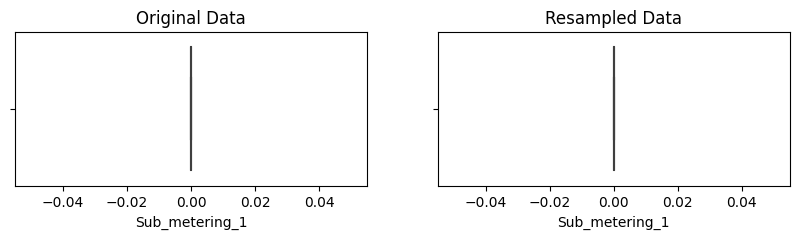

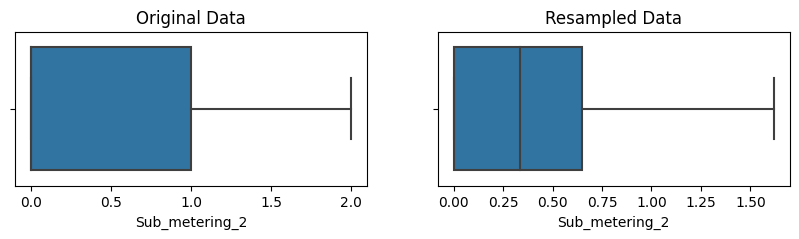

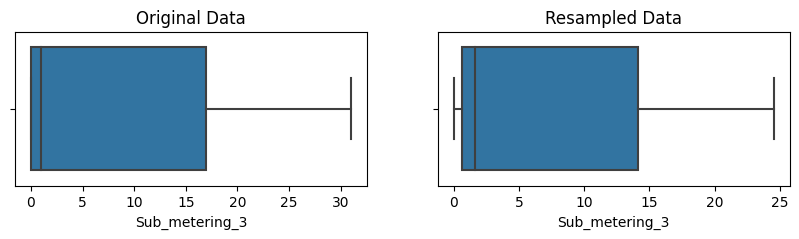

In [74]:
def plot_boxplot(feature):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,2))
    ax1.set_title('Original Data')
    ax2.set_title('Resampled Data')
    sns.boxplot(x=time_df[feature], ax=ax1, showfliers=False)
    sns.boxplot(x=hourly_df[feature], ax=ax2, showfliers=False)

# Call the function for each feature
for feature in time_df.columns:
    plot_boxplot(feature)

# Show the plot
plt.show()

We that the structure of the boxplots for the resampled hourly data, resemples the original data. Central tendencies, dispersion, and skewness looks preserved. The only noticable change is Sub_metering_2, where the boxplot structure changed. 

sub_metering_2 corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

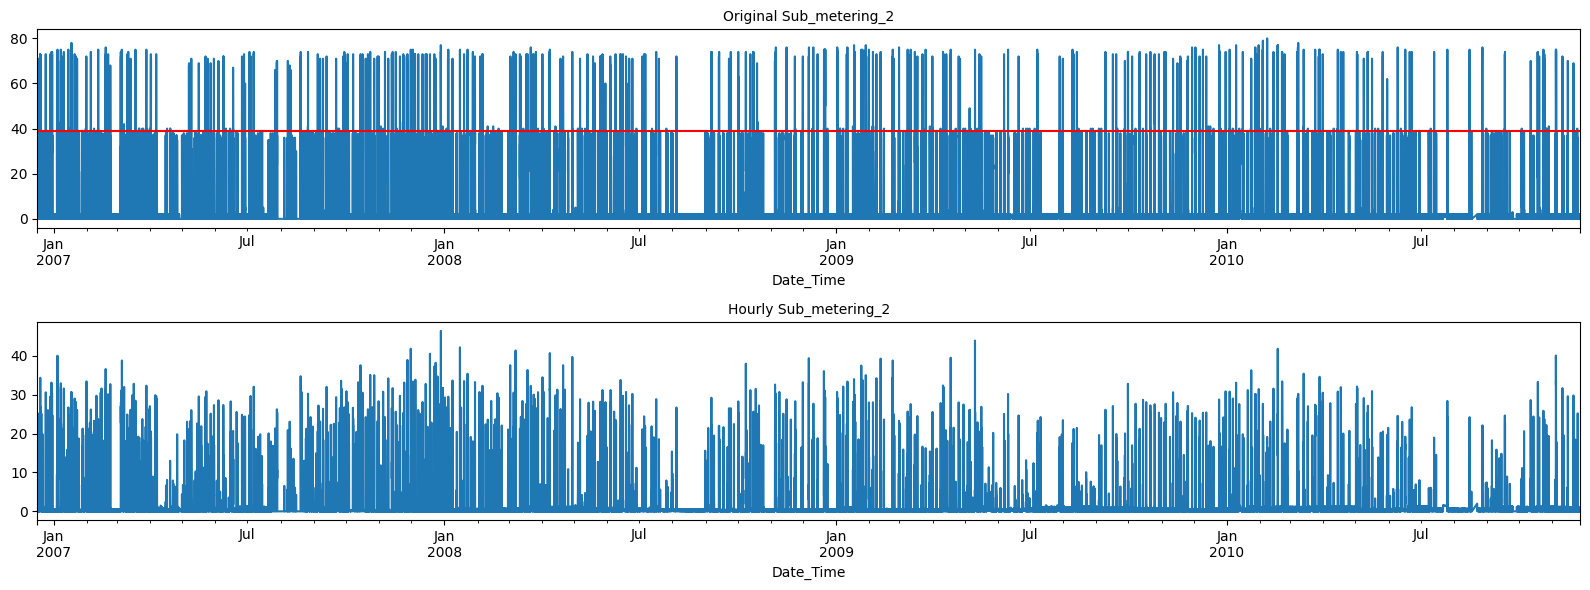

In [75]:
fig , axs = plt.subplots(nrows = 2, figsize = (16, 6))
time_df['Sub_metering_2'].plot(ax = axs[0])
axs[0].axhline(y=39, color='r')
axs[0].set_title('Original Sub_metering_2', fontsize = 10)
hourly_df['Sub_metering_2'].plot(ax = axs[1])
axs[1].set_title('Hourly Sub_metering_2', fontsize = 10)
plt.tight_layout()
plt.show()

Comparing the plots, we see that there is an obvious "band" of bars (marked by a red horizontal line) in the original plot that is not preserved when resampling to hourly interval

I would consider to resample for a lower time interval, but computational limitations are real, and my equipment won't be able handle the load, so keeping it in the by-hour is preferable. 

### Feature engineering - Voltage

Voltage is a measure of the electrical potential difference between two points in an electric circuit. It is commonly used to describe the level of electrical power or energy present in a system, and is measured in volts. In generel, the voltage in a house should be constant, around 120 or 240 volts. Variations in voltage can occur due to factors such as fluctuations in the power supply, wiring issues, or electrical equipment usage. Voltage fluctuations can affect the performance and efficiency of electrical appliances and can even cause damage. Therefore, monitoring voltage can be important in ensuring the proper functioning of electrical systems and equipment.

Given that our goal is to predict the energy comsumption at a given time, then having a feature that, generally constant by design, and thus it may not have much predictive power in distinguishing between houses or predicting energy consumption patterns.

Next step would be to check if we can remove voltage from the feature list. So we are checking if the Voltage is relatively constant and if the correlation with global_active_power and if it is weak then we can drop it.

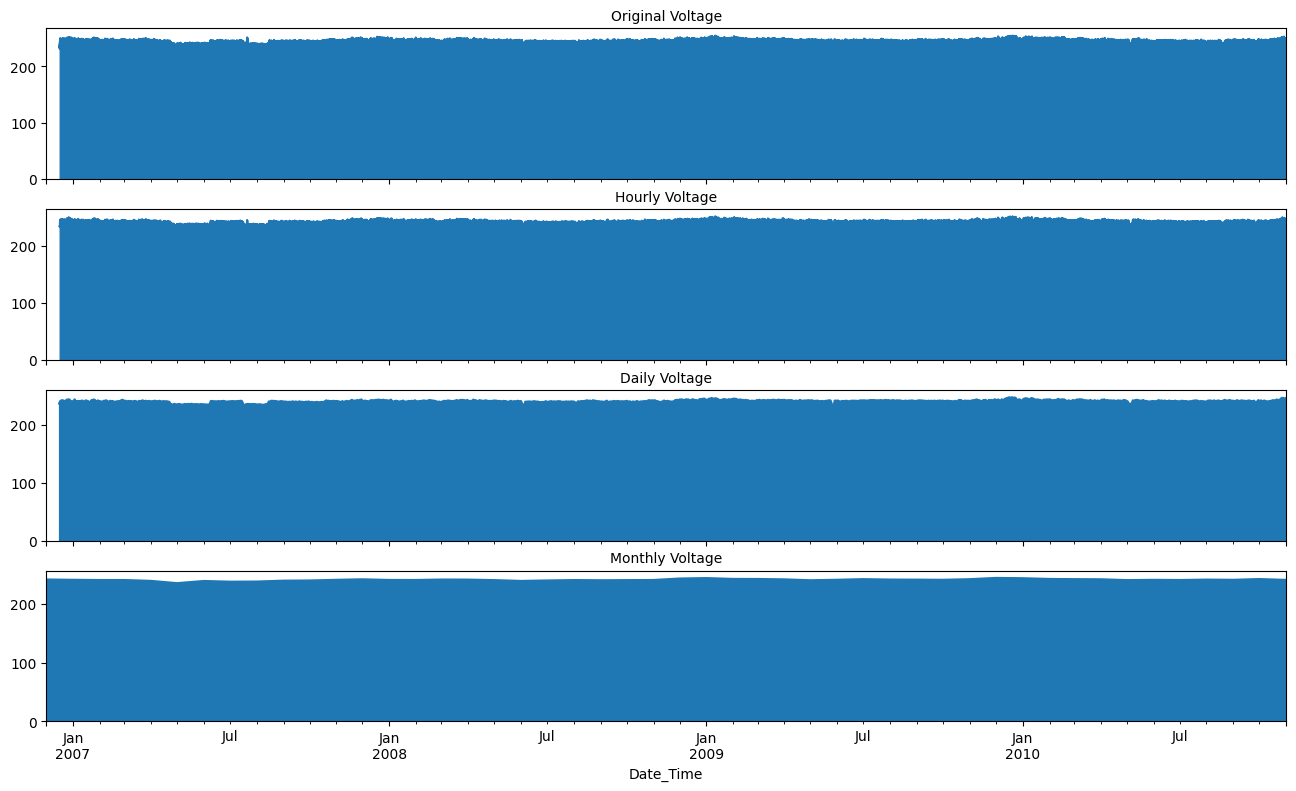

In [76]:
fig , axs = plt.subplots(nrows = 4, figsize = (16, 9), sharex = True)
time_df['Voltage'].plot(ax = axs[0], kind='area')
axs[0].set_title('Original Voltage', fontsize = 10)
hourly_df['Voltage'].plot(ax = axs[1], kind='area')
axs[1].set_title('Hourly Voltage', fontsize = 10)
daily_df['Voltage'].plot(ax = axs[2], kind='area')
axs[2].set_title('Daily Voltage', fontsize = 10)
monthly_df['Voltage'].plot(ax = axs[3], kind='area')
axs[3].set_title('Monthly Voltage', fontsize = 10)
plt.show()

Looking at the plot above, we see that in the grand scheme of things then voltage is pretty much constant. If we zoom in then it does fluctuate a little as shown in the 'Original by minute data' plot, however it does constantly hover around 240 volts.

Next, as we are interested in Global_Active_power we will check the correlation between global_active_power and Voltage.

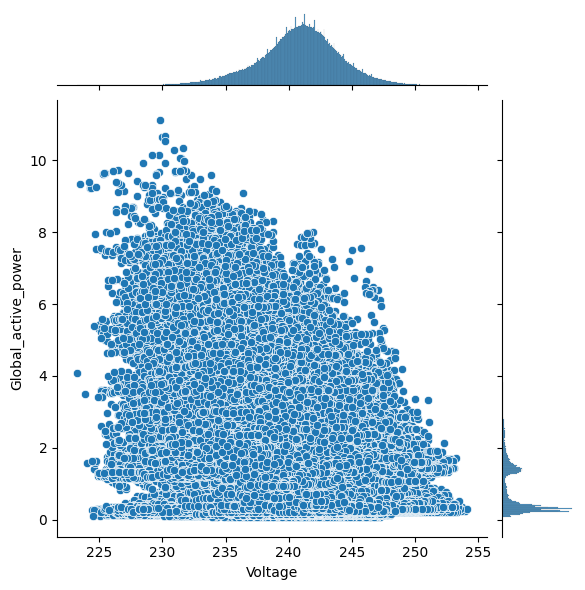

In [77]:
sns.jointplot(y="Global_active_power", x="Voltage", data=time_df)

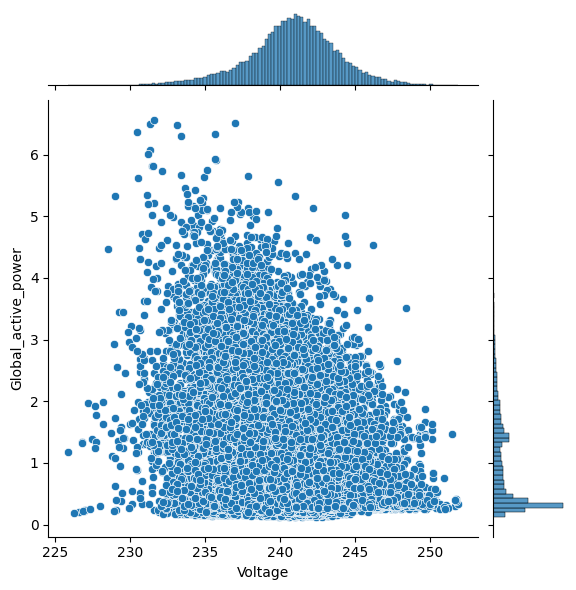

In [78]:
sns.jointplot(y="Global_active_power", x="Voltage", data=hourly_df)

From above jointplots we see that the pattern of the observations are spread out and there is no noticeable patterns and looks random. This means that the correlation between Voltage and global_active_power is low. Also we see from the distributions that the vast majority of the observations lies in the area of global_active_power = 0.1 / 0.2, and voltage = 241 / 242

alternatively we can use pct_change() method to look for cyclic patterns or seasonal trends in the jointplot. It will often appear as distinct clusters or groups of data points that repeat over time, indicating a repeating pattern in the data. These clusters may have a specific shape or orientation, such as a circular pattern, indicating a cyclical trend in the data.

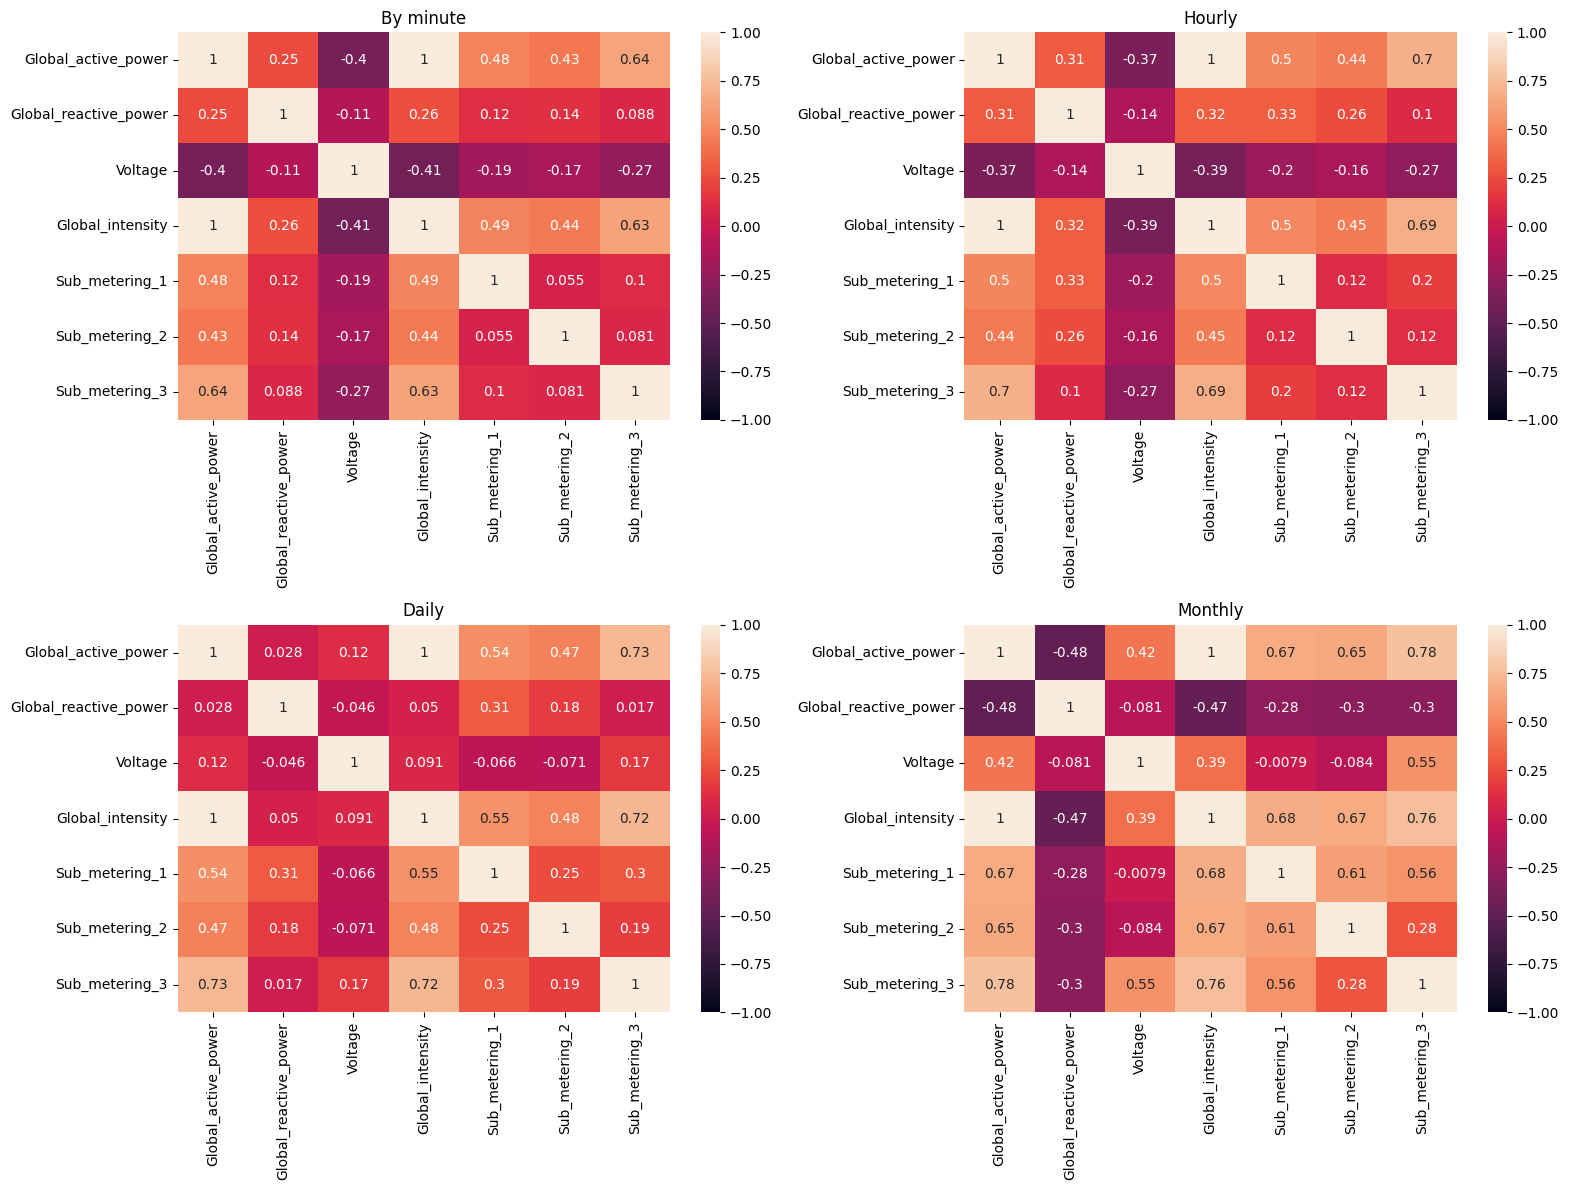

In [79]:
fig, axs = plt.subplots(2, 2, figsize=(16,12))

sns.heatmap(time_df.corr(), vmin=-1, vmax=1, annot=True, ax=axs[0,0])
axs[0,0].set_title('By minute')
sns.heatmap(hourly_df.corr(), vmin=-1, vmax=1, annot=True, ax=axs[0,1])
axs[0,1].set_title('Hourly')
sns.heatmap(daily_df.corr(), vmin=-1, vmax=1, annot=True, ax=axs[1,0])
axs[1,0].set_title('Daily')
sns.heatmap(monthly_df.corr(), vmin=-1, vmax=1, annot=True, ax=axs[1,1])
axs[1,1].set_title('Monthly')
fig.tight_layout()

From the above correlation plots we can see that the correlations between 'by minute' and 'hourly' remains the same. While the comparing the 'by minute' with the 'Daily' and 'Monthly' we se that the correlation among the features has changed. 

NOTE: Resampling techniques can change the correlation among features by introducing or removing data points. This can have an affect on the performance of the machine learning models and the feature engineering process. For example, if a feature is highly correlated with the target variable in the original data, but this correlation is weakened or lost after resampling, it may not be as useful for prediction. Alternatively, a feature that was not strongly correlated with the target variable in the original data may become more important after resampling due to changes in correlations. Thus affecting the selection of features for the model. 

In [80]:
import statsmodels.api as sm

In [81]:
decomposition = sm.tsa.seasonal_decompose(hourly_df['Voltage'], model='additive')

In [82]:
decomposition.trend

Date_Time
2006-12-16 17:00:00   NaN
2006-12-16 18:00:00   NaN
2006-12-16 19:00:00   NaN
2006-12-16 20:00:00   NaN
2006-12-16 21:00:00   NaN
                       ..
2010-11-26 17:00:00   NaN
2010-11-26 18:00:00   NaN
2010-11-26 19:00:00   NaN
2010-11-26 20:00:00   NaN
2010-11-26 21:00:00   NaN
Freq: H, Name: trend, Length: 34589, dtype: float64

In [83]:
decomposition.seasonal

Date_Time
2006-12-16 17:00:00   -0.538555
2006-12-16 18:00:00   -1.520752
2006-12-16 19:00:00   -2.132035
2006-12-16 20:00:00   -1.730725
2006-12-16 21:00:00   -1.697794
                         ...   
2010-11-26 17:00:00   -0.538555
2010-11-26 18:00:00   -1.520752
2010-11-26 19:00:00   -2.132035
2010-11-26 20:00:00   -1.730725
2010-11-26 21:00:00   -1.697794
Freq: H, Name: seasonal, Length: 34589, dtype: float64

In [84]:
decomposition.resid

Date_Time
2006-12-16 17:00:00   NaN
2006-12-16 18:00:00   NaN
2006-12-16 19:00:00   NaN
2006-12-16 20:00:00   NaN
2006-12-16 21:00:00   NaN
                       ..
2010-11-26 17:00:00   NaN
2010-11-26 18:00:00   NaN
2010-11-26 19:00:00   NaN
2010-11-26 20:00:00   NaN
2010-11-26 21:00:00   NaN
Freq: H, Name: resid, Length: 34589, dtype: float64

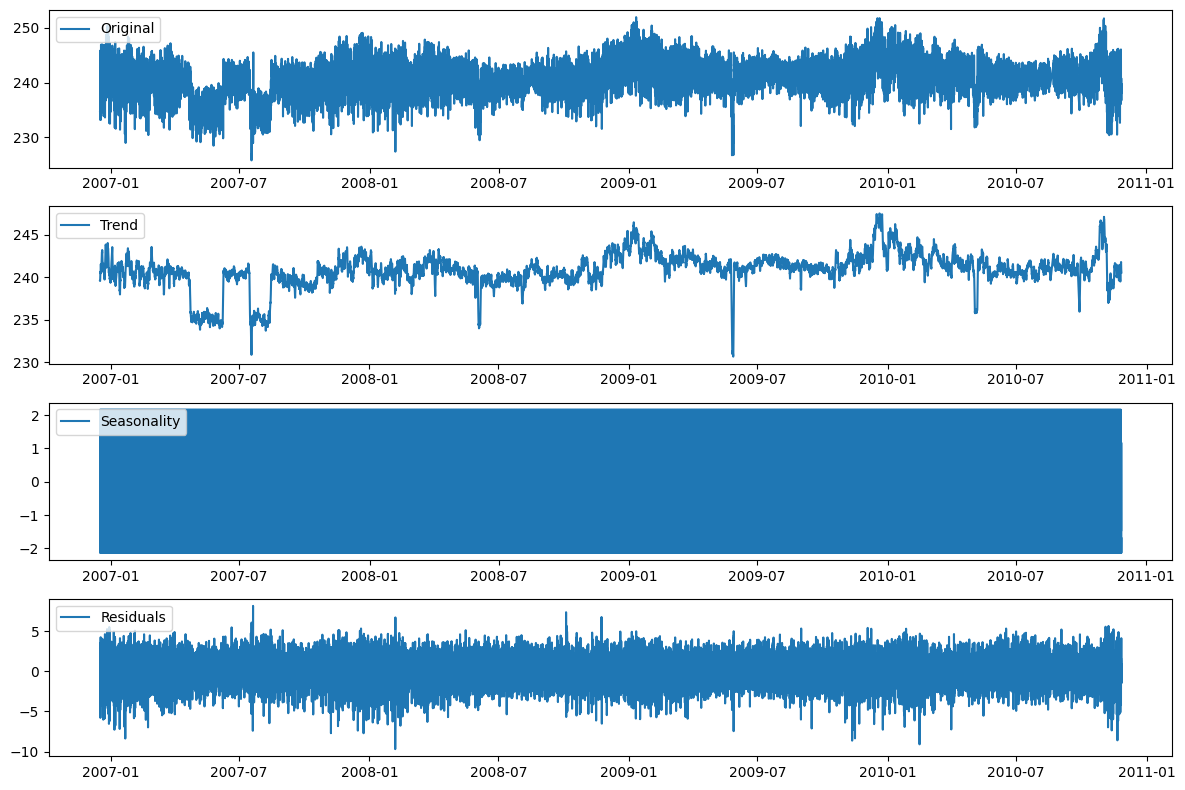

In [85]:
# Plot the seasonal decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8))
axes[0].plot(hourly_df['Voltage'], label='Original')
axes[0].legend(loc='upper left')
axes[1].plot(decomposition.trend, label='Trend')
axes[1].legend(loc='upper left')
axes[2].plot(decomposition.seasonal,label='Seasonality')
axes[2].legend(loc='upper left')
axes[3].plot(decomposition.resid, label='Residuals')
axes[3].legend(loc='upper left')
plt.tight_layout()
plt.show()

The trend component represents the long-term behavior or direction of the data

the seasonality component captures patterns that occur with a fixed frequency within the data

The random noise/resid component represents the unpredictable or irregular fluctuations in the data that cannot be attributed to the trend or seasonality

In [7]:
hourly_df = hourly_df.drop(labels='Voltage', axis = 1)

In [87]:
decomp = sm.tsa.seasonal_decompose(hourly_df['Global_active_power'], model='additive')

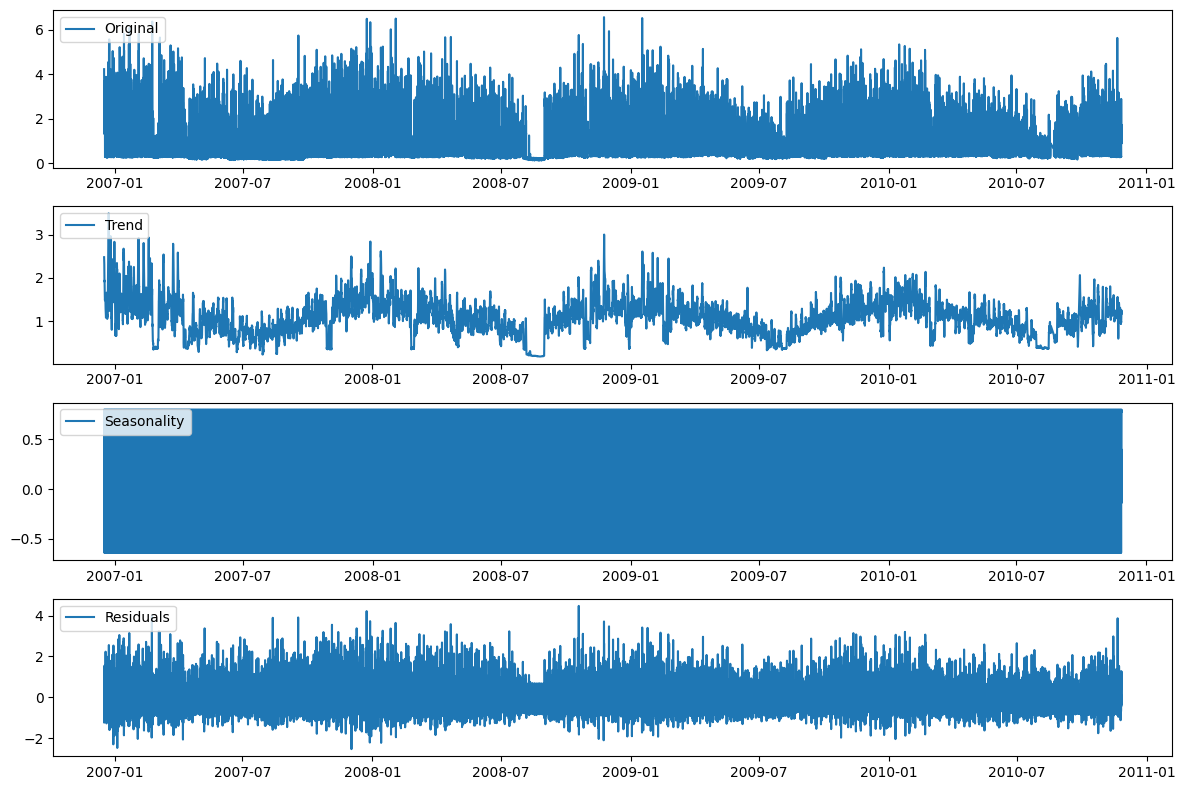

In [88]:
# Plot the seasonal decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8))
axes[0].plot(hourly_df['Global_active_power'], label='Original')
axes[0].legend(loc='upper left')
axes[1].plot(decomp.trend, label='Trend')
axes[1].legend(loc='upper left')
axes[2].plot(decomp.seasonal,label='Seasonality')
axes[2].legend(loc='upper left')
axes[3].plot(decomp.resid, label='Residuals')
axes[3].legend(loc='upper left')
plt.tight_layout()
plt.show()

## Machine learning modelling

We will explore the models LSTM, ARIMA, and Prophet, and maybe XGBoost

### ARIMA

ARIMA stands for Autoregressive Integrated Moving Average. It is a time series forecasting model that combines autoregression (AR), differencing (I), and moving average (MA) methods. **The model explains a given time series based on its own past values**, this means that it is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

- Autoregression (AR): A model that uses the relationship between an observation and a number of lagged observations to predict future values.
- Differencing (I): A method of transforming a time series to a stationary series by taking the difference between consecutive observations.
- Moving Average (MA): A model that uses the relationship between the error term of a prediction and the errors from the previous predictions to predict future values.

An ARIMA model is defined by three parameters: p, d, and q, which correspond to the order of the autoregressive, differencing, and moving average components, respectively.

- p: The number of lagged observations included in the autoregressive component.
- d: The degree of differencing needed to make the time series stationary.
- q: The number of lagged forecast errors included in the moving average component.

An ARIMA model can be used for both forecasting and modeling. It is a popular model because it can handle a wide range of time series patterns and is relatively easy to interpret.

The model is well suited for time-series that have stationary data, which typically have a constant mean and variance and do not show any trends, cycles, or seasonality. Some of the limitations are: that , it is sesitive to outliers, it requires that data can be made stationary by differencing, and the ARIMA model can be computationally expensive, especially for large datasets. Making the ARIMA model not the best suited for our data, but is worth looking into.

The assumptions for the ARIMA model:
- Stationarity: The series is stationary, meaning that its mean, variance, and autocorrelation structure do not change over time.
- Linearity: The relationships between the variables in the model are linear.
- No seasonality: The series does not exhibit seasonality or the seasonality has already been removed.
- No outliers: The series does not contain any extreme or unusual observations that could skew the results.
- Normality: The errors (residuals) are normally distributed with mean zero and constant variance.
- No autocorrelation: The errors are uncorrelated with each other.
- Adequate sample size: The sample size should be large enough to ensure that the results are statistically meaningful.

NOTE: it could be beneficial to use the ARIMA model as a benchmark to compare with other models. Also by hour data probably is a bit too complex.

In [89]:
from statsmodels.tsa.stattools import adfuller

First we need to determine if the data is stationary or not. From above time-series decomposition we can see that there is no trend nor seasonality, thus making the data stationary. To supplement our claim we can do a Augmented Dickey-Fuller test, which is a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

The null hypothesis of the ADF-test is that the time series can be represented by a unit root, that it is not stationary.
- Null hypothesis ($H_0$): If failed to reject, it suggests the time series is non-stationary. It has some time dependent structure.
- Alternative hypotheses ($H_1$): The null hypothesis is rejected, it suggests the time series is stationary. It does not have time-dependent structure.

To interpret the ADF test we use the p-value from the test. If the p-value is below a significance level (such as 0.05), then we reject the null hypothesis and conclude that the time series is stationary. This means that there is no trend or seasonality in the data, and the statistical properties of the series remain constant over time.

In [90]:
for feat in hourly_df.columns:
    res_fuller = adfuller(hourly_df[feat], regression='ct')
    print(f'ADF test for {feat}:')
    print(f'Test statistic: {res_fuller[0]}')
    print(f'p-value: {res_fuller[1]}')

ADF test for Global_active_power:
Test statistic: -14.44624472722052
p-value: 4.760493923182054e-22
ADF test for Global_reactive_power:
Test statistic: -14.89349767104955
p-value: 2.482586683675214e-22
ADF test for Global_intensity:
Test statistic: -14.824443250668365
p-value: 2.7114842949809406e-22
ADF test for Sub_metering_1:
Test statistic: -23.157676554652802
p-value: 0.0
ADF test for Sub_metering_2:
Test statistic: -31.931235353716872
p-value: 0.0
ADF test for Sub_metering_3:
Test statistic: -14.649251730661948
p-value: 3.4608144199111487e-22


So we see that the p-value is basically 0 and can reject the null hypothesis for all features and infer that the data is stationary. **Meaning that d=0 for ARIMA**. We are only going to use the ARIMA model for 'Global_active_power' and thus it is only 'Global_active_power' that have interest.

However we need to keep in mind that cannot be 100% trusted

In [91]:
from statsmodels.tsa.stattools import kpss

In [92]:
kpss(hourly_df['Global_active_power'], regression='ct')

C:\Users\Phil_\AppData\Local\Temp\ipykernel_462352\1609127203.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(hourly_df['Global_active_power'], regression='ct')


(0.5547118504848638,
 0.01,
 65,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [93]:
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, regression='ct', **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(hourly_df['Global_active_power'])

KPSS Statistic: 0.5547118504848638
p-value: 0.01
num lags: 65
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is not stationary


C:\Users\Phil_\AppData\Local\Temp\ipykernel_462352\3987003555.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, regression='ct', **kw)


So from the ADF test results, we can reject the null hypothesis that the time series data has a unit root and assume that the time series is stationary. The small p-value (4.76e-22) indicates strong evidence against the null hypothesis, and the large negative test statistic (-14.45) indicates that the time series is stationary.

On the other hand, the KPSS test fails to reject the null hypothesis of trend stationarity at the 1% significance level, indicating that the data may have a trend that is not random. However, we should also note that the p-value of 0.01 is close to the critical value of 0.05, suggesting that the trend stationarity assumption may not hold.

Checking the linearity assumption.

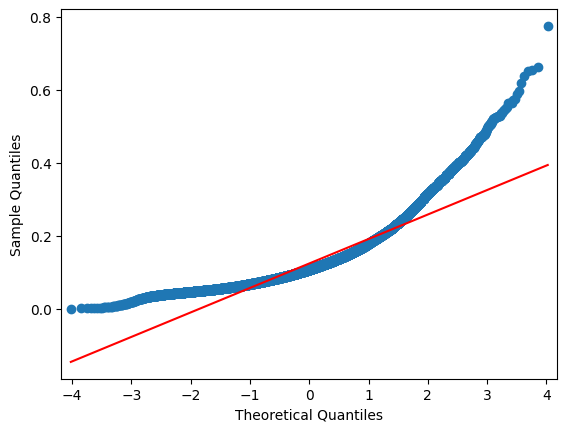

In [94]:
sm.qqplot(hourly_df['Global_reactive_power'], line='s')
plt.show()

Linearity is violated. Lets try differencing

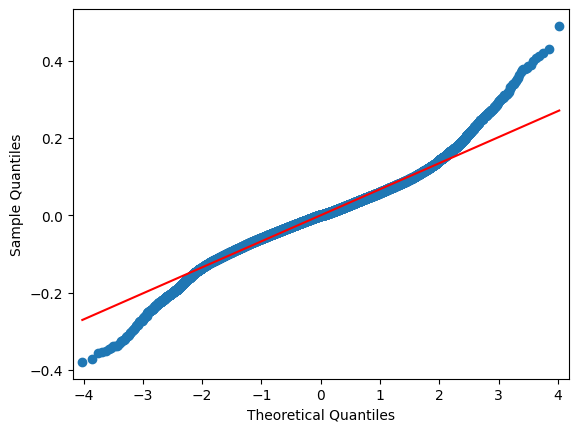

In [95]:
sm.qqplot((hourly_df['Global_reactive_power'].diff().dropna()), line='s')
plt.show()

Better but linearity still violated.

Plotting ACF and PACF:

In [96]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

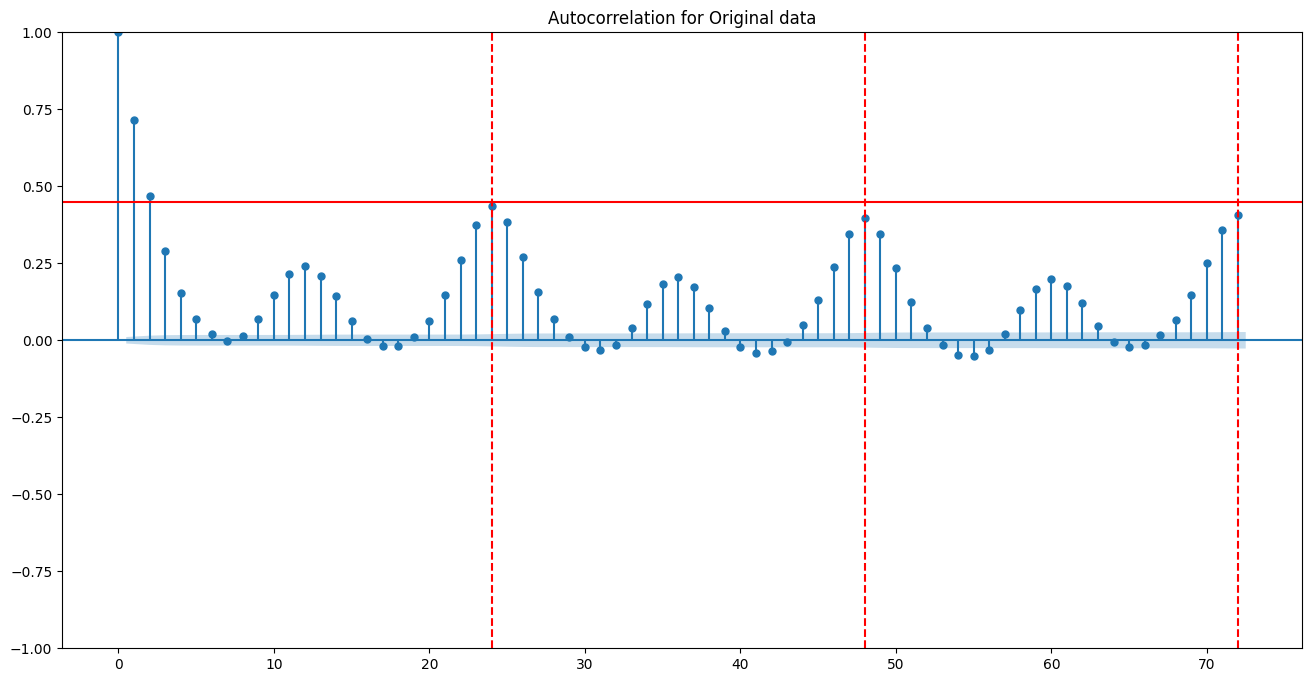

In [97]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
plot_acf(hourly_df['Global_active_power'], lags = 72, ax=axs, title = 'Autocorrelation for Original data')
axs.axhline(y=0.45, color='r')
axs.axvline(x=24, color='r', linestyle = '--')
axs.axvline(x=48, color='r', linestyle = '--')
axs.axvline(x=72, color='r', linestyle = '--')
plt.show()

The highest lags are 1, 2 24, 48, 72, ...

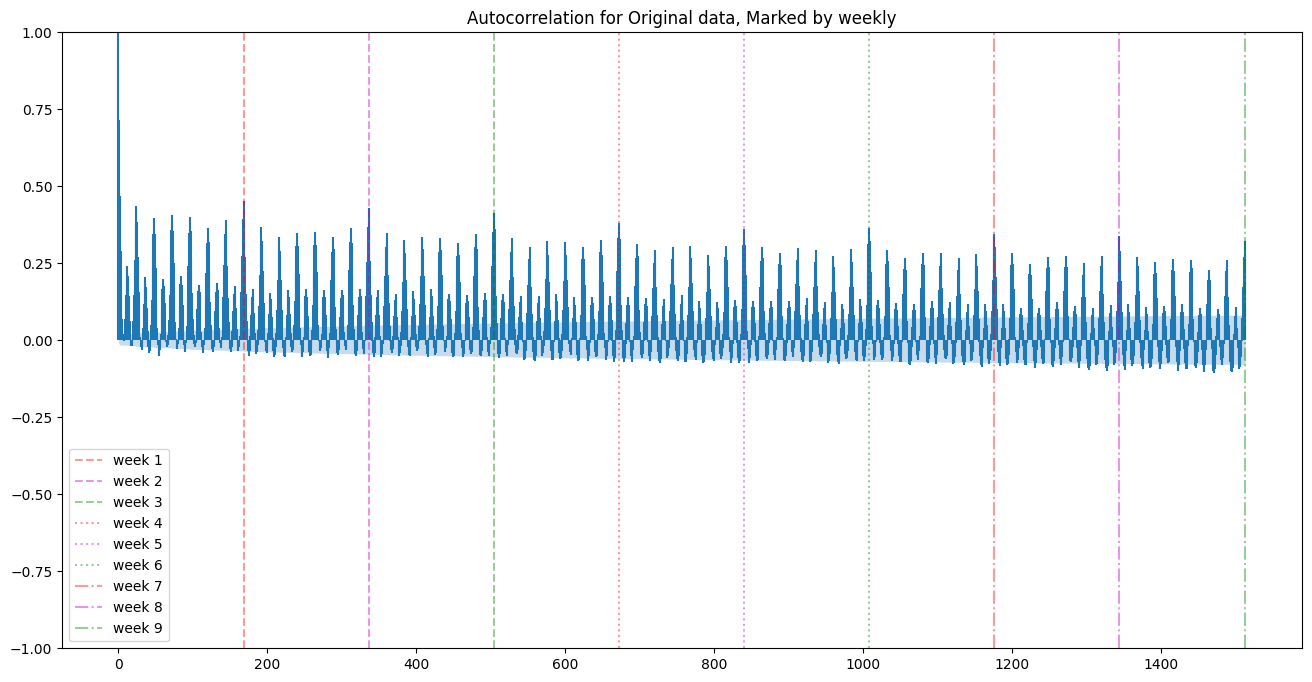

In [98]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
plot_acf(hourly_df['Global_active_power'], lags = 1513, ax=axs, title = 'Autocorrelation for Original data, Marked by weekly', color='none')
axs.axvline(x=168, color='r', linestyle = '--', label = 'week 1', alpha = 0.4)
axs.axvline(x=336, color='m', linestyle = '--', label = 'week 2', alpha = 0.4)
axs.axvline(x=504, color='g', linestyle = '--', label = 'week 3', alpha = 0.4)
axs.axvline(x=672, color='r', linestyle = ':',  label = 'week 4', alpha = 0.4)
axs.axvline(x=840, color='m', linestyle = ':', label = 'week 5', alpha = 0.4)
axs.axvline(x=1008, color='g', linestyle = ':', label = 'week 6', alpha = 0.4)
axs.axvline(x=1176, color='r', linestyle = '-.', label = 'week 7', alpha = 0.4)
axs.axvline(x=1344, color='m', linestyle = '-.', label = 'week 8', alpha = 0.4)
axs.axvline(x=1512, color='g', linestyle = '-.', label = 'week 9', alpha = 0.4)
plt.legend(loc = 'lower left')
plt.show()

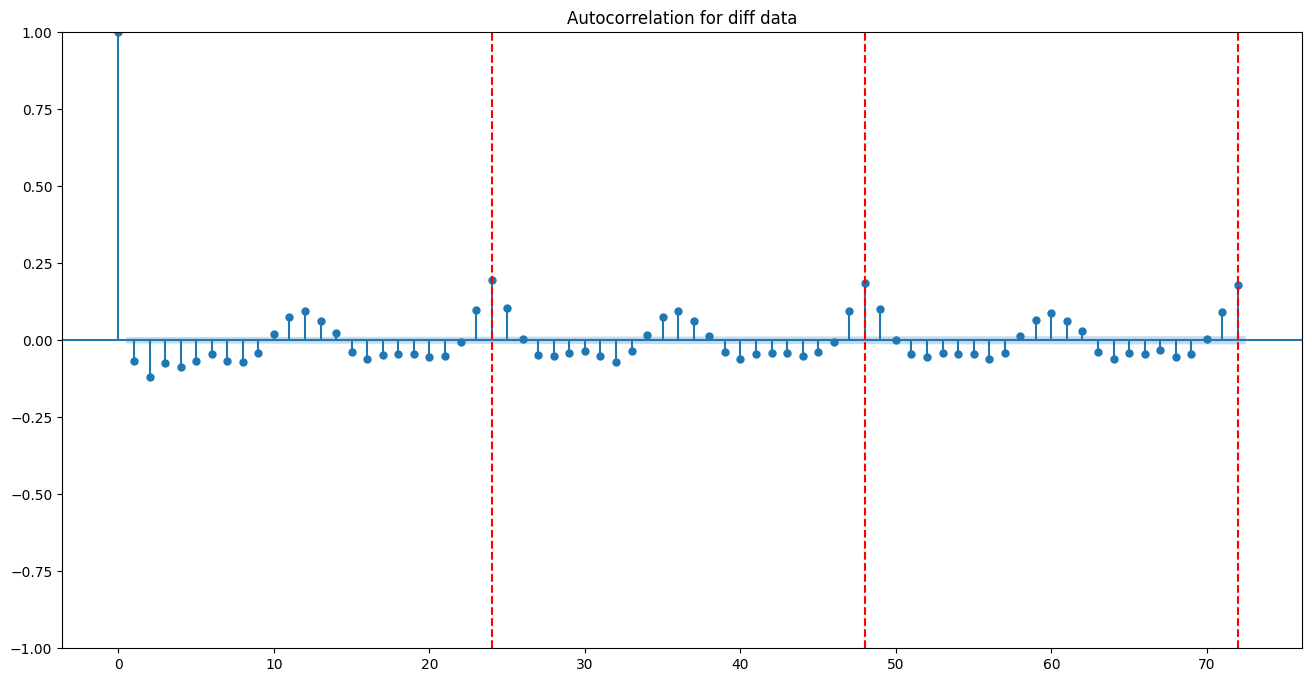

In [99]:

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
plot_acf(hourly_df['Global_active_power'].diff().dropna(), lags = 72, ax=axs, title = 'Autocorrelation for diff data')
axs.axvline(x=24, color='r', linestyle = '--')
axs.axvline(x=48, color='r', linestyle = '--')
axs.axvline(x=72, color='r', linestyle = '--')
plt.show()

Above ACF plot indicates that there is a seasonal component in the data. There is a significant lags at several places, every 24(day) lags or every 168(week) lags.

The small light blue band is the confidence interval and indicates whether the correlation is statistically significant, meaning that the correlation is very likely not to be random. All bars that cross the confidence interval are correlations that can be used for modeling (Theoretically).

We see that the ACF plot tails off for both original and differenced data, so differencing does not help here. This makes us uncertain of what MA term to use. We should consider the auto-arima function. However the largest lags occur at 1, 2, 24, 48, 72, 96, etc

NOTE: In the ACF plot, the y-axis expresses the correlation coefficient whereas the x-axis mentions the number of lags. Assume that, $y(t-1)$, $y(t)$, $y(t-1)$, ..., $y(t-n)$ are values of a time series at time $t, t-1, \dots, t-n$, then the lag-1 value is the correlation coefficient between $y(t)$ and $y(t-1)$, lag-2 is the correlation coefficient between $y(t)$ and $y(t-2)$ and so on.

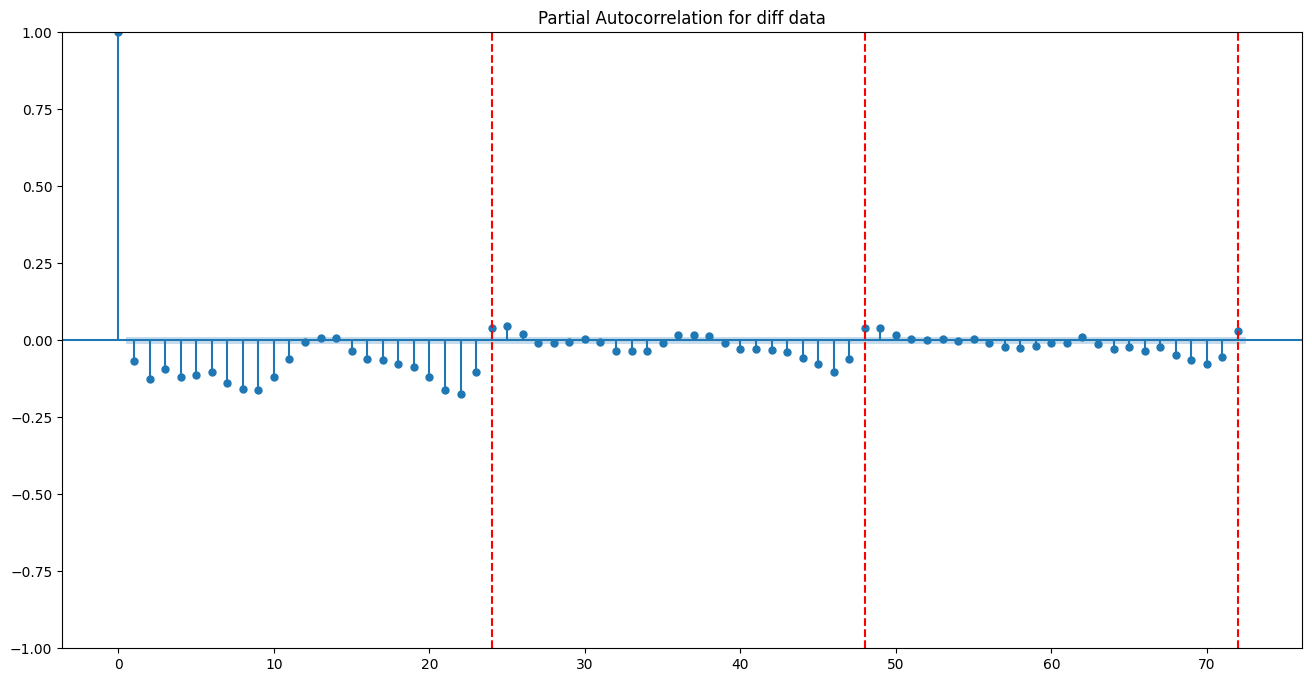

In [100]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
plot_pacf(hourly_df['Global_active_power'].diff().dropna(), lags = 72, ax=axs, title = 'Partial Autocorrelation for diff data')
axs.axvline(x=24, color='r', linestyle = '--')
axs.axvline(x=48, color='r', linestyle = '--')
axs.axvline(x=72, color='r', linestyle = '--')
plt.show()

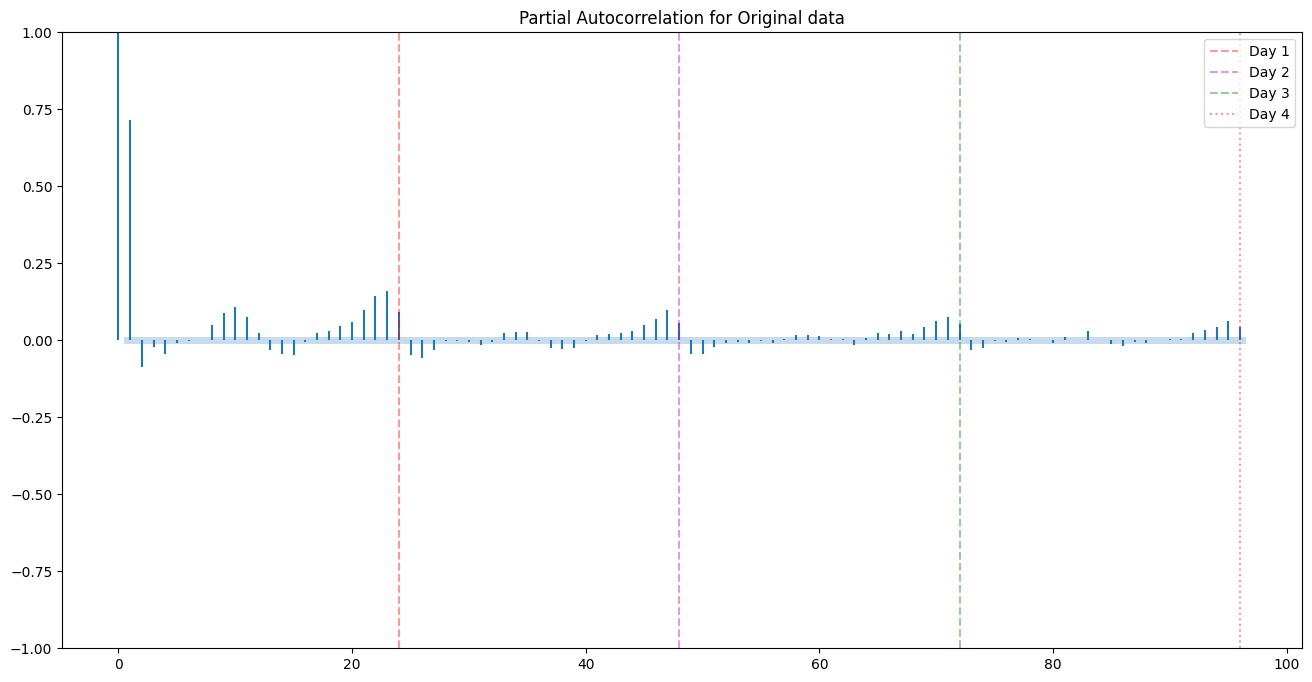

In [101]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
plot_pacf(hourly_df['Global_active_power'], lags = 96, ax=axs, title = 'Partial Autocorrelation for Original data', color = 'none')
axs.axvline(x=24, color='r', linestyle = '--', label = 'Day 1', alpha = 0.4)
axs.axvline(x=48, color='m', linestyle = '--', label = 'Day 2', alpha = 0.4)
axs.axvline(x=72, color='g', linestyle = '--', label = 'Day 3', alpha = 0.4)
axs.axvline(x=96, color='r', linestyle = ':',  label = 'Day 4', alpha = 0.4)
plt.legend(loc='upper right')
plt.show()

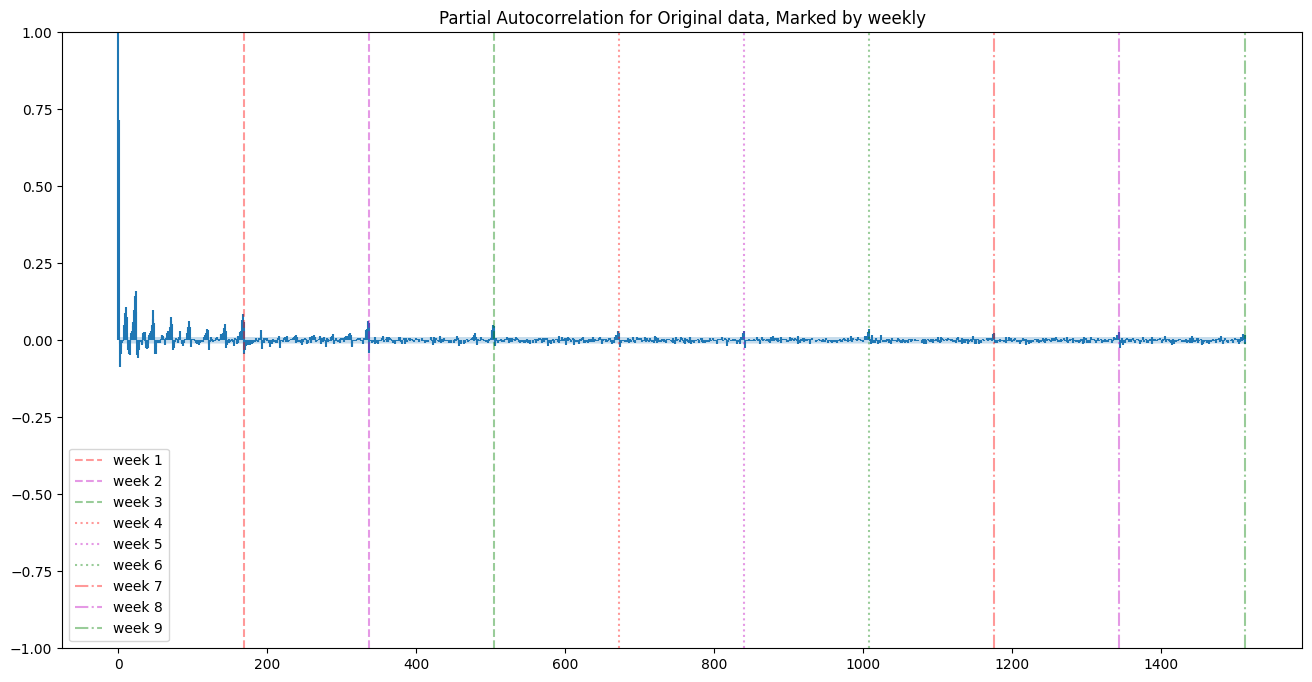

In [102]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
plot_pacf(hourly_df['Global_active_power'], lags = 1513, ax=axs, title = 'Partial Autocorrelation for Original data, Marked by weekly', color = 'none')
axs.axvline(x=168, color='r', linestyle = '--', label = 'week 1', alpha = 0.4)
axs.axvline(x=336, color='m', linestyle = '--', label = 'week 2', alpha = 0.4)
axs.axvline(x=504, color='g', linestyle = '--', label = 'week 3', alpha = 0.4)
axs.axvline(x=672, color='r', linestyle = ':',  label = 'week 4', alpha = 0.4)
axs.axvline(x=840, color='m', linestyle = ':', label = 'week 5', alpha = 0.4)
axs.axvline(x=1008, color='g', linestyle = ':', label = 'week 6', alpha = 0.4)
axs.axvline(x=1176, color='r', linestyle = '-.', label = 'week 7', alpha = 0.4)
axs.axvline(x=1344, color='m', linestyle = '-.', label = 'week 8', alpha = 0.4)
axs.axvline(x=1512, color='g', linestyle = '-.', label = 'week 9', alpha = 0.4)
plt.legend(loc = 'lower left')
plt.show()

- The above PACF plots diff data looks over differenced, this indicates that diff did not help. 
- It seems that there is evidence to support the 24 lag cycle, as every 24 spike are above the confidence band in the first week.
- The evidence for weekly cycle seems stronger, as every 168 (week) spike seem to be sticking out more than every 24 spike (days).
- looks like the PACF plot is gradually falling every 168 spikes (by weekly). Supports the need for a seasonal component with a cycle of 168.
- The highest spike is at 1 


Partial autocorrelation can be imagined as the correlation between the series and its lags, after excluding the contributions from the intermediate lags. In another way to see it is that the PACF can be explained using a linear regression where we predict $y(t)$ from $y(t-1)$, $y(t-2)$, ... , until $y(t-k)$  

The PACF plot can be used to take the order of AR terms to be equal to the lags that can cross a significance limit. From the 'Partial Autocorrelation for Original data' plot we see that the first and second lag definitely sticks out more significantly, the third, fourth and fifth could also be significant as it sticks out from the blue area, but it does not really stick out more than the subsequent lags.

Now we have a series of ARIMA models to check
- d (I) = 0
- p (AR) = 1
- q (MA) = 0, ..., 5

#### Seasonal ARIMA

Seasonal ARIMA (SARIMA) is an extension of the ARIMA model that incorporates seasonality in time series data. It is specifically designed to capture and model seasonal patterns and trends in the data. SARIMA models are useful when the time series exhibits periodic patterns that repeat at fixed intervals, such as monthly, quarterly, or yearly.

The SARIMA model is denoted as SARIMA(p, d, q)(P, D, Q, s), where:
- p: Autoregressive (AR) order, representing the number of lag observations included in the model.
- d: Differencing order, indicating the number of times differencing is applied to make the time series stationary.
- q: Moving Average (MA) order, representing the size of the moving average window.
- P: Seasonal AR order, similar to AR but for the seasonal component.
- D: Seasonal differencing order, similar to d but for the seasonal component.
- Q: Seasonal MA order, similar to MA but for the seasonal component.
- s: Seasonal period, representing the number of time steps in each season.

SARIMA models are effective in capturing and forecasting seasonal patterns, making them suitable for time series data that exhibit regular seasonal fluctuations or dependencies. By incorporating both non-seasonal and seasonal components, SARIMA models can provide more accurate predictions and better capture the underlying dynamics of the time series.

In [103]:
from statsmodels.tsa.stattools import pacf, acf

In [104]:

order_pacf = pacf(hourly_df['Global_active_power'], nlags = 500)


In [105]:
order_pacf

array([ 1.00000000e+00,  7.14638370e-01, -8.78887118e-02, -2.28293014e-02,
       -4.34953954e-02, -8.17486142e-03, -1.77947165e-03,  6.79725733e-04,
        5.09665847e-02,  8.86564979e-02,  1.07505948e-01,  7.58989137e-02,
        2.28099023e-02, -3.00595290e-02, -4.50877984e-02, -4.63059628e-02,
       -5.84207979e-03,  2.31246945e-02,  3.04288920e-02,  4.48846813e-02,
        5.95710473e-02,  9.78011336e-02,  1.43987689e-01,  1.60877174e-01,
        9.23150320e-02, -4.73607810e-02, -5.68899274e-02, -3.11132259e-02,
       -3.90860573e-03, -3.29146696e-03, -5.92749016e-03, -1.45892176e-02,
       -4.29574362e-03,  2.45764971e-02,  2.64144595e-02,  2.60157918e-02,
       -1.63698294e-03, -2.51178831e-02, -2.77009296e-02, -2.38571349e-02,
       -1.28020411e-03,  1.87406798e-02,  1.91293698e-02,  2.37304146e-02,
        2.94168959e-02,  4.95656433e-02,  7.05734354e-02,  9.83702291e-02,
        5.67346099e-02, -4.52059173e-02, -4.51206915e-02, -2.27559807e-02,
       -9.72090959e-03, -

In [106]:
sorted_pacf = sorted(enumerate(order_pacf), key=lambda x: abs(x[1]), reverse=True)

# Extract the sorted values and their original placements
sorted_values = [x[1] for x in sorted_pacf]
original_placements = [x[0] for x in sorted_pacf]

# Print the sorted values and their original placements
print("Sorted Values:", [round(num, 4) for num in sorted_values])
print("Original Placements:", original_placements)

Sorted Values: [1.0, 0.7146, 0.1609, 0.144, 0.1075, 0.0984, 0.0978, 0.0923, 0.0887, -0.0879, 0.0863, 0.0764, 0.0759, 0.0706, 0.0658, 0.0637, 0.0632, 0.0614, 0.0613, 0.0596, -0.0569, 0.0567, 0.0559, 0.0519, 0.0517, 0.051, 0.0496, -0.0474, -0.0463, -0.0452, -0.0451, -0.0451, 0.0449, -0.0447, -0.0435, 0.0435, 0.0433, 0.0432, -0.0418, 0.0389, 0.0386, 0.0365, 0.0352, 0.0346, 0.0333, 0.0322, -0.0311, -0.0311, -0.0308, -0.0307, 0.0305, 0.0304, -0.0301, 0.0299, 0.0299, 0.0294, 0.0293, -0.0287, -0.0277, -0.0265, 0.0264, 0.026, 0.0255, -0.0254, 0.0254, 0.0253, 0.0252, -0.0251, 0.0248, 0.0246, 0.0246, -0.0244, -0.0239, 0.0237, 0.0231, -0.0228, 0.0228, 0.0228, -0.0228, 0.0226, -0.0225, 0.0221, -0.0217, 0.0212, -0.0208, -0.0206, 0.0206, 0.0191, 0.0191, 0.019, -0.0189, 0.0188, -0.0188, 0.0187, 0.0187, 0.0183, -0.0181, 0.0181, -0.0178, -0.0176, 0.0173, -0.0171, 0.0169, -0.0168, 0.0167, 0.0164, 0.0163, -0.0159, -0.0158, 0.0158, -0.0156, 0.0155, 0.0153, 0.0153, 0.0153, -0.015, -0.015, 0.0149, -0.0149, 

In [107]:
combined_list = [(a, b) for a, b in zip([round(num, 4) for num in sorted_values], original_placements)]
combined_list

[(1.0, 0),
 (0.7146, 1),
 (0.1609, 23),
 (0.144, 22),
 (0.1075, 10),
 (0.0984, 47),
 (0.0978, 21),
 (0.0923, 24),
 (0.0887, 9),
 (-0.0879, 2),
 (0.0863, 167),
 (0.0764, 71),
 (0.0759, 11),
 (0.0706, 46),
 (0.0658, 166),
 (0.0637, 95),
 (0.0632, 335),
 (0.0614, 168),
 (0.0613, 70),
 (0.0596, 20),
 (-0.0569, 26),
 (0.0567, 48),
 (0.0559, 336),
 (0.0519, 143),
 (0.0517, 72),
 (0.051, 8),
 (0.0496, 45),
 (-0.0474, 25),
 (-0.0463, 15),
 (-0.0452, 49),
 (-0.0451, 50),
 (-0.0451, 14),
 (0.0449, 19),
 (-0.0447, 169),
 (-0.0435, 4),
 (0.0435, 69),
 (0.0433, 96),
 (0.0432, 94),
 (-0.0418, 337),
 (0.0389, 142),
 (0.0386, 334),
 (0.0365, 119),
 (0.0352, 192),
 (0.0346, 93),
 (0.0333, 333),
 (0.0322, 120),
 (-0.0311, 170),
 (-0.0311, 27),
 (-0.0308, 121),
 (-0.0307, 73),
 (0.0305, 83),
 (0.0304, 18),
 (-0.0301, 13),
 (0.0299, 144),
 (0.0299, 67),
 (0.0294, 44),
 (0.0293, 165),
 (-0.0287, 193),
 (-0.0277, 38),
 (-0.0265, 145),
 (0.0264, 34),
 (0.026, 35),
 (0.0255, 163),
 (-0.0254, 217),
 (0.0254, 4

<BarContainer object of 300 artists>

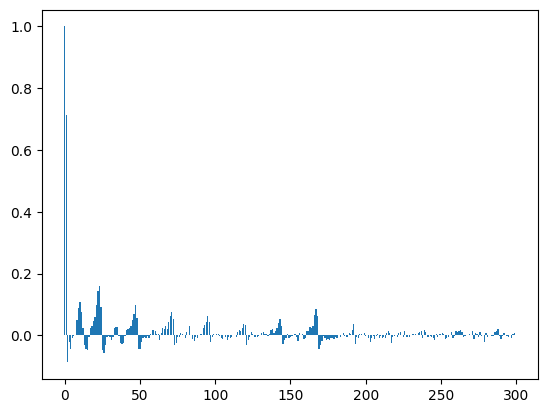

In [108]:
plt.bar(range(0,300), order_pacf[0:300])

From the above plots we had 
- d (I) = 0
- p (AR) = 1
- q (MA) = 1, 2, 24

The highest non seasonal lag occured at 1. To determine the seasonal AR order (P) we notice that there are a few significant lags: 

- P = {1, 23, 22, 10, 47}

Next, to determine the seasonal MA term.

In [109]:
observations_per_season = 168

df = pd.DataFrame(hourly_df['Global_active_power'].copy())  # Convert the Series to a DataFrame

# Create a new column for storing the seasonal differences
df['seasonal_diff'] = 0

# Iterate through the dataset and compute seasonal differences
for i in range(observations_per_season, len(df)):
    prev_season_index = i - observations_per_season
    df.loc[df.index[i], 'seasonal_diff'] = df.loc[df.index[i], 'Global_active_power'] - df.loc[df.index[prev_season_index], 'Global_active_power']

# Drop the first (observations_per_season) rows since they will have NaN values in the seasonal difference column
df = df.iloc[observations_per_season:]

# Drop NaN values from the 'seasonal_diff' column
df['seasonal_diff'] = df['seasonal_diff'].dropna()

In [110]:
df

Global_active_power  seasonal_diff
Date_Time                                              
2006-12-23 17:00:00             5.452533       1.229644
2006-12-23 18:00:00             3.879400       0.247200
2006-12-23 19:00:00             4.117833       0.717600
2006-12-23 20:00:00             4.181400       0.912833
2006-12-23 21:00:00             3.288433       0.231967
...                                  ...            ...
2010-11-26 17:00:00             1.725900       0.901633
2010-11-26 18:00:00             1.573467       0.555000
2010-11-26 19:00:00             1.659333       0.409567
2010-11-26 20:00:00             1.163700      -0.501567
2010-11-26 21:00:00             0.934667      -0.843700

[34421 rows x 2 columns]

In [111]:
df1 = pd.DataFrame(hourly_df['Global_active_power'].copy()) 

# Compute seasonal differences using the diff() function
df1['seasonal_diff'] = df1['Global_active_power'].diff(periods=168)

# Drop the first (observations_per_season) rows since they will have NaN values in the seasonal difference column
df1 = df1.iloc[observations_per_season:]

# Drop NaN values from the 'seasonal_diff' column
df1['seasonal_diff'] = df1['seasonal_diff'].dropna()

In [112]:
df1

Global_active_power  seasonal_diff
Date_Time                                              
2006-12-23 17:00:00             5.452533       1.229644
2006-12-23 18:00:00             3.879400       0.247200
2006-12-23 19:00:00             4.117833       0.717600
2006-12-23 20:00:00             4.181400       0.912833
2006-12-23 21:00:00             3.288433       0.231967
...                                  ...            ...
2010-11-26 17:00:00             1.725900       0.901633
2010-11-26 18:00:00             1.573467       0.555000
2010-11-26 19:00:00             1.659333       0.409567
2010-11-26 20:00:00             1.163700      -0.501567
2010-11-26 21:00:00             0.934667      -0.843700

[34421 rows x 2 columns]

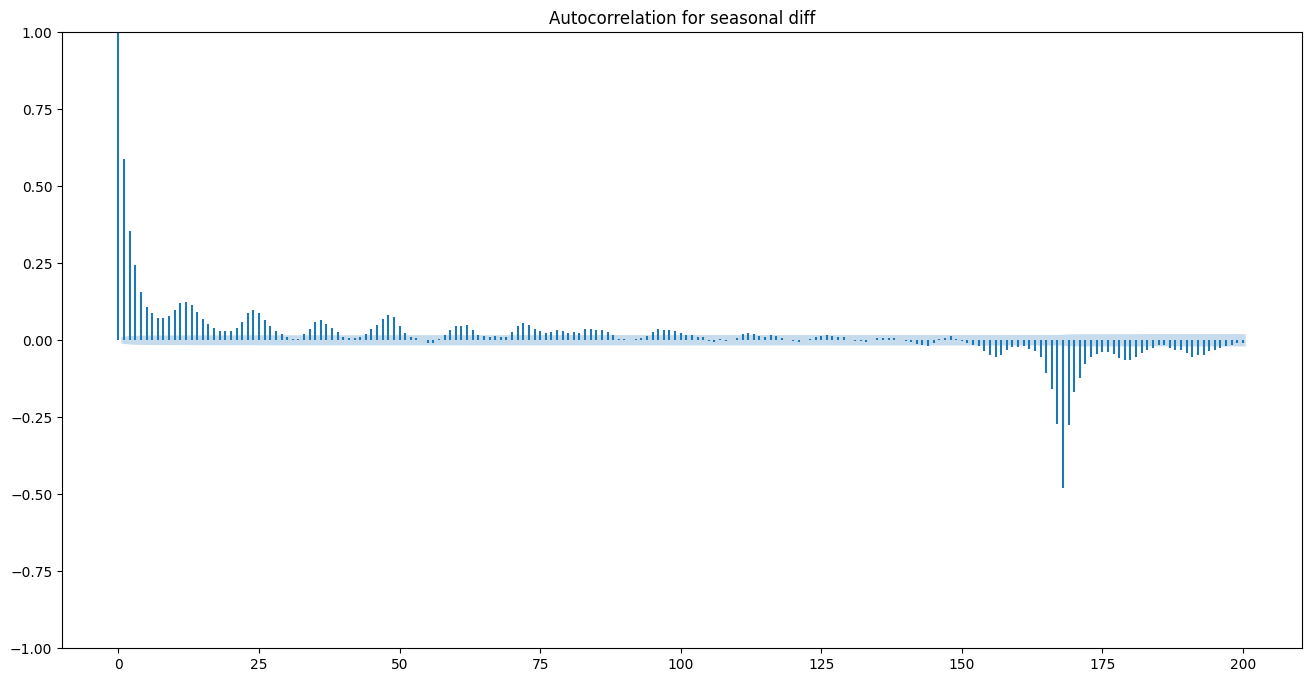

In [113]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
plot_acf(df1['seasonal_diff'], lags = 200, ax=axs, title = 'Autocorrelation for seasonal diff', color = 'none')
plt.show()

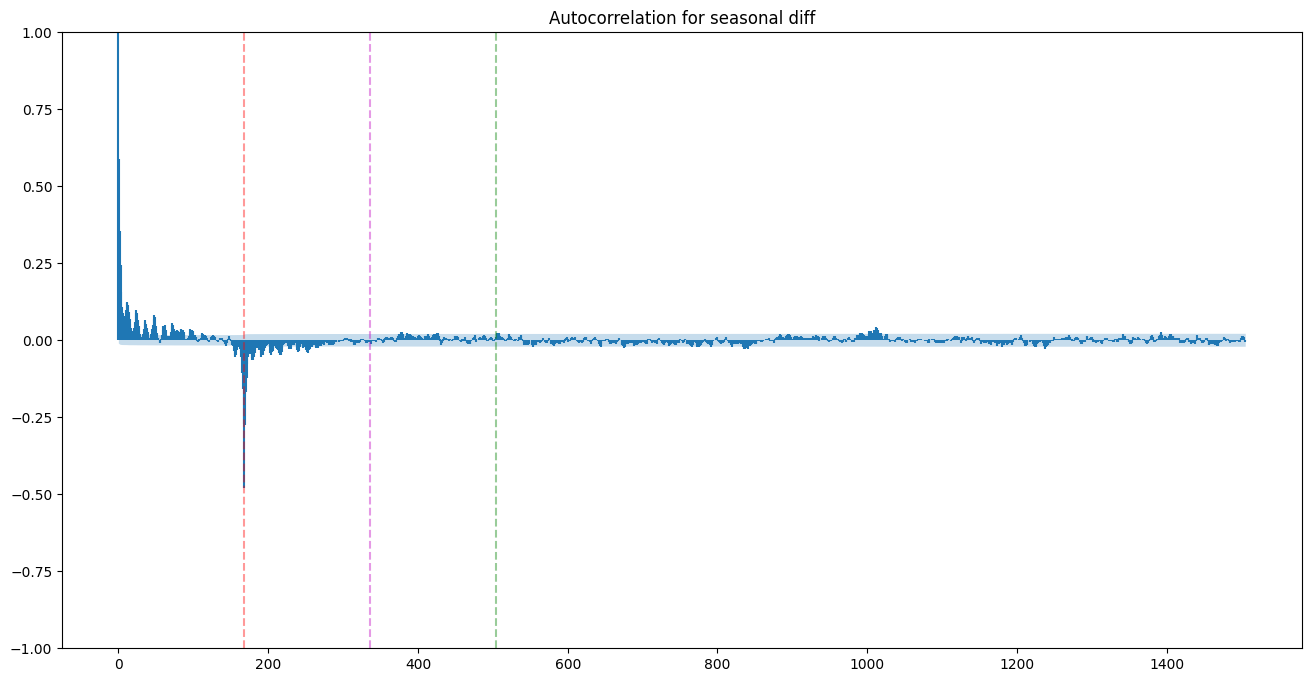

In [114]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
plot_acf(df1['seasonal_diff'], lags = 1505, ax=axs, title = 'Autocorrelation for seasonal diff', color = 'none')
axs.axvline(x=168, color='r', linestyle = '--', label = 'week 1', alpha = 0.4)
axs.axvline(x=336, color='m', linestyle = '--', label = 'week 2', alpha = 0.4)
axs.axvline(x=504, color='g', linestyle = '--', label = 'week 3', alpha = 0.4)
plt.show()

In [115]:
S_diff_acf = acf(df1['seasonal_diff'], nlags = 1000)
sorted_S_diff = sorted(enumerate(S_diff_acf), key=lambda x: abs(x[1]), reverse=True)

# Extract the sorted values and their original placements
S_diff_values = [x[1] for x in sorted_S_diff]
ori_place = [x[0] for x in sorted_S_diff]

# Print the sorted values and their original placements

combined_S_diff = [(a, b) for a, b in zip([round(num, 4) for num in S_diff_values], ori_place)]
combined_S_diff

[(1.0, 0),
 (0.588, 1),
 (-0.4797, 168),
 (0.3543, 2),
 (-0.2764, 169),
 (-0.2724, 167),
 (0.2436, 3),
 (-0.1692, 170),
 (-0.1594, 166),
 (0.1557, 4),
 (0.1251, 12),
 (-0.122, 171),
 (0.1196, 11),
 (0.1145, 13),
 (0.1081, 5),
 (-0.1062, 165),
 (0.0991, 24),
 (0.0985, 10),
 (0.0917, 14),
 (0.0889, 25),
 (0.0888, 6),
 (0.0879, 23),
 (0.0827, 48),
 (0.0803, 9),
 (-0.0782, 172),
 (0.0745, 49),
 (0.0731, 8),
 (0.0708, 7),
 (0.0699, 47),
 (0.0678, 15),
 (0.0657, 26),
 (0.0646, 36),
 (-0.0639, 179),
 (-0.0635, 180),
 (0.06, 35),
 (0.0582, 22),
 (-0.0569, 178),
 (0.0568, 72),
 (-0.0558, 164),
 (-0.0543, 181),
 (-0.0535, 173),
 (-0.0533, 191),
 (0.053, 16),
 (-0.0529, 156),
 (0.0522, 37),
 (0.0497, 46),
 (0.0489, 73),
 (0.0483, 62),
 (-0.0482, 155),
 (0.0476, 50),
 (-0.0476, 217),
 (-0.0474, 192),
 (-0.0474, 216),
 (-0.0468, 204),
 (-0.0468, 193),
 (0.0467, 60),
 (0.0467, 61),
 (-0.0463, 157),
 (-0.0462, 177),
 (0.0454, 27),
 (0.0453, 71),
 (-0.0442, 174),
 (-0.0425, 190),
 (-0.0418, 182),
 (0.

To determine an appropriate value for Q, we look for the highest significant lag that lies within the seasonal period (168 hours). Looking at the above list, we can see that the lag with the highest absolute autocorrelation coefficient within the seasonal period is (0.588, 1). The positive autocorrelation coefficient suggests a strong positive relationship between the observation at time t and the observation at time t-1. 

In this seasonal period there are 4 lags that stands out, (0.588, 1), (0.3543, 2), (-0.2724, 167), (0.2436, 3). In our case we can see that within the seasonal period of 1 week, the magnitude of the significant lags decreases as the lag increases, with the highest absolute autocorrelation coefficient at lag 1 (0.588). Based on this we could consider the choise of seasonal MA term Q = 1,2,3

Now we should be ready to build these models and evaluate them.

- d (I) = 0
- p (AR) = 1
- q (MA) = 1, 2, 24
- P = {1, 23, 22, 10, 47}
- Q = {1, 2, 3}
- D = 0
- S = 168 and/or 24

In [116]:
#splitting data into train and test

split_date = int(len(hourly_df) * 0.8)  # 80% for training, 20% for testing

# Split the data into training and testing sets
train_hour = hourly_df.iloc[:split_date]
test_hour = hourly_df.iloc[split_date:]

In [117]:
print(f'length of training data: {len(train_hour)}')
print(f'length of test data: {len(test_hour)}')
print(f'length of training + test data: {len(train_hour) + len(test_hour)}')

length of training data: 27671
length of test data: 6918
length of training + test data: 34589


In [118]:
import itertools
from sklearn.metrics import mean_squared_error

We have now narrowed down the potential SARIMA models. We can now iterate through the possible combinations of parameters, and chose the model with the lowest AIC value. However due to memory/computational limitations we can only go through few of the models, and we will make our analysis based on these model even tho they probably are not the best or even good for that matter.

In [119]:

order = (1, 0, 1)  # (p, d, q)
s_order = (1, 0, 1, 24)  # (P, D, Q, S)

# Create and fit the SARIMAX model
mod1_sar = sm.tsa.SARIMAX(train_hour['Global_active_power'], order=order, seasonal_order=s_order)
fit1_sar = mod1_sar.fit()

In [120]:
fit1_sar.aic

48564.88766122577

In [121]:
fcast = fit1_sar.get_forecast(steps=len(test_hour))

In [122]:
fcast_val = fcast.predicted_mean
confs = fcast.conf_int()

In [123]:
confs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6918 entries, 2010-02-11 16:00:00 to 2010-11-26 21:00:00
Freq: H
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   lower Global_active_power  6918 non-null   float64
 1   upper Global_active_power  6918 non-null   float64
dtypes: float64(2)
memory usage: 162.1 KB


In [124]:
# d=0, p=1, dD=0, s=24
q_vals = [1, 2, 24]  
P_vals = [1, 23, 22, 10, 47]  
Q_vals = [1, 2, 3]

par_comb = list(itertools.product(q_vals, P_vals, Q_vals))
par_comb

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 23, 1),
 (1, 23, 2),
 (1, 23, 3),
 (1, 22, 1),
 (1, 22, 2),
 (1, 22, 3),
 (1, 10, 1),
 (1, 10, 2),
 (1, 10, 3),
 (1, 47, 1),
 (1, 47, 2),
 (1, 47, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 23, 1),
 (2, 23, 2),
 (2, 23, 3),
 (2, 22, 1),
 (2, 22, 2),
 (2, 22, 3),
 (2, 10, 1),
 (2, 10, 2),
 (2, 10, 3),
 (2, 47, 1),
 (2, 47, 2),
 (2, 47, 3),
 (24, 1, 1),
 (24, 1, 2),
 (24, 1, 3),
 (24, 23, 1),
 (24, 23, 2),
 (24, 23, 3),
 (24, 22, 1),
 (24, 22, 2),
 (24, 22, 3),
 (24, 10, 1),
 (24, 10, 2),
 (24, 10, 3),
 (24, 47, 1),
 (24, 47, 2),
 (24, 47, 3)]

In [125]:
# This can be used iterate the different model and pick the model with lowest AIC
# This require alot of memory, making impossible to execute with regular PC's 
# Could look into free cloud computing services.

# Iterate over all parameter combinations
#for params in par_comb:
#    order = (1, 0, params[0])  # (p, d, q)
#    s_order = (params[1], 0, params[2], 24)  # (P, D, Q, S)
#    # Fit the SARIMAX model
#    model = sm.tsa.SARIMAX(train_hour['Global_active_power'], order = order, seasonal_order=s_order)
#    results = model.fit()
#    
#    # Calculate the AIC value
#    aic = results.aic
#    print(f'Model:{order}{s_order}, AIC: {aic}')
#    # Check if the current model has a lower AIC than the previous best model
#    if aic < best_aic:
#        best_aic = aic
#        best_model = model

In [126]:
order = (1, 0, 1)  # (p, d, q)
s_order = (1, 0, 2, 24)  # (P, D, Q, S)

# Create and fit the SARIMAX model
mod2_sar = sm.tsa.SARIMAX(train_hour['Global_active_power'], order=order, seasonal_order=s_order)
fit2_sar = mod2_sar.fit()
fit2_sar.aic

48546.21941716646

In [127]:
order = (1, 0, 2)  # (p, d, q)
s_order = (1, 0, 1, 24)  # (P, D, Q, S)

# Create and fit the SARIMAX model
mod3_sar = sm.tsa.SARIMAX(train_hour['Global_active_power'], order=order, seasonal_order=s_order)
fit3_sar = mod3_sar.fit()
fit3_sar.aic

48515.65223334571

In [128]:
fit3_sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                  Global_active_power   No. Observations:                27671
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 24)   Log Likelihood              -24251.826
Date:                              Wed, 24 May 2023   AIC                          48515.652
Time:                                      15:55:36   BIC                          48565.021
Sample:                                  12-16-2006   HQIC                         48531.554
                                       - 02-11-2010                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7002      0.009     76.710      0.000       0.682       0.718
ma.L1         -0.0657      0.011     -6.219      0.000      -0.086      -0.045
ma.L2         -0.0691      0.008     -8.621      0.000      -0.085      -0.053
ar.S.L24       0.9984      0.000   4340.876      0.000       0.998       0.999
ma.S.L24      -0.9456      0.002   -536.793      0.000      -0.949      -0.942
sigma2         0.3372      0.002    188.749      0.000       0.334       0.341
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             18259.47
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                             0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We have now fittet 3 different seasonal arima models:
- Model 1 : (1, 0, 1) (1, 0, 1, 24); AIC : 48564.88766122577
- Model 2 : (1, 0, 1) (1, 0, 2, 24); AIC : 48546.21941716646
- Model 3 : (1, 0, 2) (1, 0, 1, 24); AIC : 48515.65223334571

Model 3 has the lowest AIC, indicating its the best choice out of these 3 models. From the summary of model 3 we see that the coefficients for the model are all significant as the P-values, P>|z|, is below the 5% significance level. 
- ar.L1 (Autoregressive): The coefficient is estimated to be 0.7002 and this parameter represents the impact of the previous observation have on the current observation.
- ma.L1 (Moving Average): The coefficient is estimated to be -0.0657 and this parameter represents the impact of the previous residual error have on the current observation.
- ma.L2 (Moving Average): The coefficient is estimated to be -0.0691 and this parameter represents the impact of the lagged residual error have on the current observation.
- ar.S.L24 (Seasonal Autoregressive): The coefficient is estimated to be 0.9984 and this parameter represents the impact of the previous observation from the same season (lag 24) on the current observation.
- ma.S.L24 (Seasonal Moving Average): The coefficient is estimated to be -0.9456 and this parameter represents the impact of the lagged residual error from the same season (lag 24) on the current observation.
If we had a coefficient with higher P-value we could had removed it from the model.

Lets plot how the model performs on our test data.

In [129]:
fcast3 = fit3_sar.get_forecast(steps=len(test_hour))
fcast3_val = fcast3.predicted_mean
confs3 = fcast3.conf_int()

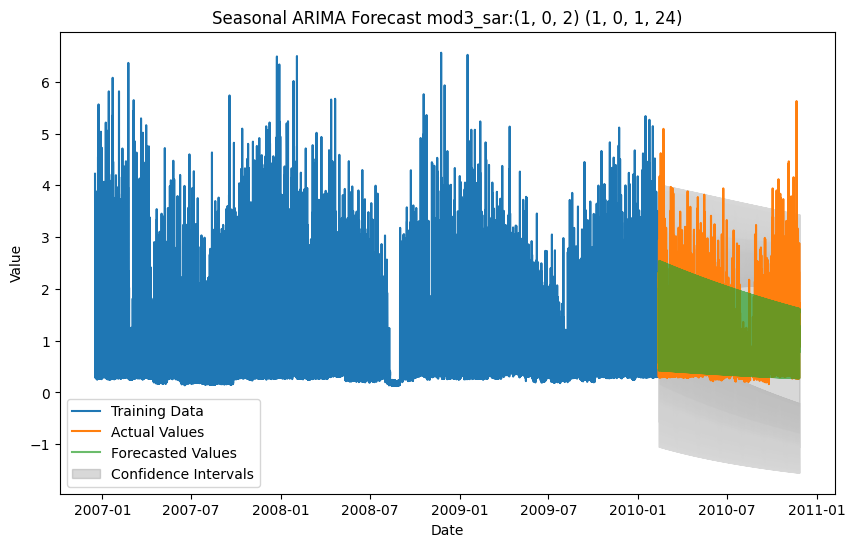

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(train_hour['Global_active_power'].index, train_hour['Global_active_power'], label='Training Data')
plt.plot(test_hour['Global_active_power'].index, test_hour['Global_active_power'], label='Actual Values')
plt.plot(test_hour['Global_active_power'].index, fcast3_val, label='Forecasted Values', alpha=0.7)
plt.fill_between(test_hour['Global_active_power'].index, confs3['lower Global_active_power'], confs3['upper Global_active_power'], color='gray', alpha=0.3, label='Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Seasonal ARIMA Forecast mod3_sar:(1, 0, 2) (1, 0, 1, 24)')
plt.legend()
plt.show()

A closer look:

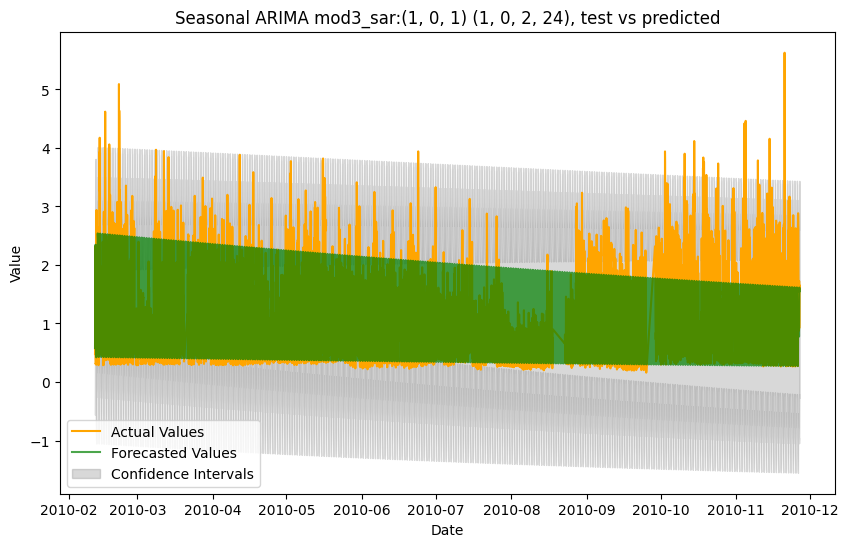

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(test_hour['Global_active_power'].index, test_hour['Global_active_power'], label='Actual Values', color='orange')
plt.plot(test_hour['Global_active_power'].index, fcast3_val, label='Forecasted Values', alpha=0.7, color='green')
plt.fill_between(test_hour['Global_active_power'].index, confs3['lower Global_active_power'], confs3['upper Global_active_power'], color='gray', alpha=0.3, label='Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Seasonal ARIMA mod3_sar:(1, 0, 1) (1, 0, 2, 24), test vs predicted')
plt.legend()
plt.show()

An even closer look:

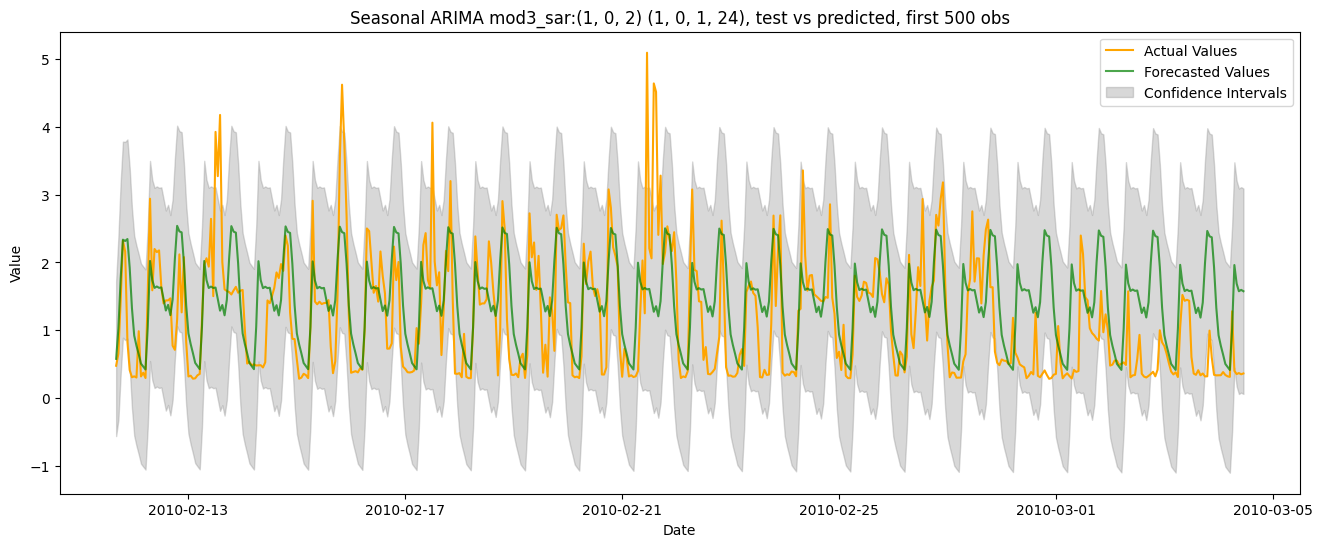

In [132]:
plt.figure(figsize=(16, 6))
plt.plot(test_hour['Global_active_power'][:500].index, test_hour['Global_active_power'][:500], label='Actual Values', color='orange')
plt.plot(test_hour['Global_active_power'][:500].index, fcast3_val[:500], label='Forecasted Values', color = 'green', alpha=0.7)
plt.fill_between(test_hour['Global_active_power'][:500].index, confs3['lower Global_active_power'][:500], confs3['upper Global_active_power'][:500], color='gray', alpha=0.3, label='Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Seasonal ARIMA mod3_sar:(1, 0, 2) (1, 0, 1, 24), test vs predicted, first 500 obs')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error

In [134]:
rmse_score = mean_squared_error(test_hour['Global_active_power'], fcast3_val, squared=False)
print("RMSE:", rmse_score)
np.mean((fcast3_val - test_hour['Global_active_power'])**2)**.5

RMSE: 0.7021503593408174


0.7021503593408174

In [135]:
mape = np.mean(np.abs(fcast3_val - test_hour['Global_active_power'])/np.abs(test_hour['Global_active_power']))*100
print("MAPE:", mape,'%')

MAPE: 89.32101563424727 %


- As we can see from above plots, the model does not reflect the data well.
- The RMSE score measures the square root of the average of squared differences between the predicted values and the actual values. This metric ranges from 0 to infinity, and the closer to 0 the better the model. So having a 0.70 is not good, as a rule of thump, values between 0.2 and 0.4 is considered good.
- Mean Absolute Percentage Error (mape): measures the average percentage difference between the predicted values and the actual values. So having a 89.32% MAPE implies that the model has about 10.68% accuracy. 

We have now manually build a Seasonal Arima model. Alternatively, the pmdarima package can be used to do a grid search and automatically chose the 'best' model based on the AIC criteria. 

### LSTM : Long Short Term Memory

LSTM models is a type of recurrent neural network (RNN) architecture that is commonly used for modeling sequential data, such as time series, natural language, speech, and more. LSTM networks are designed to address the vanishing gradient problem of traditional RNNs, allowing them to capture long-term dependencies in the data. LSTMs can effectively model and learn from the complex patterns and long-term dependencies present in time series data. They can capture the relationship between past observations and future values, allowing them to make accurate predictions. Furthermore, LSTM models can handle irregularities, seasonality, and trends in the data. They can be trained using gradient-based optimization algorithms, such as backpropagation through time (BPTT), and updated using techniques like stochastic gradient descent (SGD) or variants like Adam or RMSprop.

The LSTM model is composed of LSTM cells, which consists of three main components: the input gate, the forget gate, and the output gate. These gates regulate the flow of information within the cell. The input gate determines which information from the current time step should be stored in the cell, the forget gate decides what information to discard from the cell's memory, and the output gate controls the information to be output from the cell.

The vanishing gradient problem is a challenge that arises in traditional Recurrent Neural Networks (RNNs) during training. It occurs when the gradients of the loss function with respect to the weights of the network become very small as they propagate back through time. As a result, the network's ability to learn long-term dependencies and capture information from earlier time steps is hindered.

Before we build the LSTM model we need to do some modifications to our data to fit the format. 
- First, we need to normalize the data

Since time series data are sequential data and the neural network is trained as a supervised model. This is because the LSTM model expects the input data to be in a certain array structure in the form [target, time-step, features]. If we just reshape the current data to this format then we would discard the correlations between the current observation with their lags, so instead we can use the look-back concept. The Look-back method provides a structured and cosistent framework for training and evaluating the model, it creates input-output tuples that allow the LSTM model to learn the sequential dependencies and make predictions based on historical observations.
- Second, we restructure the data to look like a supervised learning problem, this can be done with the pandas shift function. 

Pandas shift function takes a dataframe and shifts the rows or columns by a specified number without changing the size of the dataframe. This can be used to create columns of lag observations as well as columns of forecast observations for a time series dataset in a supervised learning format. In other words we could say that it can determine how far back in time the model can "look" to gather information for prediction.


In [170]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [10]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Freq: H
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    34589 non-null  float64
 1   Global_reactive_power  34589 non-null  float64
 2   Global_intensity       34589 non-null  float64
 3   Sub_metering_1         34589 non-null  float64
 4   Sub_metering_2         34589 non-null  float64
 5   Sub_metering_3         34589 non-null  float64
dtypes: float64(6)
memory usage: 1.8 MB


In [124]:
# convert series to supervised learning (from https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/)
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
 n_vars = 1 if type(data) is list else data.shape[1]
 df = pd.DataFrame(data)
 cols, names = list(), list()

 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
   cols.append(df.shift(i))
   names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
   cols.append(df.shift(-i))
   if i == 0:
     names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
   else:
     names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

 # put it all together
 agg = pd.concat(cols, axis=1)
 agg.columns = names
 
 # drop rows with NaN values
 if dropnan:
   agg.dropna(inplace=True)
 return agg

In [118]:
series_to_supervised(hourly_df,1,1)

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  \
Date_Time                                                                    
2006-12-16 18:00:00   4.222889   0.229000  18.100000        0.0   0.527778   
2006-12-16 19:00:00   3.632200   0.080033  15.600000        0.0   6.716667   
2006-12-16 20:00:00   3.400233   0.085233  14.503333        0.0   1.433333   
2006-12-16 21:00:00   3.268567   0.075100  13.916667        0.0   0.000000   
2006-12-16 22:00:00   3.056467   0.076667  13.046667        0.0   0.416667   
...                        ...        ...        ...        ...        ...   
2010-11-26 17:00:00   1.067933   0.215633   4.610000        0.0   0.950000   
2010-11-26 18:00:00   1.725900   0.061400   7.216667        0.0   0.000000   
2010-11-26 19:00:00   1.573467   0.053700   6.620000        0.0   0.000000   
2010-11-26 20:00:00   1.659333   0.060033   7.056667        0.0   0.066667   
2010-11-26 21:00:00   1.163700   0.061167   4.913333        0.0   1.066667   

                     var6(t-1)   var1(t)   var2(t)    var3(t)  var4(t)  \
Date_Time                                                                
2006-12-16 18:00:00  16.861111  3.632200  0.080033  15.600000      0.0   
2006-12-16 19:00:00  16.866667  3.400233  0.085233  14.503333      0.0   
2006-12-16 20:00:00  16.683333  3.268567  0.075100  13.916667      0.0   
2006-12-16 21:00:00  16.783333  3.056467  0.076667  13.046667      0.0   
2006-12-16 22:00:00  17.216667  2.200133  0.056167   9.523333      0.0   
...                        ...       ...       ...        ...      ...   
2010-11-26 17:00:00   0.000000  1.725900  0.061400   7.216667      0.0   
2010-11-26 18:00:00  12.866667  1.573467  0.053700   6.620000      0.0   
2010-11-26 19:00:00   0.000000  1.659333  0.060033   7.056667      0.0   
2010-11-26 20:00:00   0.000000  1.163700  0.061167   4.913333      0.0   
2010-11-26 21:00:00   0.000000  0.934667  0.000000   3.800000      0.0   

                      var5(t)    var6(t)  
Date_Time                                 
2006-12-16 18:00:00  6.716667  16.866667  
2006-12-16 19:00:00  1.433333  16.683333  
2006-12-16 20:00:00  0.000000  16.783333  
2006-12-16 21:00:00  0.416667  17.216667  
2006-12-16 22:00:00  0.133333   4.433333  
...                       ...        ...  
2010-11-26 17:00:00  0.000000  12.866667  
2010-11-26 18:00:00  0.000000   0.000000  
2010-11-26 19:00:00  0.066667   0.000000  
2010-11-26 20:00:00  1.066667   0.000000  
2010-11-26 21:00:00  0.000000   0.000000  

[34588 rows x 12 columns]

In [272]:
scaling = MinMaxScaler(feature_range=(0, 1))
hour_norm = scaling.fit_transform(hourly_df.values)
hour_ref = series_to_supervised(hour_norm, 1, 1)

In [273]:
hour_ref

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1       0.636816   0.295738   0.631157        0.0   0.011366   0.687521   
2       0.545045   0.103358   0.541487        0.0   0.144652   0.687748   
3       0.509006   0.110073   0.502152        0.0   0.030869   0.680272   
4       0.488550   0.096987   0.481110        0.0   0.000000   0.684350   
5       0.455597   0.099010   0.449904        0.0   0.008973   0.702019   
...          ...        ...        ...        ...        ...        ...   
34584   0.146652   0.278476   0.147298        0.0   0.020459   0.000000   
34585   0.248876   0.079294   0.240794        0.0   0.000000   0.524645   
34586   0.225194   0.069350   0.219393        0.0   0.000000   0.000000   
34587   0.238534   0.077529   0.235055        0.0   0.001436   0.000000   
34588   0.161531   0.078993   0.158178        0.0   0.022972   0.000000   

        var1(t)   var2(t)   var3(t)  var4(t)   var5(t)   var6(t)  
1      0.545045  0.103358  0.541487      0.0  0.144652  0.687748  
2      0.509006  0.110073  0.502152      0.0  0.030869  0.680272  
3      0.488550  0.096987  0.481110      0.0  0.000000  0.684350  
4      0.455597  0.099010  0.449904      0.0  0.008973  0.702019  
5      0.322555  0.072536  0.323529      0.0  0.002872  0.180772  
...         ...       ...       ...      ...       ...       ...  
34584  0.248876  0.079294  0.240794      0.0  0.000000  0.524645  
34585  0.225194  0.069350  0.219393      0.0  0.000000  0.000000  
34586  0.238534  0.077529  0.235055      0.0  0.001436  0.000000  
34587  0.161531  0.078993  0.158178      0.0  0.022972  0.000000  
34588  0.125948  0.000000  0.118245      0.0  0.000000  0.000000  

[34588 rows x 12 columns]

In [274]:
def series_to_supervised_norm(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df1 = pd.DataFrame(data)
    cols, names = list(), list()
    scaling = MinMaxScaler(feature_range=(0, 1))
    df = scaling.fit_transform(df1.values)
    df = pd.DataFrame(df)

    # Input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [(f'{df1.columns[j]}' + '(t-%d)' % i) for j in range(n_vars)]
        
    # Forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [(f'{df1.columns[j]}' + '(t)') for j in range(n_vars)]
        else:
            names += [(f'{df1.columns[j]}' + '(t+%d)' % i) for j in range(n_vars)]
    
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg

In [275]:
series_to_supervised_norm(hourly_df, 1, 1)

Global_active_power(t-1)  Global_reactive_power(t-1)  \
1                      0.636816                    0.295738   
2                      0.545045                    0.103358   
3                      0.509006                    0.110073   
4                      0.488550                    0.096987   
5                      0.455597                    0.099010   
...                         ...                         ...   
34584                  0.146652                    0.278476   
34585                  0.248876                    0.079294   
34586                  0.225194                    0.069350   
34587                  0.238534                    0.077529   
34588                  0.161531                    0.078993   

       Global_intensity(t-1)  Sub_metering_1(t-1)  Sub_metering_2(t-1)  \
1                   0.631157                  0.0             0.011366   
2                   0.541487                  0.0             0.144652   
3                   0.502152                  0.0             0.030869   
4                   0.481110                  0.0             0.000000   
5                   0.449904                  0.0             0.008973   
...                      ...                  ...                  ...   
34584               0.147298                  0.0             0.020459   
34585               0.240794                  0.0             0.000000   
34586               0.219393                  0.0             0.000000   
34587               0.235055                  0.0             0.001436   
34588               0.158178                  0.0             0.022972   

       Sub_metering_3(t-1)  Global_active_power(t)  Global_reactive_power(t)  \
1                 0.687521                0.545045                  0.103358   
2                 0.687748                0.509006                  0.110073   
3                 0.680272                0.488550                  0.096987   
4                 0.684350                0.455597                  0.099010   
5                 0.702019                0.322555                  0.072536   
...                    ...                     ...                       ...   
34584             0.000000                0.248876                  0.079294   
34585             0.524645                0.225194                  0.069350   
34586             0.000000                0.238534                  0.077529   
34587             0.000000                0.161531                  0.078993   
34588             0.000000                0.125948                  0.000000   

       Global_intensity(t)  Sub_metering_1(t)  Sub_metering_2(t)  \
1                 0.541487                0.0           0.144652   
2                 0.502152                0.0           0.030869   
3                 0.481110                0.0           0.000000   
4                 0.449904                0.0           0.008973   
5                 0.323529                0.0           0.002872   
...                    ...                ...                ...   
34584             0.240794                0.0           0.000000   
34585             0.219393                0.0           0.000000   
34586             0.235055                0.0           0.001436   
34587             0.158178                0.0           0.022972   
34588             0.118245                0.0           0.000000   

       Sub_metering_3(t)  
1               0.687748  
2               0.680272  
3               0.684350  
4               0.702019  
5               0.180772  
...                  ...  
34584           0.524645  
34585           0.000000  
34586           0.000000  
34587           0.000000  
34588           0.000000  

[34588 rows x 12 columns]

In [276]:
norm_hourly = series_to_supervised_norm(hourly_df, 1, 1)

In [277]:
(hour_ref.values == norm_hourly.values).sum()

415056

In [278]:
norm_hourly.values.shape

(34588, 12)

In [279]:
hour_ref.values.shape

(34588, 12)

In [142]:
34588*12

415056

In [280]:
norm_hourly.drop(norm_hourly.columns[[7,8,9,10,11]], axis=1, inplace=True)

In [281]:
norm_hourly.head()

Global_active_power(t-1)  Global_reactive_power(t-1)  \
1                  0.636816                    0.295738   
2                  0.545045                    0.103358   
3                  0.509006                    0.110073   
4                  0.488550                    0.096987   
5                  0.455597                    0.099010   

   Global_intensity(t-1)  Sub_metering_1(t-1)  Sub_metering_2(t-1)  \
1               0.631157                  0.0             0.011366   
2               0.541487                  0.0             0.144652   
3               0.502152                  0.0             0.030869   
4               0.481110                  0.0             0.000000   
5               0.449904                  0.0             0.008973   

   Sub_metering_3(t-1)  Global_active_power(t)  
1             0.687521                0.545045  
2             0.687748                0.509006  
3             0.680272                0.488550  
4             0.684350                0.455597  
5             0.702019                0.322555

We have now reframed the time-series data to be a supervised learning problem for predicting the energy comsumption at the current hour, given the energy consumption and the other recorded variables at the previous lag.

In [323]:
# splitting data into train and test

split_date = int(len(norm_hourly) * 0.5)  # 50% for training, 50% for testing

# Split the data into training and testing sets
training_hour = norm_hourly.iloc[:split_date]
testing_hour = norm_hourly.iloc[split_date:]

In [334]:
train_Y = training_hour.iloc[:, -1]
train_X = training_hour.iloc[:, :-1]

In [335]:
test_Y = testing_hour.iloc[:, -1]
test_X = testing_hour.iloc[:, :-1]

In [336]:
train_X = train_X.to_numpy().reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.to_numpy().reshape((test_X.shape[0], 1, test_X.shape[1]))

In [337]:
print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

(17294, 1, 6) (17294,)
(17294, 1, 6) (17294,)


LSTM model setup
- Number of layers: In general, deeper architectures with multiple LSTM layers can capture more complex patterns but will require more computational resources. **For our data we will use a single-layer LSTM**.
- Number of LSTM neurons: LSTM neurons, also known as memory cells, are the main building blocks of an LSTM layer. The number of units in an LSTM layer determines the capacity of the model to capture patterns and remember long-term dependencies. Increasing the number of units allows the model to learn more complex patterns, but it also increases the computational cost.$\\ $
**We will start with 20 neurons and gradually increase them if needed.**
- The input shape and sequence length: The input shape and sequence length of your data influence the architecture of the LSTM model. If your data has a high-dimensional input, you may need to include additional layers or techniques such as 1D convolutional layers before the LSTM layers to extract meaningful features. If your data has long sequences, you might need to use techniques like stacking multiple LSTM layers or using bidirectional LSTM layers to capture long-term dependencies effectively. $\\ $
**The input shape will be 1 time step with 6 features.**
- The output layer: The choice of the output layer depends on the specific task. For regression problems, a single output neuron with linear activation can be used. For binary classification tasks, a sigmoid activation function in the output layer is often suitable. For multi-class classification, you can use a softmax activation function. $\\ $
**We use 1 neuron in the output layer for predicting energy concumption** (Dense(1) is a single output neuron with linear activation)
- Regularization techniques: Regularization techniques such as dropout or recurrent dropout can be applied to prevent overfitting in LSTM models. Dropout randomly sets a fraction of input units to 0 during training, reducing the reliance on specific features and improving generalization. $\\ $
**We will use a dropout of 10%**
- Hyperparameters: Tune other hyperparameters such as learning rate, batch size, number of epochs, optimizer choice (e.g., Adam, RMSprop), and loss function. These choices can significantly impact the model's performance. $\\ $
**We use Mean Absolute Error loss function, the efficient adam version of stochastic gradient descent, start with 20 epoch with batch size of 50 and increase when needed**

In [287]:
# design network
model = Sequential()
model.add(LSTM(20, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1)) 
model.compile(loss='mae', optimizer='adam')

In [288]:
history = model.fit(train_X, train_Y, epochs=20, batch_size=50, validation_data=(test_X, test_Y), verbose=2, shuffle=False)

Epoch 1/20
346/346 - 4s - loss: 0.0807 - val_loss: 0.0662 - 4s/epoch - 13ms/step
Epoch 2/20
346/346 - 1s - loss: 0.0694 - val_loss: 0.0617 - 1s/epoch - 4ms/step
Epoch 3/20
346/346 - 1s - loss: 0.0669 - val_loss: 0.0601 - 1s/epoch - 4ms/step
Epoch 4/20
346/346 - 1s - loss: 0.0659 - val_loss: 0.0598 - 1s/epoch - 4ms/step
Epoch 5/20
346/346 - 1s - loss: 0.0658 - val_loss: 0.0596 - 1s/epoch - 4ms/step
Epoch 6/20
346/346 - 1s - loss: 0.0654 - val_loss: 0.0594 - 1s/epoch - 4ms/step
Epoch 7/20
346/346 - 1s - loss: 0.0654 - val_loss: 0.0594 - 1s/epoch - 4ms/step
Epoch 8/20
346/346 - 1s - loss: 0.0654 - val_loss: 0.0594 - 1s/epoch - 4ms/step
Epoch 9/20
346/346 - 1s - loss: 0.0651 - val_loss: 0.0595 - 1s/epoch - 4ms/step
Epoch 10/20
346/346 - 1s - loss: 0.0653 - val_loss: 0.0593 - 1s/epoch - 4ms/step
Epoch 11/20
346/346 - 1s - loss: 0.0652 - val_loss: 0.0596 - 1s/epoch - 4ms/step
Epoch 12/20
346/346 - 1s - loss: 0.0652 - val_loss: 0.0594 - 1s/epoch - 4ms/step
Epoch 13/20
346/346 - 1s - loss: 0.0

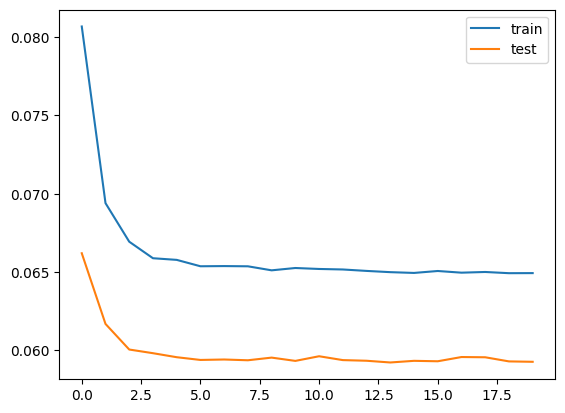

In [289]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [338]:

# make a prediction
yhat = model.predict(test_X)
test_X0 = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X0[:, 1:]), axis=1)
inv_yhat = scaling.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_Y.to_numpy().reshape((len(test_Y), 1))
inv_y = np.concatenate((test_y, test_X0[:, 1:]), axis=1)
inv_y = scaling.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

541/541 [==============================] - 1s 2ms/step
Test RMSE: 0.584


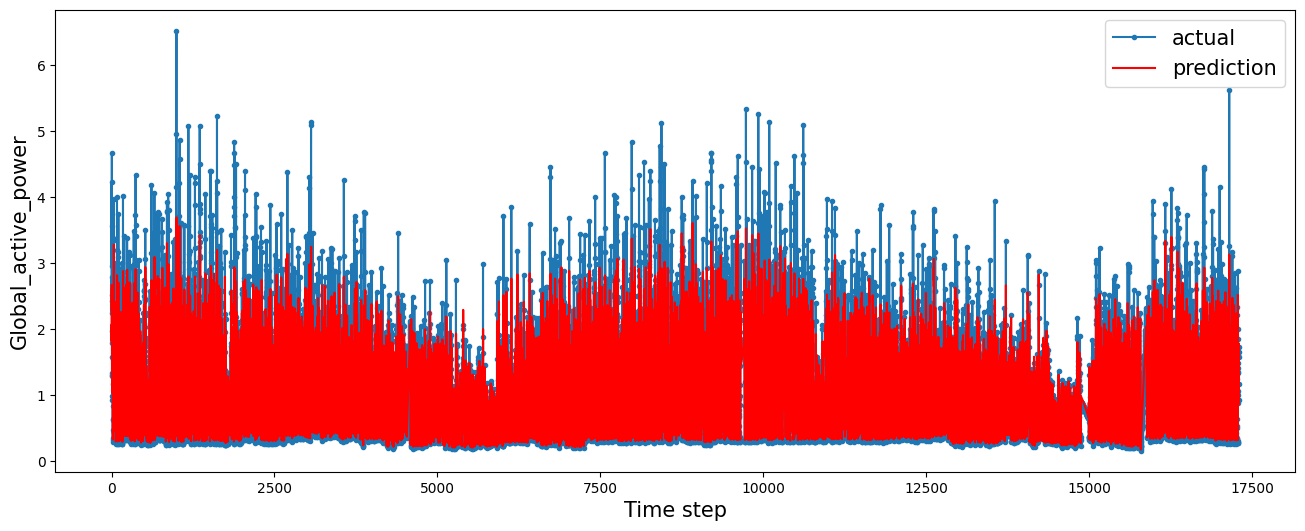

In [339]:
idx=[n for n in range(17294)]
plt.figure(figsize=(16, 6))
plt.plot(idx, inv_y, marker='.', label="actual")
plt.plot(idx, inv_yhat, 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [261]:
model1 = Sequential()
model1.add(LSTM(200, input_shape=(train_X.shape[1], train_X.shape[2])))
model1.add(Dropout(0.1))
model1.add(Dense(1)) 
model1.compile(loss='mae', optimizer='adam')

In [262]:
history1 = model1.fit(train_X, train_Y, epochs=50, batch_size=200, validation_data=(test_X, test_Y), verbose=2, shuffle=False)

Epoch 1/50
87/87 - 4s - loss: 0.0937 - val_loss: 0.0657 - 4s/epoch - 51ms/step
Epoch 2/50
87/87 - 1s - loss: 0.0776 - val_loss: 0.0639 - 1s/epoch - 14ms/step
Epoch 3/50
87/87 - 1s - loss: 0.0726 - val_loss: 0.0622 - 1s/epoch - 14ms/step
Epoch 4/50
87/87 - 1s - loss: 0.0688 - val_loss: 0.0613 - 983ms/epoch - 11ms/step
Epoch 5/50
87/87 - 1s - loss: 0.0667 - val_loss: 0.0608 - 1s/epoch - 12ms/step
Epoch 6/50
87/87 - 1s - loss: 0.0660 - val_loss: 0.0604 - 1s/epoch - 15ms/step
Epoch 7/50
87/87 - 1s - loss: 0.0658 - val_loss: 0.0602 - 1s/epoch - 12ms/step
Epoch 8/50
87/87 - 1s - loss: 0.0656 - val_loss: 0.0601 - 1s/epoch - 12ms/step
Epoch 9/50
87/87 - 1s - loss: 0.0655 - val_loss: 0.0601 - 1s/epoch - 14ms/step
Epoch 10/50
87/87 - 1s - loss: 0.0655 - val_loss: 0.0600 - 1s/epoch - 13ms/step
Epoch 11/50
87/87 - 1s - loss: 0.0653 - val_loss: 0.0600 - 1s/epoch - 15ms/step
Epoch 12/50
87/87 - 1s - loss: 0.0654 - val_loss: 0.0601 - 1s/epoch - 12ms/step
Epoch 13/50
87/87 - 1s - loss: 0.0653 - val_lo

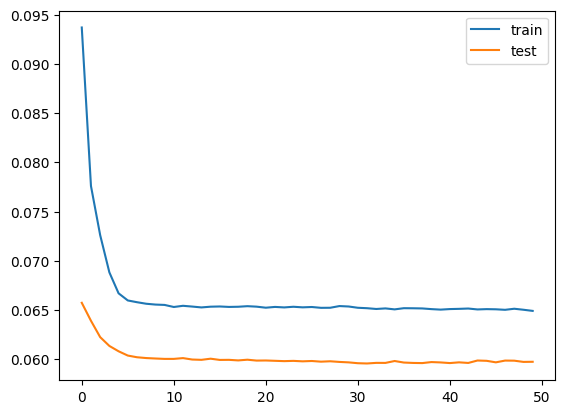

In [264]:
# plot history
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()
plt.show()

In [340]:
# make a prediction
yhat1 = model1.predict(test_X)
test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat1 = np.concatenate((yhat1, test_X1[:, 1:]), axis=1)
inv_yhat1 = scaling.inverse_transform(inv_yhat1)
inv_yhat1 = inv_yhat1[:,0]
# invert scaling for actual
test_y1 = test_Y.to_numpy().reshape((len(test_Y), 1))
inv_y1 = np.concatenate((test_y1, test_X1[:, 1:]), axis=1)
inv_y1 = scaling.inverse_transform(inv_y1)
inv_y1 = inv_y1[:,0]
# calculate RMSE
rmse1 = np.sqrt(mean_squared_error(inv_y1, inv_yhat1))
print('Test RMSE: %.3f' % rmse1)

541/541 [==============================] - 2s 3ms/step
Test RMSE: 0.592


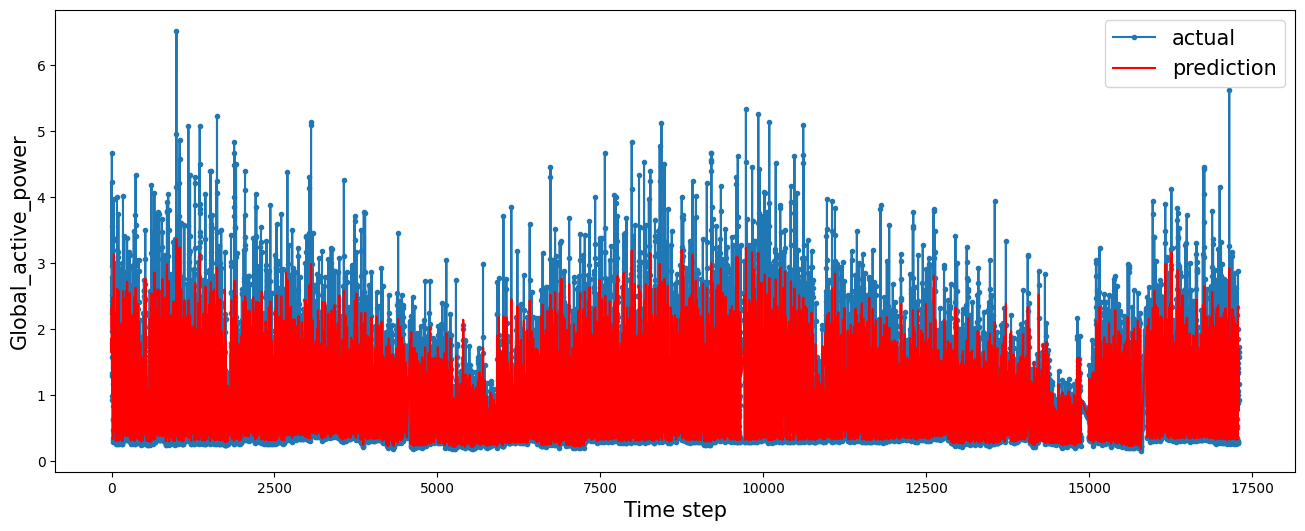

In [342]:
idx1=[n for n in range(17294)]
plt.figure(figsize=(16, 6))
plt.plot(idx1, inv_y1, marker='.', label="actual")
plt.plot(idx1, inv_yhat1, 'r', label="prediction", alpha=1)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()